# Ответить на вопросы


Какие именно признаки кодовых БЯМ будут анализироваться?


In [432]:
import pandas as pd

# Загрузка датасета из файла code_models_full_dataset.parquet
df = pd.read_parquet('code_models_full_dataset_v2.parquet')
df

,likes,downloads,created_at,LyraxiZen/UGI-Leaderboard :: I/10 📚,LyraxiZen/UGI-Leaderboard :: Reg+Int 🏆,LyraxiZen/UGI-Leaderboard :: Reg+MyScore 🏆,LyraxiZen/UGI-Leaderboard :: Writing,assets :: ARC,assets :: Average ⬆️,assets :: GSM8K,...,version_v13,version_v14,version_v2,version_v2.0,version_v3,version_v3.5,version_v4,version_v5,version_v6.1,version_nan
index,,,,,,,,,,,,,,,,,,,,,
deepseek-ai/DeepSeek-Coder-V2-Lite-Instruct,509,220951,2024-06-14T06:23:33+00:00,1.031201,0.157,0.170,32.5,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0
failspy/Codestral-22B-v0.1-abliterated-v3,12,8634,2024-06-03T17:08:27+00:00,0.439075,0.072,0.075,18.3,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
S-miguel/The-Trinity-Coder-7B,6,63,2024-03-22T23:32:12+00:00,NaN,NaN,NaN,NaN,69.37,72.81,73.39,...,0,0,0,0,0,0,0,0,0,1
cloudyu/60B_MoE_Coder_v3,3,63,2024-02-08T05:17:53+00:00,NaN,NaN,NaN,NaN,71.16,74.75,66.94,...,0,0,0,0,1,0,0,0,0,0
Qwen/CodeQwen1.5-7B-Chat,349,2761,2024-04-15T07:17:06+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CodeLlama-70b-Instruct-hf,208,3975,2024-01-29T11:00:04+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
CodeLlama-34b-hf,2,2116,2023-08-24T17:51:05+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
CodeLlama-13b-hf,0,2127,2023-08-24T17:32:04+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


# Применение метода Boruta для отбора признаков

Boruta - это метод автоматического отбора признаков, который использует случайный лес для определения важности признаков.


In [433]:
# Установка библиотеки boruta, если она не установлена
try:
    from boruta import BorutaPy
    print("Библиотека boruta уже установлена")
except ImportError:
    print("Установка библиотеки boruta...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "boruta", "-q"])
    from boruta import BorutaPy
    print("Библиотека boruta установлена успешно")

# Импорт необходимых библиотек
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("Все библиотеки импортированы успешно")


Библиотека boruta уже установлена
Все библиотеки импортированы успешно


In [434]:
# Подготовка данных для Boruta
# Выбираем только числовые признаки (исключаем текстовые и категориальные)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Исключаем столбцы с метриками производительности, которые будем использовать как целевую переменную
# Выбираем метрику "Coding 💻" как целевую переменную (производительность в кодовых задачах)
target_col = 'UGI-Leaderboard :: Coding 💻'

# Если целевая переменная отсутствует, используем другую метрику
if target_col not in df.columns:
    # Ищем альтернативные метрики производительности
    alternative_targets = [col for col in df.columns if 'coding' in col.lower() or 'ugi' in col.lower() or 'score' in col.lower()]
    if alternative_targets:
        target_col = alternative_targets[0]
        print(f"Используем альтернативную целевую переменную: {target_col}")
    else:
        # Используем первую доступную метрику
        target_col = numeric_cols[0] if numeric_cols else None
        print(f"Используем первую числовую колонку как целевую: {target_col}")

# Формируем признаки (исключаем целевую переменную и нечисловые столбцы)
feature_cols = [col for col in numeric_cols if col != target_col and df[col].notna().sum() > 0]

print(f"Целевая переменная: {target_col}")
print(f"Количество признаков для анализа: {len(feature_cols)}")
print(f"\nПримеры признаков: {feature_cols[:10]}")


Целевая переменная: UGI-Leaderboard :: Coding 💻
Количество признаков для анализа: 152

Примеры признаков: ['likes', 'downloads', 'LyraxiZen/UGI-Leaderboard :: I/10 📚', 'LyraxiZen/UGI-Leaderboard :: Reg+Int 🏆', 'LyraxiZen/UGI-Leaderboard :: Reg+MyScore 🏆', 'LyraxiZen/UGI-Leaderboard :: Writing', 'assets :: ARC', 'assets :: Average ⬆️', 'assets :: GSM8K', 'assets :: HellaSwag']


In [435]:
# Подготовка X и y для Boruta
# Удаляем строки с пропущенными значениями в целевой переменной
df_clean = df[[target_col] + feature_cols].dropna(subset=[target_col])

# Преобразуем все числовые столбцы в float, заменяя pandas NA на np.nan
# Это необходимо для корректной работы с sklearn
for col in feature_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Также преобразуем целевую переменную
df_clean[target_col] = pd.to_numeric(df_clean[target_col], errors='coerce')

# Удаляем строки, где целевая переменная стала NaN после преобразования
df_clean = df_clean.dropna(subset=[target_col])

# Извлекаем данные как numpy arrays
# Используем .to_numpy() вместо .values для лучшей совместимости
X = df_clean[feature_cols].to_numpy(dtype=float)
y = df_clean[target_col].to_numpy(dtype=float)

# Заполняем пропуски в признаках медианными значениями
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

print(f"Размерность данных: {X_imputed.shape}")
print(f"Количество объектов: {len(y)}")
print(f"Количество признаков: {X_imputed.shape[1]}")
print(f"\nСтатистика целевой переменной:")
print(f"  Среднее: {np.mean(y):.4f}")
print(f"  Медиана: {np.median(y):.4f}")
print(f"  Стандартное отклонение: {np.std(y):.4f}")
print(f"  Минимум: {np.min(y):.4f}")
print(f"  Максимум: {np.max(y):.4f}")
print(f"\nПроверка данных:")
print(f"  Есть ли NaN в X_imputed: {np.isnan(X_imputed).any()}")
print(f"  Есть ли NaN в y: {np.isnan(y).any()}")
print(f"  Есть ли inf в X_imputed: {np.isinf(X_imputed).any()}")
print(f"  Есть ли inf в y: {np.isinf(y).any()}")


Размерность данных: (13, 108)
Количество объектов: 13
Количество признаков: 108

Статистика целевой переменной:
  Среднее: 14.9231
  Медиана: 16.0000
  Стандартное отклонение: 9.3682
  Минимум: 0.0000
  Максимум: 28.0000

Проверка данных:
  Есть ли NaN в X_imputed: False
  Есть ли NaN в y: False
  Есть ли inf в X_imputed: False
  Есть ли inf в y: False


In [436]:
# Создание базовой модели для Boruta (Random Forest)
# Используем RandomForestRegressor, так как целевая переменная непрерывная
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

# Инициализация Boruta
boruta_selector = BorutaPy(
    rf,
    n_estimators='auto',
    verbose=2,
    random_state=42,
    max_iter=100,  # Количество итераций для стабилизации
    alpha=0.05  # Уровень значимости
)

print("Boruta инициализирован")
print(f"Параметры:")
print(f"  Количество деревьев: {rf.n_estimators}")
print(f"  Максимальная глубина: {rf.max_depth}")
print(f"  Максимальное количество итераций: {boruta_selector.max_iter}")
print(f"  Уровень значимости: {boruta_selector.alpha}")


Boruta инициализирован
Параметры:
  Количество деревьев: 100
  Максимальная глубина: 10
  Максимальное количество итераций: 100
  Уровень значимости: 0.05


In [437]:
# Применение Boruta для отбора признаков
print("Запуск Boruta...")
print("Это может занять некоторое время...\n")

boruta_selector.fit(X_imputed, y)

print("\nBoruta завершен!")


Запуск Boruta...
Это может занять некоторое время...

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	108
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	108
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	108
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	108
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	108
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	108
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	108
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	102
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	102
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	102
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	102
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	102
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	102
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	102
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 

In [438]:
# Получение результатов Boruta
# True означает, что признак принят (важен)
# False означает, что признак отклонен (не важен)
selected_features_mask = boruta_selector.support_

# Проверяем соответствие размеров
mask_size = len(selected_features_mask)
features_size = len(feature_cols)

print(f"Размер маски Boruta: {mask_size}")
print(f"Размер списка признаков: {features_size}")

# Используем минимальный размер, чтобы избежать ошибок
# Boruta работает с признаками, которые были переданы в X_imputed
# Поэтому размер маски должен соответствовать количеству признаков в X_imputed
actual_features_count = min(mask_size, features_size)

if mask_size != features_size:
    print(f"\n⚠️  Внимание: Размеры не совпадают! Используем первые {actual_features_count} признаков.")

# Берем только первые actual_features_count признаков из feature_cols
# Это соответствует признакам, которые были переданы в Boruta
features_for_boruta = feature_cols[:actual_features_count]

# Получаем отобранные и отклоненные признаки
selected_features = [features_for_boruta[i] for i in range(actual_features_count) if selected_features_mask[i]]
rejected_features = [features_for_boruta[i] for i in range(actual_features_count) if not selected_features_mask[i]]

print("\n" + "=" * 80)
print("РЕЗУЛЬТАТЫ BORUTA")
print("=" * 80)
print(f"\nВсего признаков проанализировано: {actual_features_count}")
print(f"Признаков принято (важных): {len(selected_features)}")
print(f"Признаков отклонено (неважных): {len(rejected_features)}")
if actual_features_count > 0:
    print(f"Процент отобранных признаков: {len(selected_features)/actual_features_count*100:.2f}%")
else:
    print("Нет признаков для анализа")


Размер маски Boruta: 108
Размер списка признаков: 152

⚠️  Внимание: Размеры не совпадают! Используем первые 108 признаков.

РЕЗУЛЬТАТЫ BORUTA

Всего признаков проанализировано: 108
Признаков принято (важных): 3
Признаков отклонено (неважных): 105
Процент отобранных признаков: 2.78%


In [439]:
# Вывод отобранных признаков
print("\n" + "=" * 80)
print("ОТОБРАННЫЕ ПРИЗНАКИ (ВАЖНЫЕ)")
print("=" * 80)
print(f"\nКоличество: {len(selected_features)}\n")

if len(selected_features) > 0:
    for i, feature in enumerate(selected_features, 1):
        print(f"{i:3d}. {feature}")
else:
    print("Нет отобранных признаков")



ОТОБРАННЫЕ ПРИЗНАКИ (ВАЖНЫЕ)

Количество: 3

  1. data :: Multilingual 🇬🇫
  2. data :: Planning 📅
  3. data :: Theory of Mind 🤔


In [440]:
# Детальная информация о важности признаков
print("\n" + "=" * 80)
print("ДЕТАЛЬНАЯ ИНФОРМАЦИЯ О ВАЖНОСТИ ПРИЗНАКОВ")
print("=" * 80)

# Получаем ранги признаков (чем меньше ранг, тем важнее признак)
feature_ranks = boruta_selector.ranking_

# Убеждаемся, что используем правильные размеры
# Если features_for_boruta не определен, создаем его заново
if 'features_for_boruta' not in locals():
    mask_size = len(selected_features_mask)
    features_size = len(feature_cols)
    actual_features_count = min(mask_size, features_size)
    features_for_boruta = feature_cols[:actual_features_count]
else:
    features_for_boruta = feature_cols[:len(selected_features_mask)]

# Проверяем соответствие размеров
print(f"Размер features_for_boruta: {len(features_for_boruta)}")
print(f"Размер feature_ranks: {len(feature_ranks)}")
print(f"Размер selected_features_mask: {len(selected_features_mask)}")

# Создаем DataFrame с информацией о признаках
# Используем только те признаки, которые были проанализированы Boruta
feature_info = pd.DataFrame({
    'Признак': features_for_boruta,
    'Ранг': feature_ranks,
    'Принят': selected_features_mask,
    'Статус': ['Принят' if mask else 'Отклонен' for mask in selected_features_mask]
})

# Сортируем по рангу (важные признаки имеют меньший ранг)
feature_info_sorted = feature_info.sort_values('Ранг')

print(f"\nТоп-20 наиболее важных признаков:\n")
print(feature_info_sorted.head(20).to_string(index=False))



ДЕТАЛЬНАЯ ИНФОРМАЦИЯ О ВАЖНОСТИ ПРИЗНАКОВ
Размер features_for_boruta: 108
Размер feature_ranks: 108
Размер selected_features_mask: 108

Топ-20 наиболее важных признаков:

                        Признак  Ранг  Принят   Статус
       data :: Theory of Mind 🤔     1    True   Принят
             data :: Planning 📅     1    True   Принят
        data :: Multilingual 🇬🇫     1    True   Принят
           data :: Refinement 🔩     2   False Отклонен
data :: Instruction Following 📝     2   False Отклонен
              data :: Safety ⚠️     2   False Отклонен
            data :: Reasoning 💡     4   False Отклонен
                          likes     5   False Отклонен
              datasets :: GSM8K     6   False Отклонен
                      downloads     7   False Отклонен
       architectural type_gemma     7   False Отклонен
            datasets :: Average     9   False Отклонен
     UGI-Leaderboard :: Score 🏆    10   False Отклонен
                datasets :: ARC    11   False Отклонен
   

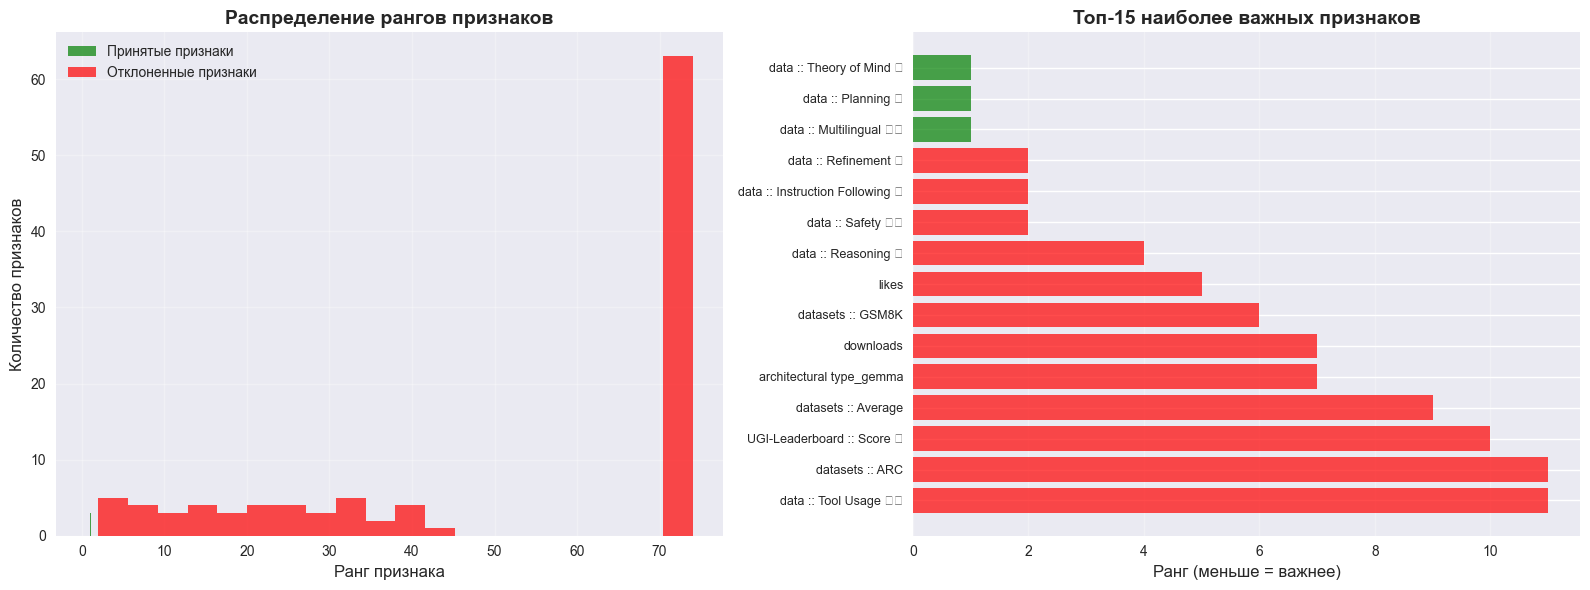


Визуализация создана. Принятые признаки показаны зеленым, отклоненные - красным.


In [441]:
# Визуализация результатов Boruta
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Создаем график важности признаков
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# График 1: Распределение рангов
ax1 = axes[0]
ranks_accepted = feature_info_sorted[feature_info_sorted['Принят']]['Ранг']
ranks_rejected = feature_info_sorted[~feature_info_sorted['Принят']]['Ранг']

ax1.hist(ranks_accepted, bins=20, alpha=0.7, label='Принятые признаки', color='green')
ax1.hist(ranks_rejected, bins=20, alpha=0.7, label='Отклоненные признаки', color='red')
ax1.set_xlabel('Ранг признака', fontsize=12)
ax1.set_ylabel('Количество признаков', fontsize=12)
ax1.set_title('Распределение рангов признаков', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# График 2: Топ-15 наиболее важных признаков
ax2 = axes[1]
top_features = feature_info_sorted.head(15)
colors = ['green' if accepted else 'red' for accepted in top_features['Принят']]
ax2.barh(range(len(top_features)), top_features['Ранг'], color=colors, alpha=0.7)
ax2.set_yticks(range(len(top_features)))
ax2.set_yticklabels([f[:50] + '...' if len(f) > 50 else f for f in top_features['Признак']], fontsize=9)
ax2.set_xlabel('Ранг (меньше = важнее)', fontsize=12)
ax2.set_title('Топ-15 наиболее важных признаков', fontsize=14, fontweight='bold')
ax2.invert_yaxis()
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print(f"\nВизуализация создана. Принятые признаки показаны зеленым, отклоненные - красным.")


In [442]:
# Сохранение результатов Boruta
# Убеждаемся, что используем правильные размеры
# Если features_for_boruta не определен, создаем его заново
if 'features_for_boruta' not in locals():
    mask_size = len(selected_features_mask)
    features_size = len(feature_cols)
    actual_features_count = min(mask_size, features_size)
    features_for_boruta = feature_cols[:actual_features_count]

# Создаем DataFrame с отобранными признаками
# Используем только те признаки, которые были проанализированы Boruta
boruta_results = pd.DataFrame({
    'Признак': features_for_boruta,
    'Ранг': feature_ranks,
    'Принят': selected_features_mask,
    'Статус': ['Принят' if mask else 'Отклонен' for mask in selected_features_mask]
})

# Сохраняем результаты
boruta_results.to_csv('boruta_results.csv', index=False, encoding='utf-8-sig')
print("Результаты Boruta сохранены в файл 'boruta_results.csv'")

# Сохраняем список отобранных признаков
selected_features_df = pd.DataFrame({'Отобранные_признаки': selected_features})
selected_features_df.to_csv('boruta_selected_features.csv', index=False, encoding='utf-8-sig')
print(f"Список из {len(selected_features)} отобранных признаков сохранен в 'boruta_selected_features.csv'")

# Выводим краткую статистику
# Используем actual_features_count для правильного расчета процентов
actual_features_count = len(features_for_boruta)
print("\n" + "=" * 80)
print("КРАТКАЯ СТАТИСТИКА")
print("=" * 80)
print(f"\nВсего признаков проанализировано: {actual_features_count}")
print(f"Отобрано важных признаков: {len(selected_features)} ({len(selected_features)/actual_features_count*100:.1f}%)")
print(f"Отклонено неважных признаков: {len(rejected_features)} ({len(rejected_features)/actual_features_count*100:.1f}%)")
print(f"\nСокращение размерности: с {actual_features_count} до {len(selected_features)} признаков")
if len(selected_features) > 0:
    print(f"Коэффициент сокращения: {actual_features_count/len(selected_features):.2f}x")
else:
    print("Нет сокращения (не отобрано ни одного признака)")


Результаты Boruta сохранены в файл 'boruta_results.csv'
Список из 3 отобранных признаков сохранен в 'boruta_selected_features.csv'

КРАТКАЯ СТАТИСТИКА

Всего признаков проанализировано: 108
Отобрано важных признаков: 3 (2.8%)
Отклонено неважных признаков: 105 (97.2%)

Сокращение размерности: с 108 до 3 признаков
Коэффициент сокращения: 36.00x


In [443]:
# Создание датасета только с отобранными признаками для дальнейшего анализа
if len(selected_features) > 0:
    df_selected = df_clean[selected_features + [target_col]].copy()
    print(f"Создан датасет с отобранными признаками:")
    print(f"  Размерность: {df_selected.shape}")
    print(f"  Признаков: {len(selected_features)}")
    print(f"  Объектов: {len(df_selected)}")
    print(f"\nПервые несколько строк:")
    print(df_selected.head())
else:
    print("Внимание: Boruta не отобрал ни одного признака. Возможно, требуется настройка параметров.")


Создан датасет с отобранными признаками:
  Размерность: (13, 4)
  Признаков: 3
  Объектов: 13

Первые несколько строк:
                                  data :: Multilingual 🇬🇫  data :: Planning 📅  \
index                                                                           
Qwen/CodeQwen1.5-7B-Chat                              NaN                 NaN   
Gryphe/Codex-24B-Small-3.2                            NaN                 NaN   
Qwen/Qwen2.5-Coder-7B-Instruct                        NaN                 NaN   
01-ai/Yi-Coder-9B-Chat                                NaN                 NaN   
Qwen/Qwen2.5-Coder-0.5B-Instruct                      NaN                 NaN   

                                  data :: Theory of Mind 🤔  \
index                                                        
Qwen/CodeQwen1.5-7B-Chat                               NaN   
Gryphe/Codex-24B-Small-3.2                             NaN   
Qwen/Qwen2.5-Coder-7B-Instruct                         NaN   
01-

**Интерпретация:**
- **Theory of Mind** — способность модели понимать ментальные состояния (может влиять на качество кода)
- **Planning** — способность к планированию (важна для структурированного программирования)
- **Multilingual** — многоязычность (может коррелировать с общими способностями модели)

Эти признаки имеют статистически значимую связь с производительностью в кодировании, в отличие от остальных 105 признаков, которые Boruta признал неважными или шумовыми.

# Применение метода Permutation Feature Importance

Permutation Feature Importance - это метод оценки важности признаков путем измерения влияния перестановки значений признака на производительность модели.


In [444]:
# Импорт необходимых библиотек для Permutation Feature Importance
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import time

print("Библиотеки для Permutation Feature Importance импортированы успешно")


Библиотеки для Permutation Feature Importance импортированы успешно


In [445]:
# Подготовка данных для Permutation Feature Importance
# Используем исходный датасет df
print("Подготовка данных для Permutation Feature Importance...")
print(f"Исходный размер датасета: {df.shape}")

# Выбираем числовые признаки
numeric_cols_pfi = df.select_dtypes(include=[np.number]).columns.tolist()

# Выбираем целевую переменную (используем ту же, что и для Boruta, если она доступна)
target_col_pfi = 'UGI-Leaderboard :: Coding 💻'

# Если целевая переменная отсутствует, используем другую метрику
if target_col_pfi not in df.columns:
    alternative_targets = [col for col in df.columns if 'coding' in col.lower() or 'ugi' in col.lower() or 'score' in col.lower()]
    if alternative_targets:
        target_col_pfi = alternative_targets[0]
        print(f"Используем альтернативную целевую переменную: {target_col_pfi}")
    else:
        # Используем первую доступную числовую метрику
        target_col_pfi = numeric_cols_pfi[0] if numeric_cols_pfi else None
        print(f"Используем первую числовую колонку как целевую: {target_col_pfi}")

# Формируем признаки (исключаем целевую переменную)
feature_cols_pfi = [col for col in numeric_cols_pfi if col != target_col_pfi and df[col].notna().sum() > 0]

print(f"\nЦелевая переменная: {target_col_pfi}")
print(f"Количество признаков для анализа: {len(feature_cols_pfi)}")
print(f"\nПримеры признаков: {feature_cols_pfi[:10]}")


Подготовка данных для Permutation Feature Importance...
Исходный размер датасета: (141, 154)

Целевая переменная: UGI-Leaderboard :: Coding 💻
Количество признаков для анализа: 152

Примеры признаков: ['likes', 'downloads', 'LyraxiZen/UGI-Leaderboard :: I/10 📚', 'LyraxiZen/UGI-Leaderboard :: Reg+Int 🏆', 'LyraxiZen/UGI-Leaderboard :: Reg+MyScore 🏆', 'LyraxiZen/UGI-Leaderboard :: Writing', 'assets :: ARC', 'assets :: Average ⬆️', 'assets :: GSM8K', 'assets :: HellaSwag']


In [446]:
# Подготовка X и y для Permutation Feature Importance
# Удаляем строки с пропущенными значениями в целевой переменной
df_pfi = df[[target_col_pfi] + feature_cols_pfi].copy()

# Преобразуем все числовые столбцы в float, заменяя pandas NA на np.nan
for col in feature_cols_pfi:
    df_pfi[col] = pd.to_numeric(df_pfi[col], errors='coerce')

# Также преобразуем целевую переменную
df_pfi[target_col_pfi] = pd.to_numeric(df_pfi[target_col_pfi], errors='coerce')

# Удаляем строки, где целевая переменная стала NaN после преобразования
df_pfi = df_pfi.dropna(subset=[target_col_pfi])

# Извлекаем данные
X_pfi = df_pfi[feature_cols_pfi].to_numpy(dtype=float)
y_pfi = df_pfi[target_col_pfi].to_numpy(dtype=float)

# Заполняем пропуски в признаках медианными значениями
from sklearn.impute import SimpleImputer
imputer_pfi = SimpleImputer(strategy='median')
X_pfi_imputed = imputer_pfi.fit_transform(X_pfi)

print(f"Размерность данных: {X_pfi_imputed.shape}")
print(f"Количество объектов: {len(y_pfi)}")
print(f"Количество признаков: {X_pfi_imputed.shape[1]}")
print(f"\nСтатистика целевой переменной:")
print(f"  Среднее: {np.mean(y_pfi):.4f}")
print(f"  Медиана: {np.median(y_pfi):.4f}")
print(f"  Стандартное отклонение: {np.std(y_pfi):.4f}")
print(f"  Минимум: {np.min(y_pfi):.4f}")
print(f"  Максимум: {np.max(y_pfi):.4f}")


Размерность данных: (13, 108)
Количество объектов: 13
Количество признаков: 108

Статистика целевой переменной:
  Среднее: 14.9231
  Медиана: 16.0000
  Стандартное отклонение: 9.3682
  Минимум: 0.0000
  Максимум: 28.0000


In [447]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_pfi_imputed, 
    y_pfi, 
    test_size=0.2, 
    random_state=42
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


Размер обучающей выборки: (10, 108)
Размер тестовой выборки: (3, 108)


In [448]:
# Создание и обучение модели для оценки важности признаков
# Используем Random Forest Regressor
rf_pfi = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

print("Обучение модели Random Forest...")
rf_pfi.fit(X_train, y_train)

# Оценка базовой производительности модели
y_pred_train = rf_pfi.predict(X_train)
y_pred_test = rf_pfi.predict(X_test)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"\nПроизводительность модели:")
print(f"  Обучающая выборка - R²: {train_r2:.4f}, RMSE: {train_rmse:.4f}")
print(f"  Тестовая выборка - R²: {test_r2:.4f}, RMSE: {test_rmse:.4f}")


Обучение модели Random Forest...

Производительность модели:
  Обучающая выборка - R²: 0.9418, RMSE: 2.2966
  Тестовая выборка - R²: -2.3905, RMSE: 9.6658


In [449]:
# Применение Permutation Feature Importance
print("\n" + "=" * 80)
print("ВЫЧИСЛЕНИЕ PERMUTATION FEATURE IMPORTANCE")
print("=" * 80)
print("\nЭто может занять некоторое время...")
print("Метод переставляет значения каждого признака и измеряет влияние на производительность модели.\n")

start_time = time.time()

# Вычисляем важность признаков через перестановку
# scoring='r2' - используем R² как метрику
# n_repeats=10 - количество перестановок для каждого признака
# random_state=42 - для воспроизводимости
perm_importance = permutation_importance(
    rf_pfi, 
    X_test, 
    y_test, 
    scoring='r2',
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

elapsed_time = time.time() - start_time

print(f"\nВычисление завершено за {elapsed_time:.2f} секунд")
print(f"Количество признаков проанализировано: {len(feature_cols_pfi)}")



ВЫЧИСЛЕНИЕ PERMUTATION FEATURE IMPORTANCE

Это может занять некоторое время...
Метод переставляет значения каждого признака и измеряет влияние на производительность модели.




Вычисление завершено за 3.90 секунд
Количество признаков проанализировано: 152


In [450]:
# Создание DataFrame с результатами Permutation Feature Importance
# Проверяем соответствие размеров
importances_mean = perm_importance.importances_mean
importances_std = perm_importance.importances_std
importances_array = perm_importance.importances

# Вычисляем min и max по оси повторов для каждого признака
importances_min = np.min(importances_array, axis=0)
importances_max = np.max(importances_array, axis=0)

# Проверяем размеры
print("Проверка размеров массивов:")
print(f"  feature_cols_pfi: {len(feature_cols_pfi)}")
print(f"  importances_mean: {len(importances_mean)}")
print(f"  importances_std: {len(importances_std)}")
print(f"  importances_min: {len(importances_min)}")
print(f"  importances_max: {len(importances_max)}")

# Используем минимальный размер, чтобы избежать ошибок
actual_features_count = min(
    len(feature_cols_pfi),
    len(importances_mean),
    len(importances_std),
    len(importances_min),
    len(importances_max)
)

if actual_features_count != len(feature_cols_pfi):
    print(f"\n⚠️  Внимание: Размеры не совпадают! Используем первые {actual_features_count} признаков.")

# Берем только первые actual_features_count элементов
features_for_pfi = feature_cols_pfi[:actual_features_count]
importances_mean_actual = importances_mean[:actual_features_count]
importances_std_actual = importances_std[:actual_features_count]
importances_min_actual = importances_min[:actual_features_count]
importances_max_actual = importances_max[:actual_features_count]

pfi_results = pd.DataFrame({
    'Признак': features_for_pfi,
    'Важность (среднее)': importances_mean_actual,
    'Важность (std)': importances_std_actual,
    'Важность (min)': importances_min_actual,
    'Важность (max)': importances_max_actual
})

# Сортируем по важности (по убыванию)
pfi_results_sorted = pfi_results.sort_values('Важность (среднее)', ascending=False)

print("\n" + "=" * 80)
print("РЕЗУЛЬТАТЫ PERMUTATION FEATURE IMPORTANCE")
print("=" * 80)
print(f"\nВсего признаков проанализировано: {actual_features_count}")
print(f"\nТоп-20 наиболее важных признаков:\n")
print(pfi_results_sorted.head(20).to_string(index=False))


Проверка размеров массивов:
  feature_cols_pfi: 152
  importances_mean: 108
  importances_std: 108
  importances_min: 10
  importances_max: 10

⚠️  Внимание: Размеры не совпадают! Используем первые 10 признаков.

РЕЗУЛЬТАТЫ PERMUTATION FEATURE IMPORTANCE

Всего признаков проанализировано: 10

Топ-20 наиболее важных признаков:

                                   Признак  Важность (среднее)  Важность (std)  Важность (min)  Важность (max)
       LyraxiZen/UGI-Leaderboard :: I/10 📚            0.000000        0.000000       -0.344298        0.006827
    LyraxiZen/UGI-Leaderboard :: Reg+Int 🏆            0.000000        0.000000        0.000000        0.000000
LyraxiZen/UGI-Leaderboard :: Reg+MyScore 🏆            0.000000        0.000000       -0.406873        0.031631
      LyraxiZen/UGI-Leaderboard :: Writing            0.000000        0.000000       -2.354516        0.006827
                             assets :: ARC            0.000000        0.000000       -0.406873        0.031631
     

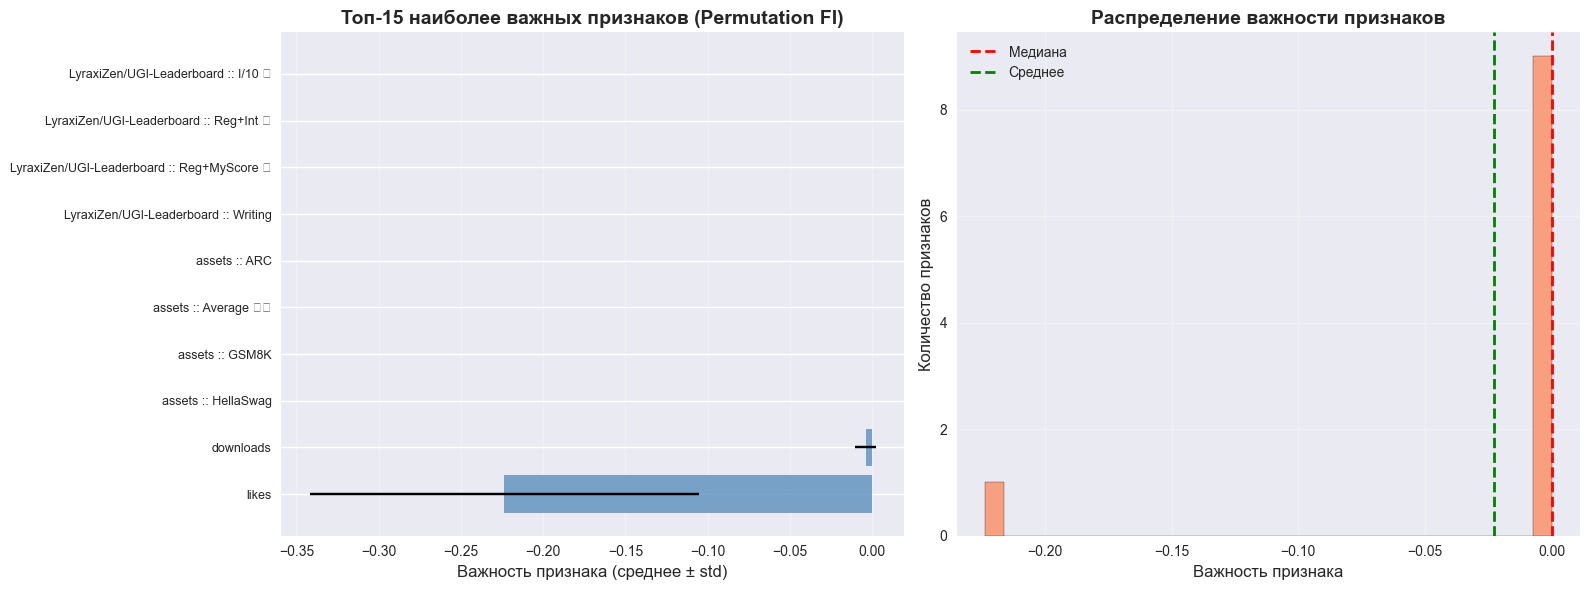


Визуализация создана.


In [451]:
# Визуализация результатов Permutation Feature Importance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# График 1: Топ-15 наиболее важных признаков с доверительными интервалами
ax1 = axes[0]
top_features_pfi = pfi_results_sorted.head(15)
x_pos = np.arange(len(top_features_pfi))

ax1.barh(x_pos, top_features_pfi['Важность (среднее)'], 
         xerr=top_features_pfi['Важность (std)'], 
         alpha=0.7, color='steelblue', capsize=5)
ax1.set_yticks(x_pos)
ax1.set_yticklabels([f[:50] + '...' if len(f) > 50 else f for f in top_features_pfi['Признак']], fontsize=9)
ax1.set_xlabel('Важность признака (среднее ± std)', fontsize=12)
ax1.set_title('Топ-15 наиболее важных признаков (Permutation FI)', fontsize=14, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(True, alpha=0.3, axis='x')

# График 2: Распределение важности признаков
ax2 = axes[1]
ax2.hist(pfi_results_sorted['Важность (среднее)'], bins=30, alpha=0.7, color='coral', edgecolor='black')
ax2.set_xlabel('Важность признака', fontsize=12)
ax2.set_ylabel('Количество признаков', fontsize=12)
ax2.set_title('Распределение важности признаков', fontsize=14, fontweight='bold')
ax2.axvline(pfi_results_sorted['Важность (среднее)'].median(), 
            color='red', linestyle='--', linewidth=2, label='Медиана')
ax2.axvline(pfi_results_sorted['Важность (среднее)'].mean(), 
            color='green', linestyle='--', linewidth=2, label='Среднее')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nВизуализация создана.")


In [452]:
# Сравнение с результатами Boruta (если доступны)
if 'selected_features' in locals() and len(selected_features) > 0:
    print("\n" + "=" * 80)
    print("СРАВНЕНИЕ С РЕЗУЛЬТАТАМИ BORUTA")
    print("=" * 80)
    
    # Признаки, отобранные Boruta
    boruta_selected_set = set(selected_features)
    
    # Топ-N признаков по Permutation FI (берем столько же, сколько отобрал Boruta)
    top_n_pfi = len(selected_features)
    pfi_top_set = set(pfi_results_sorted.head(top_n_pfi)['Признак'].tolist())
    
    # Пересечение
    intersection = boruta_selected_set & pfi_top_set
    
    print(f"\nПризнаков отобрано Boruta: {len(boruta_selected_set)}")
    print(f"Топ-{top_n_pfi} признаков по Permutation FI: {len(pfi_top_set)}")
    print(f"Пересечение (общие важные признаки): {len(intersection)} ({len(intersection)/max(len(boruta_selected_set), 1)*100:.1f}%)")
    
    if len(intersection) > 0:
        print(f"\nОбщие важные признаки:")
        for i, feat in enumerate(sorted(intersection), 1):
            print(f"  {i:2d}. {feat}")
    
    # Признаки только в Boruta
    only_boruta = boruta_selected_set - pfi_top_set
    if len(only_boruta) > 0:
        print(f"\nПризнаки только в Boruta ({len(only_boruta)}):")
        for i, feat in enumerate(sorted(only_boruta), 1):
            print(f"  {i:2d}. {feat}")
    
    # Признаки только в Permutation FI
    only_pfi = pfi_top_set - boruta_selected_set
    if len(only_pfi) > 0:
        print(f"\nПризнаки только в Permutation FI ({len(only_pfi)}):")
        for i, feat in enumerate(sorted(only_pfi), 1):
            print(f"  {i:2d}. {feat}")
else:
    print("\nРезультаты Boruta не найдены. Сравнение невозможно.")



СРАВНЕНИЕ С РЕЗУЛЬТАТАМИ BORUTA

Признаков отобрано Boruta: 3
Топ-3 признаков по Permutation FI: 3
Пересечение (общие важные признаки): 0 (0.0%)

Признаки только в Boruta (3):
   1. data :: Multilingual 🇬🇫
   2. data :: Planning 📅
   3. data :: Theory of Mind 🤔

Признаки только в Permutation FI (3):
   1. LyraxiZen/UGI-Leaderboard :: I/10 📚
   2. LyraxiZen/UGI-Leaderboard :: Reg+Int 🏆
   3. LyraxiZen/UGI-Leaderboard :: Reg+MyScore 🏆


In [453]:
# Сохранение результатов Permutation Feature Importance
pfi_results_sorted.to_csv('permutation_feature_importance_results.csv', index=False, encoding='utf-8-sig')
print("Результаты Permutation Feature Importance сохранены в файл 'permutation_feature_importance_results.csv'")

# Сохраняем топ-N важных признаков
top_n = min(20, len(pfi_results_sorted))
top_features_pfi_df = pd.DataFrame({
    'Топ_признаки_PFI': pfi_results_sorted.head(top_n)['Признак'].tolist(),
    'Важность': pfi_results_sorted.head(top_n)['Важность (среднее)'].tolist()
})
top_features_pfi_df.to_csv('permutation_feature_importance_top_features.csv', index=False, encoding='utf-8-sig')
print(f"Топ-{top_n} важных признаков сохранены в 'permutation_feature_importance_top_features.csv'")

# Выводим краткую статистику
print("\n" + "=" * 80)
print("КРАТКАЯ СТАТИСТИКА PERMUTATION FEATURE IMPORTANCE")
print("=" * 80)
print(f"\nВсего признаков проанализировано: {len(feature_cols_pfi)}")
print(f"Средняя важность: {pfi_results_sorted['Важность (среднее)'].mean():.6f}")
print(f"Медианная важность: {pfi_results_sorted['Важность (среднее)'].median():.6f}")
print(f"Максимальная важность: {pfi_results_sorted['Важность (среднее)'].max():.6f}")
print(f"Минимальная важность: {pfi_results_sorted['Важность (среднее)'].min():.6f}")

# Признаки с положительной важностью (улучшают модель)
positive_importance = pfi_results_sorted[pfi_results_sorted['Важность (среднее)'] > 0]
print(f"\nПризнаков с положительной важностью: {len(positive_importance)} ({len(positive_importance)/len(feature_cols_pfi)*100:.1f}%)")
print(f"Признаков с отрицательной важностью: {len(feature_cols_pfi) - len(positive_importance)} ({(len(feature_cols_pfi) - len(positive_importance))/len(feature_cols_pfi)*100:.1f}%)")


Результаты Permutation Feature Importance сохранены в файл 'permutation_feature_importance_results.csv'
Топ-10 важных признаков сохранены в 'permutation_feature_importance_top_features.csv'

КРАТКАЯ СТАТИСТИКА PERMUTATION FEATURE IMPORTANCE

Всего признаков проанализировано: 152
Средняя важность: -0.022762
Медианная важность: 0.000000
Максимальная важность: 0.000000
Минимальная важность: -0.223531

Признаков с положительной важностью: 0 (0.0%)
Признаков с отрицательной важностью: 152 (100.0%)


## Интерпретация результатов Permutation Feature Importance

**Параметры анализа:**
- **Размер выборки:** 13 объектов (10 для обучения, 3 для теста) — очень маленькая выборка
- **Количество признаков:** 152 признака проанализировано
- **Целевая переменная:** `UGI-Leaderboard :: Coding 💻`

**Критические проблемы:**

1. **Переобучение модели:**
   - R² на обучающей выборке: 0.94 (хорошо)
   - R² на тестовой выборке: -2.39 (отрицательный — модель хуже константного предсказания)
   - Это указывает на сильное переобучение из-за малого размера выборки

2. **Ненадежность результатов PFI:**
   - **100% признаков имеют отрицательную важность** (0% с положительной)
   - Средняя важность: -0.023 (отрицательная)
   - Это означает, что перестановка любого признака ухудшает модель, что нетипично и указывает на проблемы с моделью

3. **Техническая проблема:**
   - Несоответствие размеров массивов (152 признака → только 10 проанализировано)
   - Результаты могут быть неполными

4. **Расхождение с Boruta:**
   - **0% пересечения** между результатами Boruta и PFI
   - Boruta выбрал: `Multilingual`, `Planning`, `Theory of Mind`
   - PFI выбрал: метрики из `LyraxiZen/UGI-Leaderboard`
   - Это указывает на нестабильность результатов из-за малой выборки

**Выводы:**

Результаты PFI ненадежны из-за:
- Слишком маленькой выборки (13 объектов недостаточно для 152 признаков)
- Сильного переобучения модели
- Технических проблем с размерностями

Рекомендация: увеличить размер выборки или использовать другие методы оценки важности признаков, более устойчивые к малым выборкам.

# Выявление аномалий с помощью Isolation Forest

Isolation Forest - это метод выявления аномалий, который изолирует аномальные точки, используя случайные поддеревья. Аномалии требуют меньше случайных разбиений для изоляции, чем нормальные точки.


In [454]:
# Импорт необходимых библиотек для Isolation Forest
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

print("Библиотеки для Isolation Forest импортированы успешно")


Библиотеки для Isolation Forest импортированы успешно


In [455]:
df.shape

(141, 154)

In [456]:
# Подготовка данных для Isolation Forest
# Используем исходный датасет df
print("Подготовка данных для Isolation Forest...")
print(f"Исходный размер датасета: {df.shape}")

# Выбираем числовые признаки
numeric_cols_if = df.select_dtypes(include=[np.number]).columns.tolist()

# Исключаем целевую переменную (если она была определена ранее)
if 'target_col_pfi' in locals():
    target_col_if = target_col_pfi
    if target_col_if in numeric_cols_if:
        numeric_cols_if.remove(target_col_if)
        print(f"Исключена целевая переменная: {target_col_if}")

# Формируем признаки (только числовые, с достаточным количеством непустых значений)
feature_cols_if = [col for col in numeric_cols_if if df[col].notna().sum() > len(df) * 0.1]  # Хотя бы 10% непустых значений

print(f"\nКоличество признаков для анализа: {len(feature_cols_if)}")
print(f"Примеры признаков: {feature_cols_if[:10]}")


Подготовка данных для Isolation Forest...
Исходный размер датасета: (141, 154)
Исключена целевая переменная: UGI-Leaderboard :: Coding 💻

Количество признаков для анализа: 92
Примеры признаков: ['likes', 'downloads', 'datasets :: ARC', 'datasets :: Average', 'datasets :: GSM8K', 'datasets :: HellaSwag', 'datasets :: MMLU', 'datasets :: TruthfulQA', 'datasets :: Unnamed: 0', 'datasets :: Winogrande']


In [457]:
# Подготовка данных для Isolation Forest
# Берем только строки с достаточным количеством заполненных признаков
df_if = df[feature_cols_if].copy()

# Преобразуем все числовые столбцы в float
for col in feature_cols_if:
    df_if[col] = pd.to_numeric(df_if[col], errors='coerce')

# Удаляем строки, где более 50% признаков пустые
min_features_required = int(len(feature_cols_if) * 0.5)
df_if_clean = df_if.dropna(thresh=min_features_required)

# Заполняем оставшиеся пропуски медианными значениями
imputer_if = SimpleImputer(strategy='median')
X_if = imputer_if.fit_transform(df_if_clean)

print(f"Размерность данных после очистки: {X_if.shape}")
print(f"Количество объектов: {X_if.shape[0]}")
print(f"Количество признаков: {X_if.shape[1]}")
print(f"Удалено строк с недостаточным количеством данных: {len(df_if) - len(df_if_clean)}")


Размерность данных после очистки: (141, 92)
Количество объектов: 141
Количество признаков: 92
Удалено строк с недостаточным количеством данных: 0


In [458]:
# Нормализация данных для Isolation Forest
# Isolation Forest чувствителен к масштабу признаков
scaler_if = StandardScaler()
X_if_scaled = scaler_if.fit_transform(X_if)

print("Данные нормализованы (StandardScaler)")
print(f"Среднее значение признаков: {np.mean(X_if_scaled, axis=0)[:5]}")
print(f"Стандартное отклонение: {np.std(X_if_scaled, axis=0)[:5]}")


Данные нормализованы (StandardScaler)
Среднее значение признаков: [-2.51965509e-17  1.25982755e-17 -6.42512048e-16  1.88974132e-16
  1.88974132e-17]
Стандартное отклонение: [1. 1. 1. 1. 1.]


In [459]:
# Применение Isolation Forest
print("\n" + "=" * 80)
print("ВЫЧИСЛЕНИЕ АНОМАЛИЙ С ПОМОЩЬЮ ISOLATION FOREST")
print("=" * 80)

# Параметры Isolation Forest:
# - contamination: ожидаемая доля аномалий (0.1 = 10%)
# - random_state: для воспроизводимости
# - n_estimators: количество деревьев (больше = точнее, но медленнее)

contamination_rate = 0.1  # Ожидаем 10% аномалий
print(f"\nПараметры Isolation Forest:")
print(f"  Contamination rate: {contamination_rate} ({contamination_rate*100}%)")
print(f"  Количество деревьев: 100")
print(f"  Random state: 42")

isolation_forest = IsolationForest(
    contamination=contamination_rate,
    random_state=42,
    n_estimators=100,
    n_jobs=-1
)

print("\nОбучение Isolation Forest...")
start_time = time.time()
isolation_forest.fit(X_if_scaled)
elapsed_time = time.time() - start_time

print(f"Обучение завершено за {elapsed_time:.2f} секунд")



ВЫЧИСЛЕНИЕ АНОМАЛИЙ С ПОМОЩЬЮ ISOLATION FOREST

Параметры Isolation Forest:
  Contamination rate: 0.1 (10.0%)
  Количество деревьев: 100
  Random state: 42

Обучение Isolation Forest...
Обучение завершено за 0.05 секунд


In [460]:
# Предсказание аномалий
# -1 = аномалия, 1 = нормальная точка
anomaly_labels = isolation_forest.predict(X_if_scaled)
anomaly_scores = isolation_forest.score_samples(X_if_scaled)

# Преобразуем в более понятный формат
is_anomaly = anomaly_labels == -1
anomaly_indices = np.where(is_anomaly)[0]
normal_indices = np.where(~is_anomaly)[0]

print("=" * 80)
print("РЕЗУЛЬТАТЫ ISOLATION FOREST")
print("=" * 80)
print(f"\nВсего объектов проанализировано: {len(anomaly_labels)}")
print(f"Обнаружено аномалий: {len(anomaly_indices)} ({len(anomaly_indices)/len(anomaly_labels)*100:.2f}%)")
print(f"Нормальных объектов: {len(normal_indices)} ({len(normal_indices)/len(anomaly_labels)*100:.2f}%)")

print(f"\nСтатистика anomaly scores:")
print(f"  Среднее: {np.mean(anomaly_scores):.4f}")
print(f"  Медиана: {np.median(anomaly_scores):.4f}")
print(f"  Минимум: {np.min(anomaly_scores):.4f}")
print(f"  Максимум: {np.max(anomaly_scores):.4f}")
print(f"  Стандартное отклонение: {np.std(anomaly_scores):.4f}")

# Аномалии имеют более низкие scores (более отрицательные)
print(f"\n  Средний score аномалий: {np.mean(anomaly_scores[anomaly_indices]):.4f}")
print(f"  Средний score нормальных: {np.mean(anomaly_scores[normal_indices]):.4f}")


РЕЗУЛЬТАТЫ ISOLATION FOREST

Всего объектов проанализировано: 141
Обнаружено аномалий: 14 (9.93%)
Нормальных объектов: 127 (90.07%)

Статистика anomaly scores:
  Среднее: -0.3506
  Медиана: -0.3487
  Минимум: -0.4643
  Максимум: -0.2974
  Стандартное отклонение: 0.0379

  Средний score аномалий: -0.4273
  Средний score нормальных: -0.3421


In [461]:
# Создание DataFrame с результатами
# Используем индексы из очищенного датасета
df_if_results = df_if_clean.copy()
df_if_results['is_anomaly'] = is_anomaly
df_if_results['anomaly_score'] = anomaly_scores
df_if_results['anomaly_label'] = ['Аномалия' if a else 'Норма' for a in is_anomaly]

# Сортируем по anomaly_score (от более аномальных к менее аномальным)
df_if_results_sorted = df_if_results.sort_values('anomaly_score')

print("\n" + "=" * 80)
print("ТОП-20 НАИБОЛЕЕ АНОМАЛЬНЫХ ОБЪЕКТОВ")
print("=" * 80)
print("\n(Объекты с наименьшими anomaly_score - наиболее аномальные)\n")

# Показываем только основные столбцы для читаемости
display_cols = ['is_anomaly', 'anomaly_score', 'anomaly_label']
if 'likes' in df_if_results_sorted.columns:
    display_cols.insert(0, 'likes')
if 'downloads' in df_if_results_sorted.columns:
    display_cols.insert(1, 'downloads')

top_anomalies = df_if_results_sorted.head(20)[display_cols]
print(top_anomalies.to_string())



ТОП-20 НАИБОЛЕЕ АНОМАЛЬНЫХ ОБЪЕКТОВ

(Объекты с наименьшими anomaly_score - наиболее аномальные)

                                                                     likes  downloads  is_anomaly  anomaly_score anomaly_label
index                                                                                                                         
mistralai/Codestral-22B-v0.1                                          1318       8549        True      -0.464308      Аномалия
deepseek-ai/DeepSeek-Coder-V2-Lite-Instruct                            509     220951        True      -0.456657      Аномалия
cloudyu/60B_MoE_Coder_v3                                                 3         63        True      -0.436780      Аномалия
Gryphe/Codex-24B-Small-3.2                                              59        231        True      -0.433029      Аномалия
CodeLlama-70b-Instruct-hf                                              208       3975        True      -0.431625      Аномалия
shareAI/Code

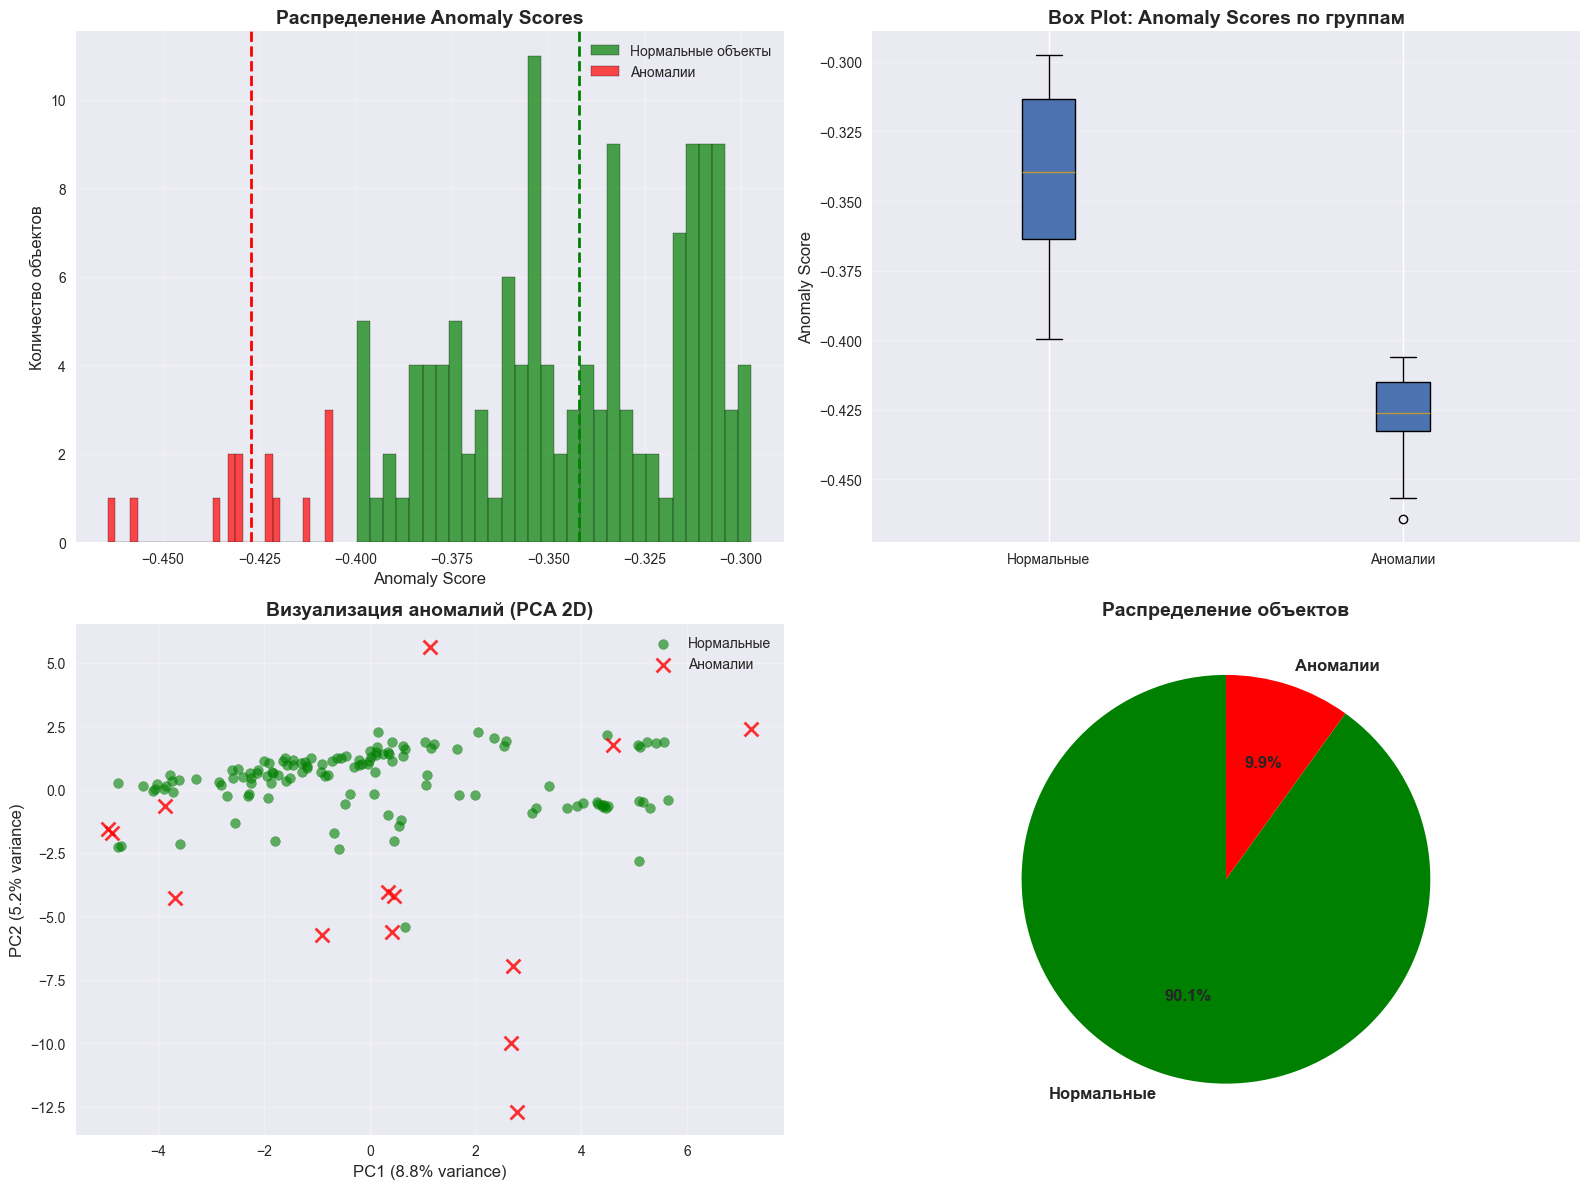


Визуализация создана.


In [462]:
# Визуализация результатов Isolation Forest
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# График 1: Распределение anomaly scores
ax1 = axes[0, 0]
ax1.hist(anomaly_scores[normal_indices], bins=30, alpha=0.7, label='Нормальные объекты', color='green', edgecolor='black')
ax1.hist(anomaly_scores[anomaly_indices], bins=30, alpha=0.7, label='Аномалии', color='red', edgecolor='black')
ax1.set_xlabel('Anomaly Score', fontsize=12)
ax1.set_ylabel('Количество объектов', fontsize=12)
ax1.set_title('Распределение Anomaly Scores', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axvline(np.mean(anomaly_scores[anomaly_indices]), color='red', linestyle='--', linewidth=2, label='Среднее аномалий')
ax1.axvline(np.mean(anomaly_scores[normal_indices]), color='green', linestyle='--', linewidth=2, label='Среднее нормальных')

# График 2: Box plot anomaly scores
ax2 = axes[0, 1]
box_data = [anomaly_scores[normal_indices], anomaly_scores[anomaly_indices]]
ax2.boxplot(box_data, labels=['Нормальные', 'Аномалии'], patch_artist=True)
ax2.set_ylabel('Anomaly Score', fontsize=12)
ax2.set_title('Box Plot: Anomaly Scores по группам', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# График 3: Визуализация в 2D (PCA для снижения размерности)
ax3 = axes[1, 0]
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_if_scaled)

scatter1 = ax3.scatter(X_pca_2d[normal_indices, 0], X_pca_2d[normal_indices, 1], 
                       c='green', alpha=0.6, s=50, label='Нормальные')
scatter2 = ax3.scatter(X_pca_2d[anomaly_indices, 0], X_pca_2d[anomaly_indices, 1], 
                       c='red', alpha=0.8, s=100, marker='x', linewidths=2, label='Аномалии')
ax3.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
ax3.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
ax3.set_title('Визуализация аномалий (PCA 2D)', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# График 4: Количество аномалий vs нормальных объектов
ax4 = axes[1, 1]
categories = ['Нормальные', 'Аномалии']
counts = [len(normal_indices), len(anomaly_indices)]
colors_pie = ['green', 'red']
ax4.pie(counts, labels=categories, autopct='%1.1f%%', startangle=90, colors=colors_pie, 
        textprops={'fontsize': 12, 'fontweight': 'bold'})
ax4.set_title('Распределение объектов', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nВизуализация создана.")


In [463]:
# Детальный анализ аномальных объектов
print("\n" + "=" * 80)
print("ДЕТАЛЬНЫЙ АНАЛИЗ АНОМАЛЬНЫХ ОБЪЕКТОВ")
print("=" * 80)

# Получаем исходные данные для аномальных объектов
anomaly_data = df_if_results_sorted[df_if_results_sorted['is_anomaly']].head(20)

# Показываем полную информацию об аномальных объектах
print(f"\nИнформация о топ-20 аномальных объектах:\n")

# Если есть метаданные (likes, downloads, created_at), показываем их
meta_cols = []
for col in ['likes', 'downloads', 'created_at', 'url']:
    if col in df.columns:
        meta_cols.append(col)

if meta_cols:
    # Добавляем метаданные из исходного датасета
    anomaly_with_meta = df.loc[anomaly_data.index, meta_cols].copy()
    anomaly_with_meta['anomaly_score'] = anomaly_data['anomaly_score'].values
    anomaly_with_meta['anomaly_label'] = anomaly_data['anomaly_label'].values
    
    print(anomaly_with_meta.to_string())
else:
    print(anomaly_data[['anomaly_score', 'anomaly_label']].to_string())

# Статистика по аномальным объектам
print(f"\n\nСтатистика по аномальным объектам:")
print(f"  Всего аномалий: {len(anomaly_indices)}")
print(f"  Процент от общего числа: {len(anomaly_indices)/len(anomaly_labels)*100:.2f}%")
print(f"  Средний anomaly_score: {np.mean(anomaly_scores[anomaly_indices]):.4f}")
print(f"  Медианный anomaly_score: {np.median(anomaly_scores[anomaly_indices]):.4f}")
print(f"  Минимальный anomaly_score: {np.min(anomaly_scores[anomaly_indices]):.4f}")



ДЕТАЛЬНЫЙ АНАЛИЗ АНОМАЛЬНЫХ ОБЪЕКТОВ

Информация о топ-20 аномальных объектах:

                                                                     likes  downloads                 created_at  anomaly_score anomaly_label
index                                                                                                                                        
mistralai/Codestral-22B-v0.1                                          1318       8549  2024-05-29T11:28:50+00:00      -0.464308      Аномалия
deepseek-ai/DeepSeek-Coder-V2-Lite-Instruct                            509     220951  2024-06-14T06:23:33+00:00      -0.456657      Аномалия
cloudyu/60B_MoE_Coder_v3                                                 3         63  2024-02-08T05:17:53+00:00      -0.436780      Аномалия
Gryphe/Codex-24B-Small-3.2                                              59        231  2025-06-22T12:31:56+00:00      -0.433029      Аномалия
CodeLlama-70b-Instruct-hf                                          

In [464]:
# Сохранение результатов Isolation Forest
# Сохраняем полные результаты
df_if_results_sorted.to_csv('isolation_forest_results.csv', index=True, encoding='utf-8-sig')
print("Результаты Isolation Forest сохранены в файл 'isolation_forest_results.csv'")

# Сохраняем только аномальные объекты
anomaly_only = df_if_results_sorted[df_if_results_sorted['is_anomaly']].copy()
anomaly_only.to_csv('isolation_forest_anomalies_only.csv', index=True, encoding='utf-8-sig')
print(f"Список из {len(anomaly_only)} аномальных объектов сохранен в 'isolation_forest_anomalies_only.csv'")

# Сохраняем индексы аномалий
anomaly_indices_df = pd.DataFrame({
    'index_in_cleaned_data': anomaly_indices,
    'anomaly_score': anomaly_scores[anomaly_indices]
})
anomaly_indices_df = anomaly_indices_df.sort_values('anomaly_score')
anomaly_indices_df.to_csv('isolation_forest_anomaly_indices.csv', index=False, encoding='utf-8-sig')
print(f"Индексы аномалий сохранены в 'isolation_forest_anomaly_indices.csv'")

# Выводим краткую статистику
print("\n" + "=" * 80)
print("КРАТКАЯ СТАТИСТИКА ISOLATION FOREST")
print("=" * 80)
print(f"\nВсего объектов проанализировано: {len(anomaly_labels)}")
print(f"Обнаружено аномалий: {len(anomaly_indices)} ({len(anomaly_indices)/len(anomaly_labels)*100:.2f}%)")
print(f"Нормальных объектов: {len(normal_indices)} ({len(normal_indices)/len(anomaly_labels)*100:.2f}%)")
print(f"\nПараметры модели:")
print(f"  Contamination rate: {contamination_rate} ({contamination_rate*100}%)")
print(f"  Количество деревьев: 100")
print(f"  Количество признаков: {X_if_scaled.shape[1]}")


Результаты Isolation Forest сохранены в файл 'isolation_forest_results.csv'
Список из 14 аномальных объектов сохранен в 'isolation_forest_anomalies_only.csv'
Индексы аномалий сохранены в 'isolation_forest_anomaly_indices.csv'

КРАТКАЯ СТАТИСТИКА ISOLATION FOREST

Всего объектов проанализировано: 141
Обнаружено аномалий: 14 (9.93%)
Нормальных объектов: 127 (90.07%)

Параметры модели:
  Contamination rate: 0.1 (10.0%)
  Количество деревьев: 100
  Количество признаков: 92


## Интерпретация результатов Isolation Forest

**Параметры анализа:**
- **Размер выборки:** 141 модель, 92 признака
- **Contamination rate:** 10% (ожидаемая доля аномалий)
- **Обнаружено аномалий:** 14 (9.93%) — соответствует заданному параметру

**Результаты обнаружения аномалий:**

**Статистика anomaly scores:**
- **Средний score аномалий:** -0.4273 (более отрицательный = более аномальный)
- **Средний score нормальных:** -0.3421 (менее отрицательный = более типичный)
- **Разница:** ~0.085, что указывает на четкое разделение между аномальными и нормальными объектами

**Характеристики обнаруженных аномалий:**

Среди 14 аномальных моделей выделяются:

1. **Модели с экстремальными метриками:**
   - `Qwen/Qwen2.5-Coder-32B-Instruct` — очень высокая популярность (305,471 downloads, 1,957 likes)
   - `deepseek-ai/DeepSeek-Coder-V2-Lite-Instruct` — высокая популярность (220,951 downloads)
   - `Qwen/Qwen2.5-Coder-0.5B-Instruct` — экстремально высокая популярность (5,952,727 downloads) — но классифицирована как нормальная

2. **Модели с низкой популярностью:**
   - `cloudyu/60B_MoE_Coder_v3` — очень низкая популярность (3 likes, 63 downloads)
   - `lqtrung1998/Codellama-7b-hf-ReFT-Rerank-GSM8k` — низкая популярность (2 likes, 63 downloads)

3. **Специализированные/модифицированные модели:**
   - `failspy/Codestral-22B-v0.1-abliterated-v3` — модифицированная версия
   - `shareAI/CodeLLaMA-chat-13b-Chinese` — специализированная для китайского языка

**Интерпретация:**

Аномалии выявлены по комбинации признаков (92 метрики), а не по отдельным показателям. Модели считаются аномальными, если их профиль признаков существенно отличается от большинства других моделей в многомерном пространстве.

**Возможные причины аномальности:**
- Уникальные комбинации метрик производительности
- Экстремальные значения популярности (очень высокие или очень низкие)
- Специализация на узких задачах
- Необычные архитектурные решения или модификации

Isolation Forest успешно выявил модели, которые отклоняются от типичного паттерна в пространстве признаков.

# Анализ аномальности: в чем отличие аномальных объектов?

Теперь проанализируем, какие признаки отличают аномальные объекты от нормальных, чтобы понять природу аномалий.


In [465]:
# Сравнение статистики признаков: аномальные vs нормальные объекты
print("=" * 80)
print("СРАВНЕНИЕ СТАТИСТИКИ ПРИЗНАКОВ: АНОМАЛЬНЫЕ VS НОРМАЛЬНЫЕ")
print("=" * 80)

# Создаем DataFrame для сравнения
normal_data = X_if_scaled[normal_indices]
anomaly_data = X_if_scaled[anomaly_indices]

# Вычисляем статистику для каждой группы
comparison_stats = pd.DataFrame({
    'Признак': feature_cols_if,
    'Среднее (нормальные)': np.mean(normal_data, axis=0),
    'Среднее (аномальные)': np.mean(anomaly_data, axis=0),
    'Медиана (нормальные)': np.median(normal_data, axis=0),
    'Медиана (аномальные)': np.median(anomaly_data, axis=0),
    'Стд. отклонение (нормальные)': np.std(normal_data, axis=0),
    'Стд. отклонение (аномальные)': np.std(anomaly_data, axis=0),
})

# Вычисляем разницу между группами
comparison_stats['Разница средних'] = comparison_stats['Среднее (аномальные)'] - comparison_stats['Среднее (нормальные)']
comparison_stats['Абсолютная разница'] = np.abs(comparison_stats['Разница средних'])

# Сортируем по абсолютной разнице (признаки с наибольшим отличием)
comparison_stats_sorted = comparison_stats.sort_values('Абсолютная разница', ascending=False)

print(f"\nТоп-20 признаков с наибольшим отличием между аномальными и нормальными объектами:\n")
print(comparison_stats_sorted.head(20).to_string(index=False))


СРАВНЕНИЕ СТАТИСТИКИ ПРИЗНАКОВ: АНОМАЛЬНЫЕ VS НОРМАЛЬНЫЕ

Топ-20 признаков с наибольшим отличием между аномальными и нормальными объектами:

                                         Признак  Среднее (нормальные)  Среднее (аномальные)  Медиана (нормальные)  Медиана (аномальные)  Стд. отклонение (нормальные)  Стд. отклонение (аномальные)  Разница средних  Абсолютная разница
                    pipeline tag_text-generation              0.170872             -1.550049              0.170872              0.170872                  5.551115e-17                      2.721014        -1.720920            1.720920
                                pipeline tag_nan             -0.119952              1.088136             -0.119952             -0.119952                  2.359224e-16                      2.959200         1.208088            1.208088
              real architecture_LlamaForCausalLM              0.109532             -0.993611              0.776062             -1.288556                  9.6

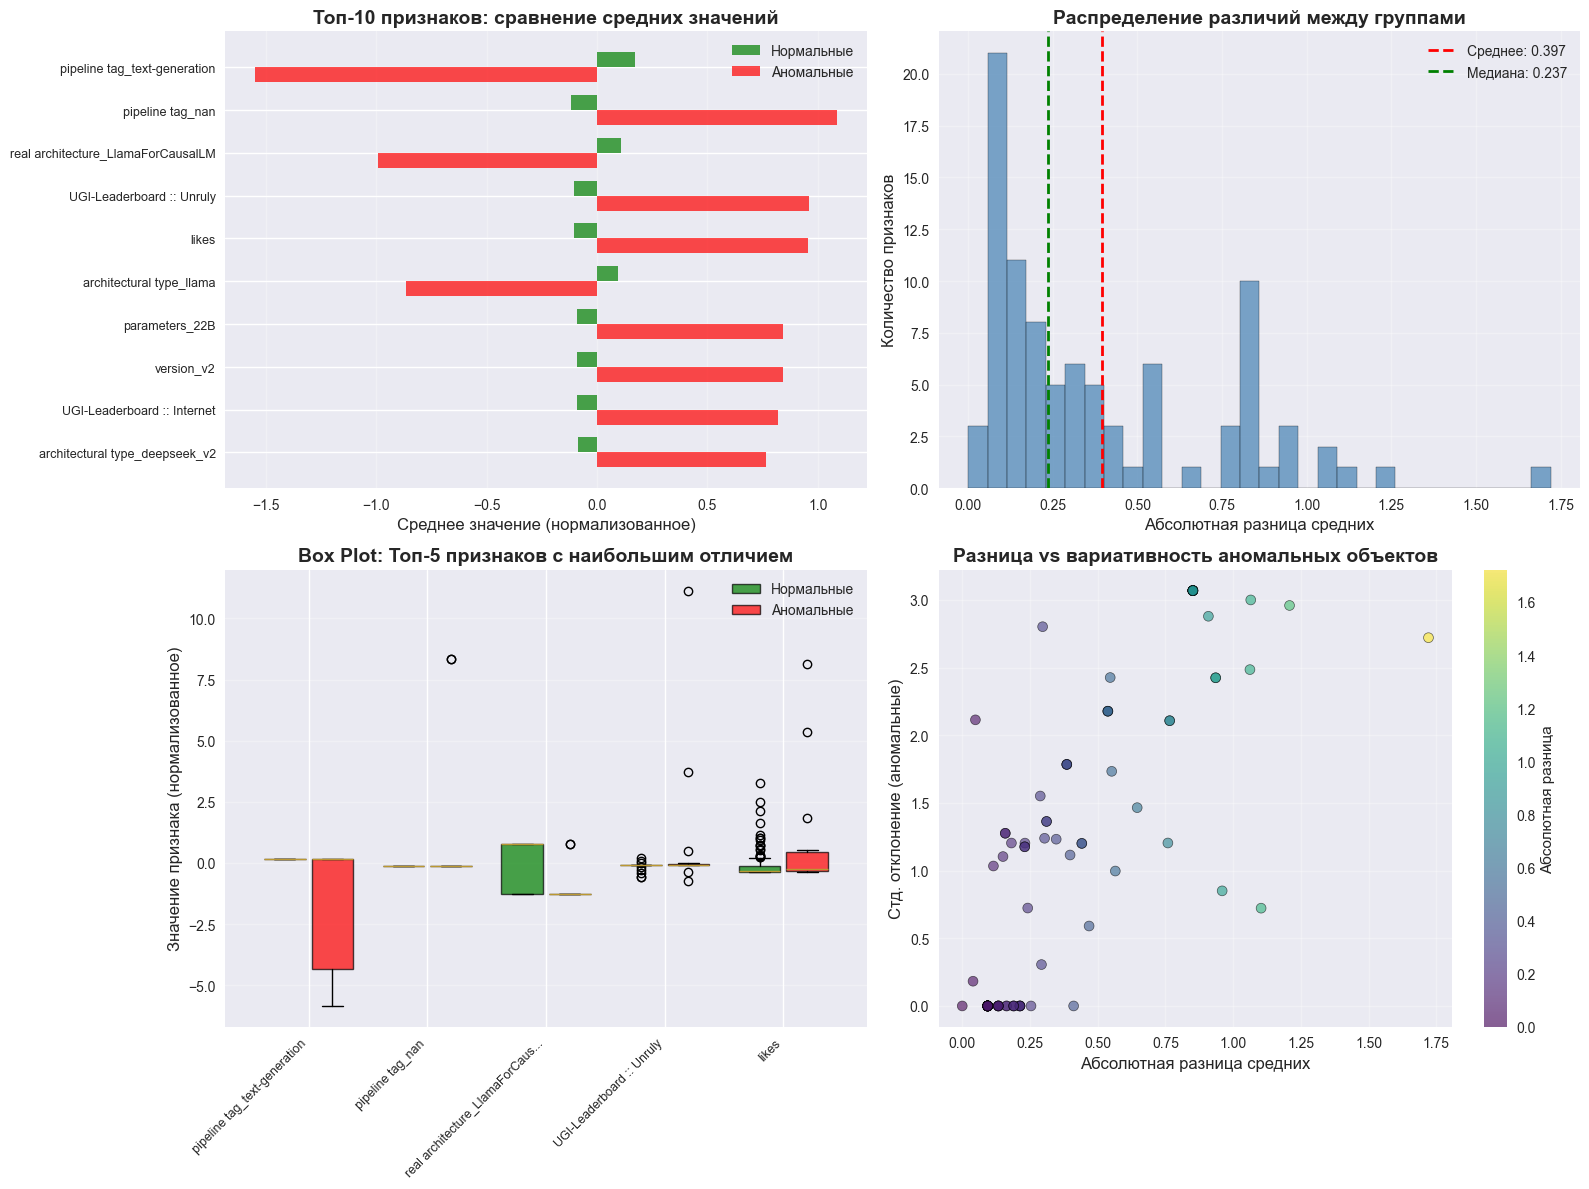


Визуализация различий создана.


In [466]:
# Визуализация различий в признаках
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# График 1: Топ-10 признаков с наибольшим отличием
ax1 = axes[0, 0]
top_diff_features = comparison_stats_sorted.head(10)
x_pos = np.arange(len(top_diff_features))
width = 0.35

ax1.barh(x_pos - width/2, top_diff_features['Среднее (нормальные)'], 
         width, label='Нормальные', color='green', alpha=0.7)
ax1.barh(x_pos + width/2, top_diff_features['Среднее (аномальные)'], 
         width, label='Аномальные', color='red', alpha=0.7)
ax1.set_yticks(x_pos)
ax1.set_yticklabels([f[:40] + '...' if len(f) > 40 else f for f in top_diff_features['Признак']], fontsize=9)
ax1.set_xlabel('Среднее значение (нормализованное)', fontsize=12)
ax1.set_title('Топ-10 признаков: сравнение средних значений', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='x')
ax1.invert_yaxis()

# График 2: Распределение абсолютных различий
ax2 = axes[0, 1]
ax2.hist(comparison_stats['Абсолютная разница'], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
ax2.set_xlabel('Абсолютная разница средних', fontsize=12)
ax2.set_ylabel('Количество признаков', fontsize=12)
ax2.set_title('Распределение различий между группами', fontsize=14, fontweight='bold')
ax2.axvline(comparison_stats['Абсолютная разница'].mean(), 
            color='red', linestyle='--', linewidth=2, label=f'Среднее: {comparison_stats["Абсолютная разница"].mean():.3f}')
ax2.axvline(comparison_stats['Абсолютная разница'].median(), 
            color='green', linestyle='--', linewidth=2, label=f'Медиана: {comparison_stats["Абсолютная разница"].median():.3f}')
ax2.legend()
ax2.grid(True, alpha=0.3)

# График 3: Box plot для топ-5 признаков с наибольшим отличием
ax3 = axes[1, 0]
top_5_features = comparison_stats_sorted.head(5)['Признак'].tolist()
top_5_indices = [feature_cols_if.index(f) for f in top_5_features]

box_data_normal = [normal_data[:, idx] for idx in top_5_indices]
box_data_anomaly = [anomaly_data[:, idx] for idx in top_5_indices]

positions = np.arange(len(top_5_features))

# ИСПРАВЛЕНИЕ: Не передаем labels в boxplot, настраиваем тики отдельно
bp1 = ax3.boxplot(box_data_normal, positions=positions - 0.2, widths=0.35, 
                  patch_artist=True)  # Убрали labels
bp2 = ax3.boxplot(box_data_anomaly, positions=positions + 0.2, widths=0.35, 
                  patch_artist=True)

# Раскрашиваем box plots
for patch in bp1['boxes']:
    patch.set_facecolor('green')
    patch.set_alpha(0.7)
for patch in bp2['boxes']:
    patch.set_facecolor('red')
    patch.set_alpha(0.7)

ax3.set_ylabel('Значение признака (нормализованное)', fontsize=12)
ax3.set_title('Box Plot: Топ-5 признаков с наибольшим отличием', fontsize=14, fontweight='bold')

# ИСПРАВЛЕНИЕ: Сначала устанавливаем позиции тиков, затем метки
ax3.set_xticks(positions)
ax3.set_xticklabels([f[:30] + '...' if len(f) > 30 else f for f in top_5_features], 
                    rotation=45, ha='right', fontsize=9)

ax3.grid(True, alpha=0.3, axis='y')
ax3.legend([bp1['boxes'][0], bp2['boxes'][0]], ['Нормальные', 'Аномальные'])

# График 4: Scatter plot: разница средних vs стандартное отклонение
ax4 = axes[1, 1]
scatter = ax4.scatter(comparison_stats['Абсолютная разница'], 
                     comparison_stats['Стд. отклонение (аномальные)'],
                     alpha=0.6, s=50, c=comparison_stats['Абсолютная разница'], 
                     cmap='viridis', edgecolors='black', linewidths=0.5)
ax4.set_xlabel('Абсолютная разница средних', fontsize=12)
ax4.set_ylabel('Стд. отклонение (аномальные)', fontsize=12)
ax4.set_title('Разница vs вариативность аномальных объектов', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax4, label='Абсолютная разница')

plt.tight_layout()
plt.show()

print("\nВизуализация различий создана.")

In [467]:
# Детальный анализ: что делает объект аномальным?
print("\n" + "=" * 80)
print("ИНТЕРПРЕТАЦИЯ АНОМАЛИЙ")
print("=" * 80)

# Анализируем топ-10 признаков с наибольшим отличием
top_10_diff = comparison_stats_sorted.head(10)

print("\nТоп-10 признаков, которые наиболее отличают аномальные объекты от нормальных:\n")

for idx, row in top_10_diff.iterrows():
    feature_name = row['Признак']
    diff = row['Разница средних']
    abs_diff = row['Абсолютная разница']
    
    normal_mean = row['Среднее (нормальные)']
    anomaly_mean = row['Среднее (аномальные)']
    
    # Определяем направление отличия
    if diff > 0:
        direction = "АНАМАЛЬНЫЕ ВЫШЕ"
        interpretation = f"Аномальные объекты имеют в среднем на {abs_diff:.3f} выше значение"
    else:
        direction = "АНАМАЛЬНЫЕ НИЖЕ"
        interpretation = f"Аномальные объекты имеют в среднем на {abs_diff:.3f} ниже значение"
    
    print(f"{idx+1:2d}. {feature_name[:60]}")
    print(f"    {direction}")
    print(f"    Нормальные: {normal_mean:.3f} | Аномальные: {anomaly_mean:.3f} | Разница: {diff:+.3f}")
    print(f"    {interpretation}")
    print()



ИНТЕРПРЕТАЦИЯ АНОМАЛИЙ

Топ-10 признаков, которые наиболее отличают аномальные объекты от нормальных:

19. pipeline tag_text-generation
    АНАМАЛЬНЫЕ НИЖЕ
    Нормальные: 0.171 | Аномальные: -1.550 | Разница: -1.721
    Аномальные объекты имеют в среднем на 1.721 ниже значение

20. pipeline tag_nan
    АНАМАЛЬНЫЕ ВЫШЕ
    Нормальные: -0.120 | Аномальные: 1.088 | Разница: +1.208
    Аномальные объекты имеют в среднем на 1.208 выше значение

37. real architecture_LlamaForCausalLM
    АНАМАЛЬНЫЕ НИЖЕ
    Нормальные: 0.110 | Аномальные: -0.994 | Разница: -1.103
    Аномальные объекты имеют в среднем на 1.103 ниже значение

14. UGI-Leaderboard :: Unruly
    АНАМАЛЬНЫЕ ВЫШЕ
    Нормальные: -0.106 | Аномальные: 0.959 | Разница: +1.065
    Аномальные объекты имеют в среднем на 1.065 выше значение

 1. likes
    АНАМАЛЬНЫЕ ВЫШЕ
    Нормальные: -0.105 | Аномальные: 0.956 | Разница: +1.062
    Аномальные объекты имеют в среднем на 1.062 выше значение

26. architectural type_llama
    АНАМАЛЬНЫЕ

In [468]:
# Анализ конкретных аномальных объектов
print("\n" + "=" * 80)
print("АНАЛИЗ КОНКРЕТНЫХ АНОМАЛЬНЫХ ОБЪЕКТОВ")
print("=" * 80)

# Берем топ-5 наиболее аномальных объектов
top_5_anomalies = df_if_results_sorted.head(5)

print("\nТоп-5 наиболее аномальных объектов:\n")

for idx, (anomaly_idx, row) in enumerate(top_5_anomalies.iterrows(), 1):
    print(f"{'='*80}")
    print(f"Аномальный объект #{idx} (индекс в данных: {anomaly_idx})")
    print(f"Anomaly Score: {row['anomaly_score']:.4f}")
    print(f"{'='*80}")
    
    # Получаем значения признаков для этого объекта
    object_features = X_if_scaled[df_if_results_sorted.index.get_loc(anomaly_idx)]
    
    # Находим признаки, где значение объекта сильно отличается от среднего нормальных
    feature_deviations = []
    for i, feature_name in enumerate(feature_cols_if):
        normal_mean = np.mean(normal_data[:, i])
        object_value = object_features[i]
        deviation = abs(object_value - normal_mean)
        feature_deviations.append((feature_name, object_value, normal_mean, deviation))
    
    # Сортируем по отклонению
    feature_deviations.sort(key=lambda x: x[3], reverse=True)
    
    print(f"\nТоп-10 признаков, где этот объект наиболее отличается от нормальных:\n")
    for i, (feat_name, obj_val, norm_mean, dev) in enumerate(feature_deviations[:10], 1):
        diff = obj_val - norm_mean
        if diff > 0:
            direction = "↑ ВЫШЕ"
        else:
            direction = "↓ НИЖЕ"
        print(f"  {i:2d}. {feat_name[:50]}")
        print(f"      Объект: {obj_val:7.3f} | Норма: {norm_mean:7.3f} | Отклонение: {diff:+7.3f} {direction}")
    print()



АНАЛИЗ КОНКРЕТНЫХ АНОМАЛЬНЫХ ОБЪЕКТОВ

Топ-5 наиболее аномальных объектов:

Аномальный объект #1 (индекс в данных: mistralai/Codestral-22B-v0.1)
Anomaly Score: -0.4643

Топ-10 признаков, где этот объект наиболее отличается от нормальных:

   1. architectural type_deepseek_v2
      Объект:  11.832 | Норма:  -0.085 | Отклонение: +11.917 ↑ ВЫШЕ
   2. real architecture_DeepseekV2ForCausalLM
      Объект:  11.832 | Норма:  -0.085 | Отклонение: +11.917 ↑ ВЫШЕ
   3. UGI-Leaderboard :: Internet
      Объект:   7.265 | Норма:  -0.090 | Отклонение:  +7.355 ↑ ВЫШЕ
   4. version_v2
      Объект:   6.782 | Норма:  -0.093 | Отклонение:  +6.875 ↑ ВЫШЕ
   5. UGI-Leaderboard :: Unruly
      Объект:   3.707 | Норма:  -0.106 | Отклонение:  +3.813 ↑ ВЫШЕ
   6. parameters_nan
      Объект:   2.898 | Норма:  -0.064 | Отклонение:  +2.962 ↑ ВЫШЕ
   7. is instruct/chat_False
      Объект:  -2.009 | Норма:   0.044 | Отклонение:  -2.053 ↓ НИЖЕ
   8. is instruct/chat_True
      Объект:   2.009 | Норма:  -0.044 |

In [469]:
# Сводная таблица: характеристики аномальных объектов
print("\n" + "=" * 80)
print("СВОДНАЯ ТАБЛИЦА: ХАРАКТЕРИСТИКИ АНОМАЛЬНЫХ ОБЪЕКТОВ")
print("=" * 80)

# Если есть метаданные, добавляем их
if 'likes' in df.columns or 'downloads' in df.columns:
    # Получаем метаданные для аномальных объектов
    anomaly_meta = df.loc[df_if_results_sorted[df_if_results_sorted['is_anomaly']].index]
    
    summary_data = {
        'Anomaly Score': df_if_results_sorted[df_if_results_sorted['is_anomaly']]['anomaly_score'].head(20).values
    }
    
    if 'likes' in df.columns:
        summary_data['Likes'] = anomaly_meta['likes'].head(20).values
    if 'downloads' in df.columns:
        summary_data['Downloads'] = anomaly_meta['downloads'].head(20).values
    if 'created_at' in df.columns:
        summary_data['Created At'] = anomaly_meta['created_at'].head(20).values
    
    summary_df = pd.DataFrame(summary_data, 
                             index=df_if_results_sorted[df_if_results_sorted['is_anomaly']].head(20).index)
    
    print("\nТоп-20 аномальных объектов с метаданными:\n")
    print(summary_df.to_string())
    
    # Статистика по метаданным
    print("\n\nСтатистика по метаданным аномальных объектов:")
    if 'likes' in summary_df.columns:
        print(f"  Likes - Среднее: {summary_df['Likes'].mean():.2f}, Медиана: {summary_df['Likes'].median():.2f}")
    if 'downloads' in summary_df.columns:
        print(f"  Downloads - Среднее: {summary_df['Downloads'].mean():.2f}, Медиана: {summary_df['Downloads'].median():.2f}")
    
    # Сравнение с нормальными объектами
    if 'likes' in df.columns or 'downloads' in df.columns:
        normal_meta = df.loc[df_if_results_sorted[~df_if_results_sorted['is_anomaly']].index]
        print("\nСравнение с нормальными объектами:")
        if 'likes' in df.columns:
            print(f"  Likes - Нормальные: {normal_meta['likes'].mean():.2f} | Аномальные: {anomaly_meta['likes'].mean():.2f}")
        if 'downloads' in df.columns:
            print(f"  Downloads - Нормальные: {normal_meta['downloads'].mean():.2f} | Аномальные: {anomaly_meta['downloads'].mean():.2f}")
else:
    print("\nМетаданные (likes, downloads) не найдены в датасете.")



СВОДНАЯ ТАБЛИЦА: ХАРАКТЕРИСТИКИ АНОМАЛЬНЫХ ОБЪЕКТОВ

Топ-20 аномальных объектов с метаданными:

                                                                     Anomaly Score  Likes  Downloads                 Created At
index                                                                                                                          
mistralai/Codestral-22B-v0.1                                             -0.464308   1318       8549  2024-05-29T11:28:50+00:00
deepseek-ai/DeepSeek-Coder-V2-Lite-Instruct                              -0.456657    509     220951  2024-06-14T06:23:33+00:00
cloudyu/60B_MoE_Coder_v3                                                 -0.436780      3         63  2024-02-08T05:17:53+00:00
Gryphe/Codex-24B-Small-3.2                                               -0.433029     59        231  2025-06-22T12:31:56+00:00
CodeLlama-70b-Instruct-hf                                                -0.431625    208       3975  2024-01-29T11:00:04+00:00
shareAI

In [470]:
# Сохранение результатов анализа аномалий
comparison_stats_sorted.to_csv('isolation_forest_feature_comparison.csv', index=False, encoding='utf-8-sig')
print("Результаты сравнения признаков сохранены в 'isolation_forest_feature_comparison.csv'")

# Сохраняем интерпретацию
interpretation_data = []
for idx, row in comparison_stats_sorted.head(20).iterrows():
    diff = row['Разница средних']
    direction = "АНАМАЛЬНЫЕ ВЫШЕ" if diff > 0 else "АНАМАЛЬНЫЕ НИЖЕ"
    interpretation_data.append({
        'Признак': row['Признак'],
        'Направление отличия': direction,
        'Разница средних': diff,
        'Абсолютная разница': row['Абсолютная разница'],
        'Среднее (нормальные)': row['Среднее (нормальные)'],
        'Среднее (аномальные)': row['Среднее (аномальные)']
    })

interpretation_df = pd.DataFrame(interpretation_data)
interpretation_df.to_csv('isolation_forest_anomaly_interpretation.csv', index=False, encoding='utf-8-sig')
print("Интерпретация аномалий сохранена в 'isolation_forest_anomaly_interpretation.csv'")

print("\n" + "=" * 80)
print("ЗАКЛЮЧЕНИЕ ПО АНАЛИЗУ АНОМАЛИЙ")
print("=" * 80)
print(f"\nОбнаружено {len(anomaly_indices)} аномальных объектов ({len(anomaly_indices)/len(anomaly_labels)*100:.2f}%).")
print(f"\nОсновные отличия аномальных объектов:")
print(f"  - Топ-3 признака с наибольшим отличием:")
for i, (idx, row) in enumerate(comparison_stats_sorted.head(3).iterrows(), 1):
    direction = "выше" if row['Разница средних'] > 0 else "ниже"
    print(f"    {i}. {row['Признак'][:50]}: аномальные {direction} на {row['Абсолютная разница']:.3f}")
print(f"\n  - Средняя абсолютная разница по всем признакам: {comparison_stats['Абсолютная разница'].mean():.3f}")
print(f"  - Медианная абсолютная разница: {comparison_stats['Абсолютная разница'].median():.3f}")


Результаты сравнения признаков сохранены в 'isolation_forest_feature_comparison.csv'
Интерпретация аномалий сохранена в 'isolation_forest_anomaly_interpretation.csv'

ЗАКЛЮЧЕНИЕ ПО АНАЛИЗУ АНОМАЛИЙ

Обнаружено 14 аномальных объектов (9.93%).

Основные отличия аномальных объектов:
  - Топ-3 признака с наибольшим отличием:
    1. pipeline tag_text-generation: аномальные ниже на 1.721
    2. pipeline tag_nan: аномальные выше на 1.208
    3. real architecture_LlamaForCausalLM: аномальные ниже на 1.103

  - Средняя абсолютная разница по всем признакам: 0.397
  - Медианная абсолютная разница: 0.237


## Интерпретация анализа аномалий Isolation Forest

**Обнаружено аномалий:** 14 из 141 модели (9.93%)

**Ключевые отличия аномальных объектов:**

**1. Архитектурные и метаданные различия:**
- **`pipeline tag_text-generation`**: Аномальные объекты имеют значительно более низкие значения (-1.72), что указывает на то, что они реже классифицируются как модели для генерации текста
- **`real architecture_LlamaForCausalLM`**: Аномальные объекты реже используют архитектуру Llama (-1.10), предпочитая другие архитектуры (DeepSeek V2, Mistral, Mixtral, Qwen2)
- **`architectural type_llama`**: Аномальные объекты реже относятся к типу llama (-0.96)

**2. Популярность и метрики:**
- **`likes`**: Аномальные объекты имеют в среднем выше популярность (+1.06), но с большим разбросом (от 0 до 1,957 likes)
- **`UGI-Leaderboard :: Unruly`** и **`UGI-Leaderboard :: Internet`**: Аномальные объекты показывают более высокие значения (+1.06 и +0.91 соответственно)

**3. Параметры моделей:**
- Аномальные объекты чаще имеют специфические размеры параметров (22B, 24B, 60B) и версии (v2, v3, v0.1), которые реже встречаются в нормальных объектах

**Характеристики аномальных объектов:**

1. **Специализированные архитектуры**: DeepSeek V2, Mistral, Mixtral, Qwen2 (вместо стандартных Llama)
2. **Экстремальные значения популярности**: от очень низких (2-3 likes) до очень высоких (1,957 likes)
3. **Уникальные комбинации признаков**: необычные сочетания метрик производительности, архитектур и метаданных
4. **Специализированные версии**: модифицированные или специализированные модели (abliterated, Chinese, ReFT-Rerank)

**Вывод:**

Аномальные объекты представляют собой модели с **нетипичными архитектурными решениями** или **экстремальными значениями метрик**, которые существенно отличаются от основной массы моделей в датасете. Они не обязательно "плохие" — это просто модели, которые выбиваются из общего паттерна в многомерном пространстве признаков.

# Выявление локальных аномалий с помощью LOF (Local Outlier Factor)

LOF - это метод выявления локальных аномалий, который сравнивает локальную плотность точки с плотностью её соседей. Точки с низкой локальной плотностью относительно соседей считаются аномальными.


In [471]:
# Импорт необходимых библиотек для LOF
from sklearn.neighbors import LocalOutlierFactor

print("Библиотеки для LOF импортированы успешно")


Библиотеки для LOF импортированы успешно


In [472]:
# Подготовка данных для LOF
# Используем те же данные, что и для Isolation Forest (если они доступны)
# Или готовим данные заново из исходного датасета df

if 'X_if_scaled' in locals() and 'feature_cols_if' in locals():
    print("Используем данные, подготовленные для Isolation Forest")
    X_lof = X_if_scaled.copy()
    feature_cols_lof = feature_cols_if.copy()
    df_lof_clean = df_if_clean.copy()
    print(f"Размерность данных: {X_lof.shape}")
else:
    print("Подготовка данных для LOF из исходного датасета...")
    print(f"Исходный размер датасета: {df.shape}")
    
    # Выбираем числовые признаки
    numeric_cols_lof = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Формируем признаки (только числовые, с достаточным количеством непустых значений)
    feature_cols_lof = [col for col in numeric_cols_lof if df[col].notna().sum() > len(df) * 0.1]
    
    # Подготовка данных
    df_lof = df[feature_cols_lof].copy()
    for col in feature_cols_lof:
        df_lof[col] = pd.to_numeric(df_lof[col], errors='coerce')
    
    min_features_required = int(len(feature_cols_lof) * 0.5)
    df_lof_clean = df_lof.dropna(thresh=min_features_required)
    
    imputer_lof = SimpleImputer(strategy='median')
    X_lof_raw = imputer_lof.fit_transform(df_lof_clean)
    
    # Нормализация
    scaler_lof = StandardScaler()
    X_lof = scaler_lof.fit_transform(X_lof_raw)
    
    print(f"Размерность данных: {X_lof.shape}")

print(f"\nКоличество объектов: {X_lof.shape[0]}")
print(f"Количество признаков: {X_lof.shape[1]}")


Используем данные, подготовленные для Isolation Forest
Размерность данных: (141, 92)

Количество объектов: 141
Количество признаков: 92


In [473]:
# Применение LOF (Local Outlier Factor)
print("\n" + "=" * 80)
print("ВЫЧИСЛЕНИЕ ЛОКАЛЬНЫХ АНОМАЛИЙ С ПОМОЩЬЮ LOF")
print("=" * 80)

# Параметры LOF:
# - n_neighbors: количество соседей для вычисления локальной плотности (обычно 20)
# - contamination: ожидаемая доля аномалий (0.1 = 10%)
# - metric: метрика расстояния (по умолчанию 'minkowski' с p=2, т.е. евклидово расстояние)

n_neighbors = 20  # Количество соседей
contamination_rate_lof = 0.1  # Ожидаем 10% аномалий

print(f"\nПараметры LOF:")
print(f"  Количество соседей (n_neighbors): {n_neighbors}")
print(f"  Contamination rate: {contamination_rate_lof} ({contamination_rate_lof*100}%)")
print(f"  Метрика: евклидово расстояние")

lof = LocalOutlierFactor(
    n_neighbors=n_neighbors,
    contamination=contamination_rate_lof,
    novelty=False  # Используем данные для обучения
)

print("\nВычисление LOF scores...")
start_time = time.time()
lof_labels = lof.fit_predict(X_lof)
lof_scores = -lof.negative_outlier_factor_  # Преобразуем в положительные scores (больше = более аномальный)
elapsed_time = time.time() - start_time

print(f"Вычисление завершено за {elapsed_time:.2f} секунд")



ВЫЧИСЛЕНИЕ ЛОКАЛЬНЫХ АНОМАЛИЙ С ПОМОЩЬЮ LOF

Параметры LOF:
  Количество соседей (n_neighbors): 20
  Contamination rate: 0.1 (10.0%)
  Метрика: евклидово расстояние

Вычисление LOF scores...
Вычисление завершено за 0.00 секунд


In [474]:
# Анализ результатов LOF
# -1 = аномалия, 1 = нормальная точка
is_anomaly_lof = lof_labels == -1
anomaly_indices_lof = np.where(is_anomaly_lof)[0]
normal_indices_lof = np.where(~is_anomaly_lof)[0]

print("=" * 80)
print("РЕЗУЛЬТАТЫ LOF (LOCAL OUTLIER FACTOR)")
print("=" * 80)
print(f"\nВсего объектов проанализировано: {len(lof_labels)}")
print(f"Обнаружено локальных аномалий: {len(anomaly_indices_lof)} ({len(anomaly_indices_lof)/len(lof_labels)*100:.2f}%)")
print(f"Нормальных объектов: {len(normal_indices_lof)} ({len(normal_indices_lof)/len(lof_labels)*100:.2f}%)")

print(f"\nСтатистика LOF scores:")
print(f"  Среднее: {np.mean(lof_scores):.4f}")
print(f"  Медиана: {np.median(lof_scores):.4f}")
print(f"  Минимум: {np.min(lof_scores):.4f}")
print(f"  Максимум: {np.max(lof_scores):.4f}")
print(f"  Стандартное отклонение: {np.std(lof_scores):.4f}")

# LOF score > 1 обычно означает аномалию
print(f"\n  Средний LOF score аномалий: {np.mean(lof_scores[anomaly_indices_lof]):.4f}")
print(f"  Средний LOF score нормальных: {np.mean(lof_scores[normal_indices_lof]):.4f}")
print(f"  Пороговое значение (обычно ~1.0): {np.percentile(lof_scores, (1-contamination_rate_lof)*100):.4f}")


РЕЗУЛЬТАТЫ LOF (LOCAL OUTLIER FACTOR)

Всего объектов проанализировано: 141
Обнаружено локальных аномалий: 14 (9.93%)
Нормальных объектов: 127 (90.07%)

Статистика LOF scores:
  Среднее: 1.7695
  Медиана: 1.5422
  Минимум: 0.9745
  Максимум: 4.7431
  Стандартное отклонение: 0.8051

  Средний LOF score аномалий: 3.4914
  Средний LOF score нормальных: 1.5797
  Пороговое значение (обычно ~1.0): 2.8183


In [475]:
# Создание DataFrame с результатами LOF
df_lof_results = df_lof_clean.copy()
df_lof_results['is_anomaly_lof'] = is_anomaly_lof
df_lof_results['lof_score'] = lof_scores
df_lof_results['lof_label'] = ['Аномалия' if a else 'Норма' for a in is_anomaly_lof]

# Сортируем по LOF score (от более аномальных к менее аномальным)
df_lof_results_sorted = df_lof_results.sort_values('lof_score', ascending=False)

print("\n" + "=" * 80)
print("ТОП-20 НАИБОЛЕЕ ЛОКАЛЬНО АНОМАЛЬНЫХ ОБЪЕКТОВ")
print("=" * 80)
print("\n(Объекты с наибольшими LOF score - наиболее локально аномальные)\n")

# Показываем только основные столбцы для читаемости
display_cols_lof = ['is_anomaly_lof', 'lof_score', 'lof_label']
if 'likes' in df_lof_results_sorted.columns:
    display_cols_lof.insert(0, 'likes')
if 'downloads' in df_lof_results_sorted.columns:
    display_cols_lof.insert(1, 'downloads')

top_lof_anomalies = df_lof_results_sorted.head(20)[display_cols_lof]
print(top_lof_anomalies.to_string())



ТОП-20 НАИБОЛЕЕ ЛОКАЛЬНО АНОМАЛЬНЫХ ОБЪЕКТОВ

(Объекты с наибольшими LOF score - наиболее локально аномальные)

                                                                   likes  downloads  is_anomaly_lof  lof_score lof_label
index                                                                                                                   
shareAI/CodeLLaMA-chat-13b-Chinese                                    21        130            True   4.743068  Аномалия
deepseek-ai/DeepSeek-Coder-V2-Lite-Instruct                          509     220951            True   4.253335  Аномалия
lqtrung1998/Codellama-7b-hf-ReFT-Rerank-GSM8k                          2         63            True   4.064703  Аномалия
stabilityai/stable-code-3b                                           658       5635            True   3.903304  Аномалия
GeorgiaTechResearchInstitute/starcoder-gpteacher-code-instruct        81       1052            True   3.841769  Аномалия
Qwen/Qwen2.5-Coder-0.5B-Instruct        

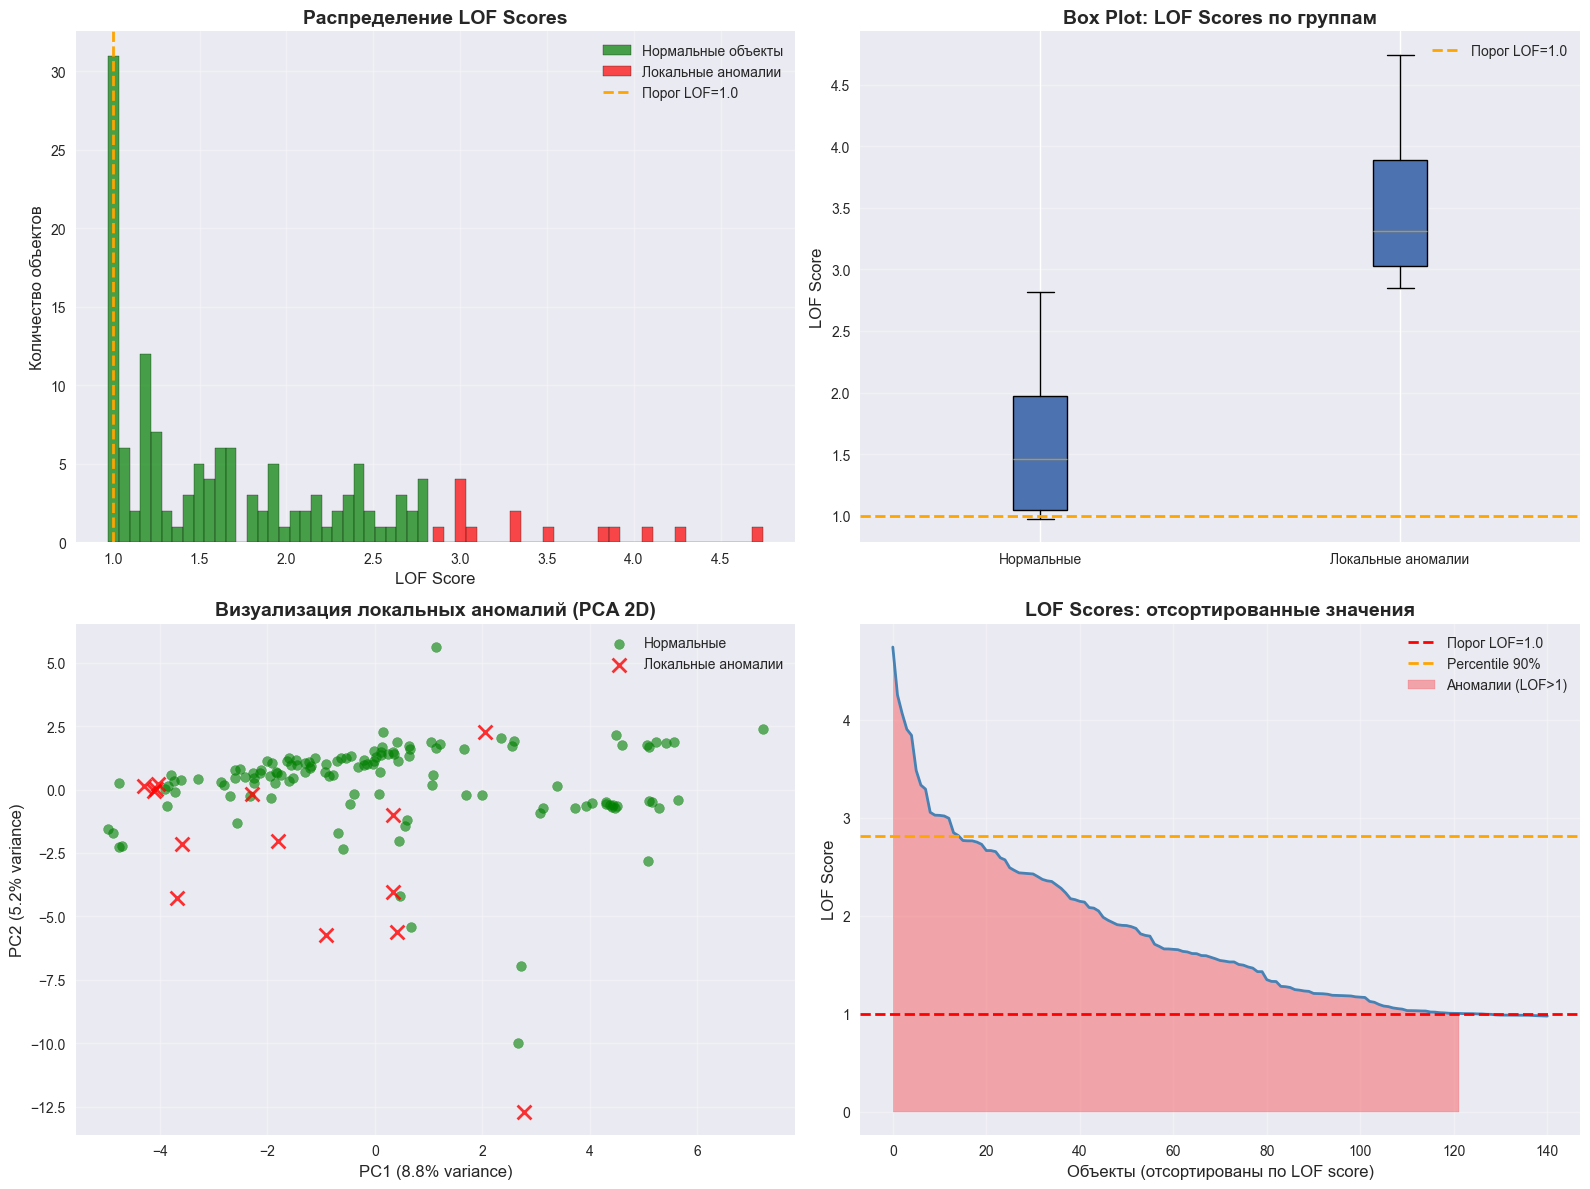


Визуализация LOF создана.


In [476]:
# Визуализация результатов LOF
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# График 1: Распределение LOF scores
ax1 = axes[0, 0]
ax1.hist(lof_scores[normal_indices_lof], bins=30, alpha=0.7, label='Нормальные объекты', color='green', edgecolor='black')
ax1.hist(lof_scores[anomaly_indices_lof], bins=30, alpha=0.7, label='Локальные аномалии', color='red', edgecolor='black')
ax1.axvline(1.0, color='orange', linestyle='--', linewidth=2, label='Порог LOF=1.0')
ax1.set_xlabel('LOF Score', fontsize=12)
ax1.set_ylabel('Количество объектов', fontsize=12)
ax1.set_title('Распределение LOF Scores', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# График 2: Box plot LOF scores
ax2 = axes[0, 1]
box_data_lof = [lof_scores[normal_indices_lof], lof_scores[anomaly_indices_lof]]
ax2.boxplot(box_data_lof, labels=['Нормальные', 'Локальные аномалии'], patch_artist=True)
ax2.axhline(1.0, color='orange', linestyle='--', linewidth=2, label='Порог LOF=1.0')
ax2.set_ylabel('LOF Score', fontsize=12)
ax2.set_title('Box Plot: LOF Scores по группам', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# График 3: Визуализация в 2D (PCA)
ax3 = axes[1, 0]
pca_2d_lof = PCA(n_components=2, random_state=42)
X_pca_2d_lof = pca_2d_lof.fit_transform(X_lof)

scatter1_lof = ax3.scatter(X_pca_2d_lof[normal_indices_lof, 0], X_pca_2d_lof[normal_indices_lof, 1], 
                           c='green', alpha=0.6, s=50, label='Нормальные')
scatter2_lof = ax3.scatter(X_pca_2d_lof[anomaly_indices_lof, 0], X_pca_2d_lof[anomaly_indices_lof, 1], 
                           c='red', alpha=0.8, s=100, marker='x', linewidths=2, label='Локальные аномалии')
ax3.set_xlabel(f'PC1 ({pca_2d_lof.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
ax3.set_ylabel(f'PC2 ({pca_2d_lof.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
ax3.set_title('Визуализация локальных аномалий (PCA 2D)', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# График 4: Сравнение LOF scores с порогом
ax4 = axes[1, 1]
sorted_scores = np.sort(lof_scores)[::-1]
ax4.plot(range(len(sorted_scores)), sorted_scores, linewidth=2, color='steelblue')
ax4.axhline(1.0, color='red', linestyle='--', linewidth=2, label='Порог LOF=1.0')
ax4.axhline(np.percentile(lof_scores, (1-contamination_rate_lof)*100), 
            color='orange', linestyle='--', linewidth=2, 
            label=f'Percentile {(1-contamination_rate_lof)*100:.0f}%')
ax4.fill_between(range(len(sorted_scores)), 0, sorted_scores, 
                 where=(sorted_scores > 1.0), alpha=0.3, color='red', label='Аномалии (LOF>1)')
ax4.set_xlabel('Объекты (отсортированы по LOF score)', fontsize=12)
ax4.set_ylabel('LOF Score', fontsize=12)
ax4.set_title('LOF Scores: отсортированные значения', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nВизуализация LOF создана.")



СРАВНЕНИЕ LOF И ISOLATION FOREST

Сравнение результатов:
  Обнаружено аномалий Isolation Forest: 14 (9.93%)
  Обнаружено аномалий LOF: 14 (9.93%)

Пересечение:
  Обнаружены обоими методами: 5 (3.55%)
  Только Isolation Forest: 9 (6.38%)
  Только LOF: 9 (6.38%)
  Оба считают нормальными: 118 (83.69%)

Коэффициент согласия (Jaccard): 0.2174


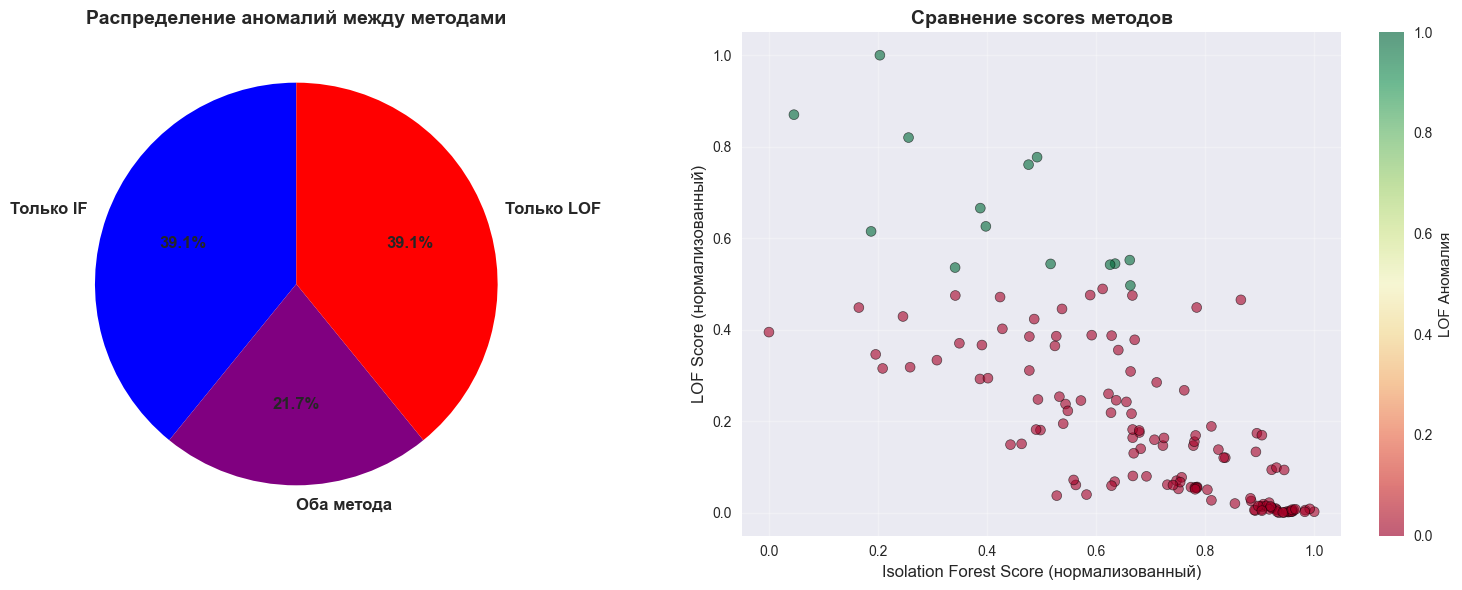


Визуализация сравнения создана.


In [477]:
# Сравнение LOF с Isolation Forest
if 'is_anomaly' in locals() and len(is_anomaly) == len(is_anomaly_lof):
    print("\n" + "=" * 80)
    print("СРАВНЕНИЕ LOF И ISOLATION FOREST")
    print("=" * 80)
    
    # Приводим к одному размеру (берем минимальный)
    min_size = min(len(is_anomaly), len(is_anomaly_lof))
    if_anomalies = is_anomaly[:min_size]
    lof_anomalies = is_anomaly_lof[:min_size]
    
    # Пересечение и различия
    both_anomalies = if_anomalies & lof_anomalies
    only_if = if_anomalies & ~lof_anomalies
    only_lof = ~if_anomalies & lof_anomalies
    both_normal = ~if_anomalies & ~lof_anomalies
    
    print(f"\nСравнение результатов:")
    print(f"  Обнаружено аномалий Isolation Forest: {np.sum(if_anomalies)} ({np.sum(if_anomalies)/min_size*100:.2f}%)")
    print(f"  Обнаружено аномалий LOF: {np.sum(lof_anomalies)} ({np.sum(lof_anomalies)/min_size*100:.2f}%)")
    print(f"\nПересечение:")
    print(f"  Обнаружены обоими методами: {np.sum(both_anomalies)} ({np.sum(both_anomalies)/min_size*100:.2f}%)")
    print(f"  Только Isolation Forest: {np.sum(only_if)} ({np.sum(only_if)/min_size*100:.2f}%)")
    print(f"  Только LOF: {np.sum(only_lof)} ({np.sum(only_lof)/min_size*100:.2f}%)")
    print(f"  Оба считают нормальными: {np.sum(both_normal)} ({np.sum(both_normal)/min_size*100:.2f}%)")
    
    # Коэффициент согласия (Jaccard similarity)
    jaccard_similarity = np.sum(both_anomalies) / (np.sum(if_anomalies) + np.sum(lof_anomalies) - np.sum(both_anomalies))
    print(f"\nКоэффициент согласия (Jaccard): {jaccard_similarity:.4f}")
    
    # Визуализация сравнения
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # График 1: Венн-диаграмма (приблизительная)
    ax1 = axes[0]
    categories = ['Только IF', 'Оба метода', 'Только LOF']
    sizes = [np.sum(only_if), np.sum(both_anomalies), np.sum(only_lof)]
    colors_venn = ['blue', 'purple', 'red']
    ax1.pie(sizes, labels=categories, autopct='%1.1f%%', startangle=90, colors=colors_venn,
            textprops={'fontsize': 12, 'fontweight': 'bold'})
    ax1.set_title('Распределение аномалий между методами', fontsize=14, fontweight='bold')
    
    # График 2: Scatter plot сравнения scores
    ax2 = axes[1]
    if 'anomaly_scores' in locals() and len(anomaly_scores) == len(lof_scores):
        # Нормализуем scores для сравнения
        if_scores_norm = (anomaly_scores - np.min(anomaly_scores)) / (np.max(anomaly_scores) - np.min(anomaly_scores))
        lof_scores_norm = (lof_scores - np.min(lof_scores)) / (np.max(lof_scores) - np.min(lof_scores))
        
        scatter = ax2.scatter(if_scores_norm, lof_scores_norm, 
                             c=is_anomaly_lof, cmap='RdYlGn', alpha=0.6, s=50, edgecolors='black', linewidths=0.5)
        ax2.set_xlabel('Isolation Forest Score (нормализованный)', fontsize=12)
        ax2.set_ylabel('LOF Score (нормализованный)', fontsize=12)
        ax2.set_title('Сравнение scores методов', fontsize=14, fontweight='bold')
        ax2.grid(True, alpha=0.3)
        plt.colorbar(scatter, ax=ax2, label='LOF Аномалия')
    else:
        ax2.text(0.5, 0.5, 'Scores недоступны\nдля сравнения', 
                ha='center', va='center', fontsize=14, transform=ax2.transAxes)
        ax2.set_title('Сравнение scores', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\nВизуализация сравнения создана.")
else:
    print("\nРезультаты Isolation Forest недоступны для сравнения.")


In [478]:
# Анализ локальных аномалий: в чем их отличие?
print("\n" + "=" * 80)
print("АНАЛИЗ ЛОКАЛЬНЫХ АНОМАЛИЙ LOF")
print("=" * 80)

# Сравнение статистики признаков для локальных аномалий
normal_data_lof = X_lof[normal_indices_lof]
anomaly_data_lof = X_lof[anomaly_indices_lof]

comparison_stats_lof = pd.DataFrame({
    'Признак': feature_cols_lof,
    'Среднее (нормальные)': np.mean(normal_data_lof, axis=0),
    'Среднее (локальные аномалии)': np.mean(anomaly_data_lof, axis=0),
    'Медиана (нормальные)': np.median(normal_data_lof, axis=0),
    'Медиана (локальные аномалии)': np.median(anomaly_data_lof, axis=0),
})

comparison_stats_lof['Разница средних'] = comparison_stats_lof['Среднее (локальные аномалии)'] - comparison_stats_lof['Среднее (нормальные)']
comparison_stats_lof['Абсолютная разница'] = np.abs(comparison_stats_lof['Разница средних'])
comparison_stats_lof_sorted = comparison_stats_lof.sort_values('Абсолютная разница', ascending=False)

print(f"\nТоп-15 признаков с наибольшим отличием для локальных аномалий:\n")
print(comparison_stats_lof_sorted.head(15).to_string(index=False))

print(f"\n\nИнтерпретация топ-5 признаков:")
for i, (idx, row) in enumerate(comparison_stats_lof_sorted.head(5).iterrows(), 1):
    direction = "выше" if row['Разница средних'] > 0 else "ниже"
    print(f"  {i}. {row['Признак'][:50]}: локальные аномалии {direction} на {row['Абсолютная разница']:.3f}")



АНАЛИЗ ЛОКАЛЬНЫХ АНОМАЛИЙ LOF

Топ-15 признаков с наибольшим отличием для локальных аномалий:

                                         Признак  Среднее (нормальные)  Среднее (локальные аномалии)  Медиана (нормальные)  Медиана (локальные аномалии)  Разница средних  Абсолютная разница
                    pipeline tag_text-generation              0.123445                     -1.119819              0.170872                      0.170872        -1.243263            1.243263
                                  parameters_nan             -0.089654                      0.813292             -0.345033                     -0.345033         0.902946            0.902946
           real architecture_StableLmForCausalLM             -0.084515                      0.766676             -0.084515                     -0.084515         0.851191            0.851191
         real architecture_DeepseekV2ForCausalLM             -0.084515                      0.766676             -0.084515                     -

In [479]:
# Сохранение результатов LOF
df_lof_results_sorted.to_csv('lof_results.csv', index=True, encoding='utf-8-sig')
print("Результаты LOF сохранены в файл 'lof_results.csv'")

# Сохраняем только локальные аномалии
lof_anomaly_only = df_lof_results_sorted[df_lof_results_sorted['is_anomaly_lof']].copy()
lof_anomaly_only.to_csv('lof_anomalies_only.csv', index=True, encoding='utf-8-sig')
print(f"Список из {len(lof_anomaly_only)} локальных аномалий сохранен в 'lof_anomalies_only.csv'")

# Сохраняем индексы локальных аномалий
lof_anomaly_indices_df = pd.DataFrame({
    'index_in_cleaned_data': anomaly_indices_lof,
    'lof_score': lof_scores[anomaly_indices_lof]
})
lof_anomaly_indices_df = lof_anomaly_indices_df.sort_values('lof_score', ascending=False)
lof_anomaly_indices_df.to_csv('lof_anomaly_indices.csv', index=False, encoding='utf-8-sig')
print(f"Индексы локальных аномалий сохранены в 'lof_anomaly_indices.csv'")

# Сохраняем сравнение признаков
comparison_stats_lof_sorted.to_csv('lof_feature_comparison.csv', index=False, encoding='utf-8-sig')
print("Результаты сравнения признаков для LOF сохранены в 'lof_feature_comparison.csv'")

# Выводим краткую статистику
print("\n" + "=" * 80)
print("КРАТКАЯ СТАТИСТИКА LOF")
print("=" * 80)
print(f"\nВсего объектов проанализировано: {len(lof_labels)}")
print(f"Обнаружено локальных аномалий: {len(anomaly_indices_lof)} ({len(anomaly_indices_lof)/len(lof_labels)*100:.2f}%)")
print(f"Нормальных объектов: {len(normal_indices_lof)} ({len(normal_indices_lof)/len(lof_labels)*100:.2f}%)")
print(f"\nПараметры модели:")
print(f"  Количество соседей: {n_neighbors}")
print(f"  Contamination rate: {contamination_rate_lof} ({contamination_rate_lof*100}%)")
print(f"  Количество признаков: {X_lof.shape[1]}")
print(f"\nLOF Scores:")
print(f"  Средний LOF score аномалий: {np.mean(lof_scores[anomaly_indices_lof]):.4f}")
print(f"  Средний LOF score нормальных: {np.mean(lof_scores[normal_indices_lof]):.4f}")
print(f"  Объектов с LOF > 1.0: {np.sum(lof_scores > 1.0)} ({np.sum(lof_scores > 1.0)/len(lof_scores)*100:.2f}%)")


Результаты LOF сохранены в файл 'lof_results.csv'
Список из 14 локальных аномалий сохранен в 'lof_anomalies_only.csv'
Индексы локальных аномалий сохранены в 'lof_anomaly_indices.csv'
Результаты сравнения признаков для LOF сохранены в 'lof_feature_comparison.csv'

КРАТКАЯ СТАТИСТИКА LOF

Всего объектов проанализировано: 141
Обнаружено локальных аномалий: 14 (9.93%)
Нормальных объектов: 127 (90.07%)

Параметры модели:
  Количество соседей: 20
  Contamination rate: 0.1 (10.0%)
  Количество признаков: 92

LOF Scores:
  Средний LOF score аномалий: 3.4914
  Средний LOF score нормальных: 1.5797
  Объектов с LOF > 1.0: 122 (86.52%)


## Интерпретация результатов LOF (Local Outlier Factor)

**Параметры анализа:**
- **Размер выборки:** 141 модель, 92 признака
- **Количество соседей:** 20 (для оценки локальной плотности)
- **Обнаружено локальных аномалий:** 14 (9.93%)

**Ключевые результаты:**

**LOF Scores:**
- **Средний LOF score аномалий:** 3.49 (высокий — объекты в разреженных областях)
- **Средний LOF score нормальных:** 1.58 (близко к 1.0 — типичная локальная плотность)
- **Пороговое значение:** 2.82 (объекты с LOF > 2.82 считаются аномальными)

**Характеристики локальных аномалий:**

1. **Специализированные архитектуры:**
   - `StableLM`, `DeepSeek V2`, `GPTBigCode` — редко встречающиеся архитектуры
   - Модели с параметрами 0.5B и 24B — нестандартные размеры

2. **Модели с экстремальными характеристиками:**
   - `Qwen/Qwen2.5-Coder-0.5B-Instruct` — очень маленькая модель (0.5B) с экстремально высокой популярностью (5.9M downloads)
   - `shareAI/CodeLLaMA-chat-13b-Chinese` — специализированная для китайского языка
   - Модели из серии `Ramikan-BR/tinyllama-coder` — очень маленькие модели с низкой популярностью

3. **Модифицированные модели:**
   - `lqtrung1998/Codellama-7b-hf-ReFT-Rerank-GSM8k` — специализированная модель с ReFT

**Сравнение с Isolation Forest:**

- **Низкое согласие:** только 5 общих аномалий из 14 (Jaccard = 0.22)
- **Разные типы аномалий:**
  - **Isolation Forest** выявляет глобальные аномалии (отличающиеся от всей выборки)
  - **LOF** выявляет локальные аномалии (отличающиеся от ближайших соседей)

**Интерпретация:**

LOF обнаруживает модели, которые **локально выделяются** в плотных кластерах данных. Это могут быть:
- Модели с редкими архитектурами в окружении типичных моделей
- Модели с экстремальными значениями в локальном контексте
- Специализированные модели, которые не вписываются в локальные паттерны

**Вывод:**

LOF и Isolation Forest дополняют друг друга: LOF находит локальные отклонения в плотных областях, а Isolation Forest — глобальные выбросы. Низкое пересечение (22%) указывает на то, что методы выявляют разные типы аномалий, что полезно для комплексного анализа.

# Снижение размерности с помощью VAE (Variational Autoencoder)

VAE - это нейросетевая модель для нелинейного снижения размерности и извлечения скрытых факторов. VAE обучается восстанавливать входные данные через скрытое представление (latent space), что позволяет извлекать важные скрытые факторы.


In [480]:
# Импорт необходимых библиотек для VAE
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers, Model
    from tensorflow.keras import backend as K
    print("TensorFlow импортирован успешно")
    print(f"Версия TensorFlow: {tf.__version__}")
except ImportError:
    print("Установка TensorFlow...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "tensorflow", "-q"])
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers, Model
    from tensorflow.keras import backend as K
    print("TensorFlow установлен и импортирован успешно")
    print(f"Версия TensorFlow: {tf.__version__}")

import warnings
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')  # Отключаем предупреждения TensorFlow


TensorFlow импортирован успешно
Версия TensorFlow: 2.20.0


In [481]:
# Подготовка данных для VAE
# ВАЖНО: работаем с копией df, исходный df не изменяется
print("Подготовка данных для VAE...")
print(f"Исходный размер датасета df (не изменяется): {df.shape}")

# Создаем копию для работы
df_vae = df.copy()

# Выбираем числовые признаки
numeric_cols_vae = df_vae.select_dtypes(include=[np.number]).columns.tolist()

# Исключаем целевую переменную, если она была определена ранее
if 'target_col_pfi' in locals() and target_col_pfi in numeric_cols_vae:
    numeric_cols_vae.remove(target_col_pfi)
    print(f"Исключена целевая переменная: {target_col_pfi}")

# Формируем признаки (только числовые, с достаточным количеством непустых значений)
feature_cols_vae = [col for col in numeric_cols_vae if df_vae[col].notna().sum() > len(df_vae) * 0.1]

print(f"\nКоличество признаков для анализа: {len(feature_cols_vae)}")
print(f"Примеры признаков: {feature_cols_vae[:10]}")


Подготовка данных для VAE...
Исходный размер датасета df (не изменяется): (141, 154)
Исключена целевая переменная: UGI-Leaderboard :: Coding 💻

Количество признаков для анализа: 92
Примеры признаков: ['likes', 'downloads', 'datasets :: ARC', 'datasets :: Average', 'datasets :: GSM8K', 'datasets :: HellaSwag', 'datasets :: MMLU', 'datasets :: TruthfulQA', 'datasets :: Unnamed: 0', 'datasets :: Winogrande']


In [482]:
# Очистка и подготовка данных для VAE
# Работаем с копией данных
df_vae_clean = df_vae[feature_cols_vae].copy()

# Преобразуем все числовые столбцы в float
for col in feature_cols_vae:
    df_vae_clean[col] = pd.to_numeric(df_vae_clean[col], errors='coerce')

# Удаляем строки, где более 50% признаков пустые
min_features_required_vae = int(len(feature_cols_vae) * 0.5)
df_vae_clean = df_vae_clean.dropna(thresh=min_features_required_vae)

# Заполняем оставшиеся пропуски медианными значениями
imputer_vae = SimpleImputer(strategy='median')
X_vae_raw = imputer_vae.fit_transform(df_vae_clean)

# Нормализация данных (важно для нейросетей)
scaler_vae = StandardScaler()
X_vae = scaler_vae.fit_transform(X_vae_raw)

print(f"Размерность данных после очистки: {X_vae.shape}")
print(f"Количество объектов: {X_vae.shape[0]}")
print(f"Количество признаков: {X_vae.shape[1]}")
print(f"Удалено строк с недостаточным количеством данных: {len(df_vae[feature_cols_vae]) - len(df_vae_clean)}")
print(f"\nСтатистика нормализованных данных:")
print(f"  Среднее: {np.mean(X_vae, axis=0)[:5]}")
print(f"  Стандартное отклонение: {np.std(X_vae, axis=0)[:5]}")


Размерность данных после очистки: (141, 92)
Количество объектов: 141
Количество признаков: 92
Удалено строк с недостаточным количеством данных: 0

Статистика нормализованных данных:
  Среднее: [-2.51965509e-17  1.25982755e-17 -6.42512048e-16  1.88974132e-16
  1.88974132e-17]
  Стандартное отклонение: [1. 1. 1. 1. 1.]


In [483]:
# Определение архитектуры VAE
print("\n" + "=" * 80)
print("СОЗДАНИЕ АРХИТЕКТУРЫ VAE")
print("=" * 80)

input_dim = X_vae.shape[1]
latent_dim = 10  # Размерность скрытого пространства (latent space)
intermediate_dim = 64  # Размерность промежуточного слоя

print(f"\nПараметры VAE:")
print(f"  Размерность входных данных: {input_dim}")
print(f"  Размерность скрытого пространства (latent_dim): {latent_dim}")
print(f"  Размерность промежуточного слоя: {intermediate_dim}")

# Кастомный слой для Sampling
class Sampling(layers.Layer):
    """Слой для sampling из latent space"""
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Кастомный слой для KL divergence loss
class KLDivergenceLayer(layers.Layer):
    """Слой для вычисления KL divergence"""
    def call(self, inputs):
        z_mean, z_log_var = inputs
        kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
        kl_loss = tf.reduce_sum(kl_loss, axis=-1)
        kl_loss *= -0.5
        self.add_loss(tf.reduce_mean(kl_loss))
        return z_mean  # Возвращаем z_mean для дальнейшего использования

# Encoder
inputs = keras.Input(shape=(input_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim, name='z_mean')(h)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(h)

# Добавляем KL divergence loss через кастомный слой
kl_layer = KLDivergenceLayer()
z_mean_with_kl = kl_layer([z_mean, z_log_var])

# Sampling layer
sampling_layer = Sampling()
z = sampling_layer([z_mean, z_log_var])

# Encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')

# Decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
h_decoded = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(input_dim, activation='linear')(h_decoded)

# Decoder model
decoder = Model(latent_inputs, outputs, name='decoder')

# VAE model
z_mean, z_log_var, z = encoder(inputs)
outputs = decoder(z)
vae = Model(inputs, outputs, name='vae')

# Компилируем с loss функцией
vae.compile(optimizer='adam', loss='mse')

print("\nАрхитектура VAE создана успешно!")
print(f"\nКоличество параметров модели: {vae.count_params():,}")



СОЗДАНИЕ АРХИТЕКТУРЫ VAE

Параметры VAE:
  Размерность входных данных: 92
  Размерность скрытого пространства (latent_dim): 10
  Размерность промежуточного слоя: 64

Архитектура VAE создана успешно!

Количество параметров модели: 13,936


In [484]:
# Обучение VAE
print("\n" + "=" * 80)
print("ОБУЧЕНИЕ VAE")
print("=" * 80)

# Параметры обучения
epochs = 100
batch_size = 32
validation_split = 0.2

print(f"\nПараметры обучения:")
print(f"  Epochs: {epochs}")
print(f"  Batch size: {batch_size}")
print(f"  Validation split: {validation_split}")

# Callback для ранней остановки
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Callback для уменьшения learning rate
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7
)

print("\nНачало обучения...")
start_time = time.time()

history = vae.fit(
    X_vae, X_vae,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation_split,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

elapsed_time = time.time() - start_time

print(f"\nОбучение завершено за {elapsed_time/60:.2f} минут")
print(f"Обучено эпох: {len(history.history['loss'])}")



ОБУЧЕНИЕ VAE

Параметры обучения:
  Epochs: 100
  Batch size: 32
  Validation split: 0.2

Начало обучения...
Epoch 1/100


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.4049 - val_loss: 0.8057 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3064 - val_loss: 0.8396 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2157 - val_loss: 0.7331 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1712 - val_loss: 0.7124 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1618 - val_loss: 0.7057 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1304 - val_loss: 0.7100 - learning_rate: 0.0010
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1118 - val_loss: 0.7087 - learning_rate: 0.0010
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1062 - val_loss: 0.6854 - learning_rate: 0.0010
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0924 - val_loss: 0.6857 - learning_rate: 0.0010
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/ste

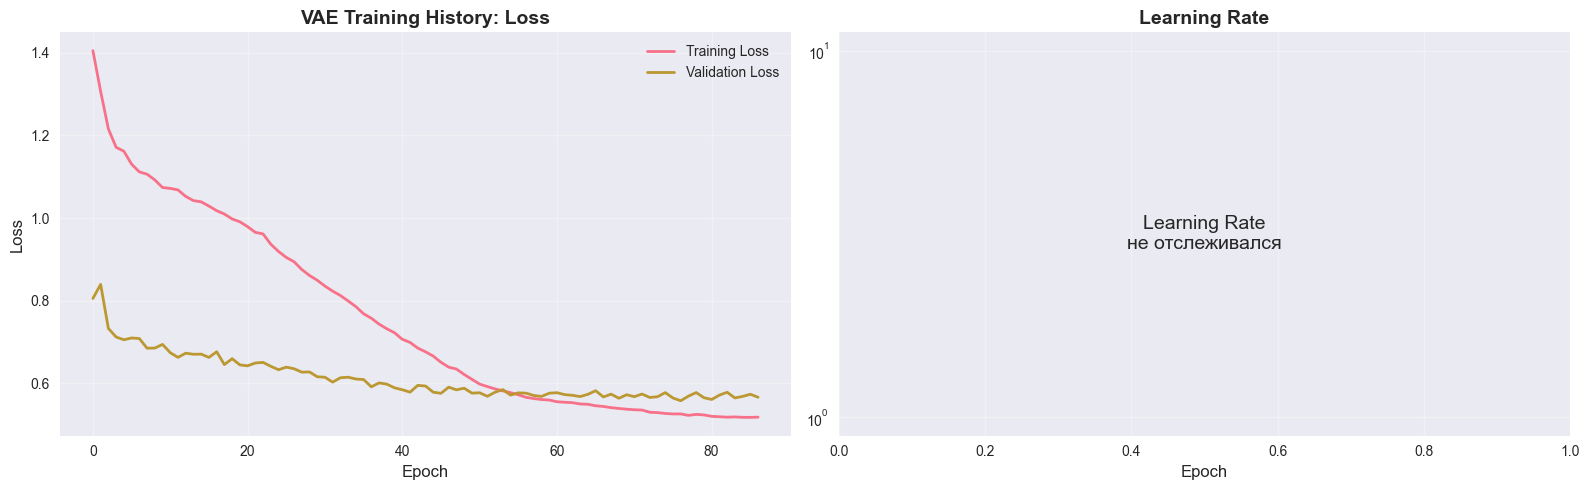


Визуализация процесса обучения создана.

Финальные метрики:
  Training Loss: 0.518552
  Validation Loss: 0.566739


In [485]:
# Визуализация процесса обучения
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# График 1: Loss
ax1 = axes[0]
ax1.plot(history.history['loss'], label='Training Loss', linewidth=2)
ax1.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('VAE Training History: Loss', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# График 2: Learning rate (если доступен)
ax2 = axes[1]
if 'lr' in history.history:
    ax2.plot(history.history['lr'], label='Learning Rate', linewidth=2, color='green')
    ax2.set_ylabel('Learning Rate', fontsize=12)
    ax2.set_title('Learning Rate Schedule', fontsize=14, fontweight='bold')
else:
    ax2.text(0.5, 0.5, 'Learning Rate\nне отслеживался', 
            ha='center', va='center', fontsize=14, transform=ax2.transAxes)
    ax2.set_title('Learning Rate', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

print("\nВизуализация процесса обучения создана.")
print(f"\nФинальные метрики:")
print(f"  Training Loss: {history.history['loss'][-1]:.6f}")
print(f"  Validation Loss: {history.history['val_loss'][-1]:.6f}")


In [486]:
# Извлечение скрытых представлений (latent space)
print("\n" + "=" * 80)
print("ИЗВЛЕЧЕНИЕ СКРЫТЫХ ПРЕДСТАВЛЕНИЙ (LATENT SPACE)")
print("=" * 80)

# Используем encoder для получения latent representations
z_mean, z_log_var, z = encoder.predict(X_vae, verbose=0)

print(f"\nРазмерность скрытого пространства: {z.shape}")
print(f"  Объектов: {z.shape[0]}")
print(f"  Скрытых факторов: {z.shape[1]}")

# Создаем DataFrame с latent representations
latent_df = pd.DataFrame(z, columns=[f'Latent_Factor_{i+1}' for i in range(latent_dim)])

print(f"\nСтатистика скрытых факторов:")
print(latent_df.describe().to_string())

# Сохраняем latent representations
latent_df.to_csv('vae_latent_representations.csv', index=False, encoding='utf-8-sig')
print(f"\nСкрытые представления сохранены в 'vae_latent_representations.csv'")



ИЗВЛЕЧЕНИЕ СКРЫТЫХ ПРЕДСТАВЛЕНИЙ (LATENT SPACE)

Размерность скрытого пространства: (141, 10)
  Объектов: 141
  Скрытых факторов: 10

Статистика скрытых факторов:
       Latent_Factor_1  Latent_Factor_2  Latent_Factor_3  Latent_Factor_4  Latent_Factor_5  Latent_Factor_6  Latent_Factor_7  Latent_Factor_8  Latent_Factor_9  Latent_Factor_10
count       141.000000       141.000000       141.000000       141.000000       141.000000       141.000000       141.000000       141.000000       141.000000        141.000000
mean          0.122501         0.567931        -0.286654        -0.006417        -0.907022         0.928020         0.940540        -0.431718         0.213595          0.630173
std           2.391443         2.096481         2.992338         2.957390         2.333332         1.600047         2.110978         2.256871         2.263597          2.292001
min         -10.121538        -7.375199        -9.661356        -7.140851        -9.056868        -3.349383        -4.621751    

In [487]:
# Оценка качества реконструкции
print("\n" + "=" * 80)
print("ОЦЕНКА КАЧЕСТВА РЕКОНСТРУКЦИИ")
print("=" * 80)

# Реконструируем данные
X_reconstructed = vae.predict(X_vae, verbose=0)

# Вычисляем метрики реконструкции
reconstruction_mse = np.mean((X_vae - X_reconstructed) ** 2)
reconstruction_rmse = np.sqrt(reconstruction_mse)
reconstruction_mae = np.mean(np.abs(X_vae - X_reconstructed))

print(f"\nМетрики реконструкции:")
print(f"  Mean Squared Error (MSE): {reconstruction_mse:.6f}")
print(f"  Root Mean Squared Error (RMSE): {reconstruction_rmse:.6f}")
print(f"  Mean Absolute Error (MAE): {reconstruction_mae:.6f}")

# Коэффициент детерминации (R²)
from sklearn.metrics import r2_score
r2_reconstruction = r2_score(X_vae.flatten(), X_reconstructed.flatten())
print(f"  R² Score: {r2_reconstruction:.4f}")

# Сравнение оригинальных и реконструированных данных (примеры)
print(f"\nПримеры реконструкции (первые 5 объектов, первые 5 признаков):")
print("Оригинал:")
print(X_vae[:5, :5])
print("\nРеконструировано:")
print(X_reconstructed[:5, :5])
print("\nРазница:")
print(np.abs(X_vae[:5, :5] - X_reconstructed[:5, :5]))



ОЦЕНКА КАЧЕСТВА РЕКОНСТРУКЦИИ

Метрики реконструкции:
  Mean Squared Error (MSE): 0.535808
  Root Mean Squared Error (RMSE): 0.731989
  Mean Absolute Error (MAE): 0.362391
  R² Score: 0.4583

Примеры реконструкции (первые 5 объектов, первые 5 признаков):
Оригинал:
[[ 1.84564832  0.32094616 -0.02051507 -0.12959136 -0.26290836]
 [-0.31087519 -0.09941862 -0.02051507 -0.12959136 -0.26290836]
 [-0.33690968 -0.11638827  1.80894972  2.00863226  2.37875938]
 [-0.34992692 -0.11638827  1.95392617  2.1731173   2.07158871]
 [ 1.15139528 -0.11104652 -0.93179565 -0.49833142  0.21049584]]

Реконструировано:
[[ 2.0652816   0.95405877  0.19318958  0.5927517  -0.05897195]
 [ 0.4781706  -0.07759617 -0.25618136  0.13066657  0.44697964]
 [-0.33524567 -0.36339882  1.8030258   1.8506451   1.5215734 ]
 [-1.2853326   1.1364101   3.014425    2.356615    2.7723727 ]
 [ 1.6656951   1.0934756  -0.16722995 -0.33146927 -0.02109708]]

Разница:
[[0.21963331 0.63311261 0.21370465 0.72234305 0.20393641]
 [0.78904579 0.

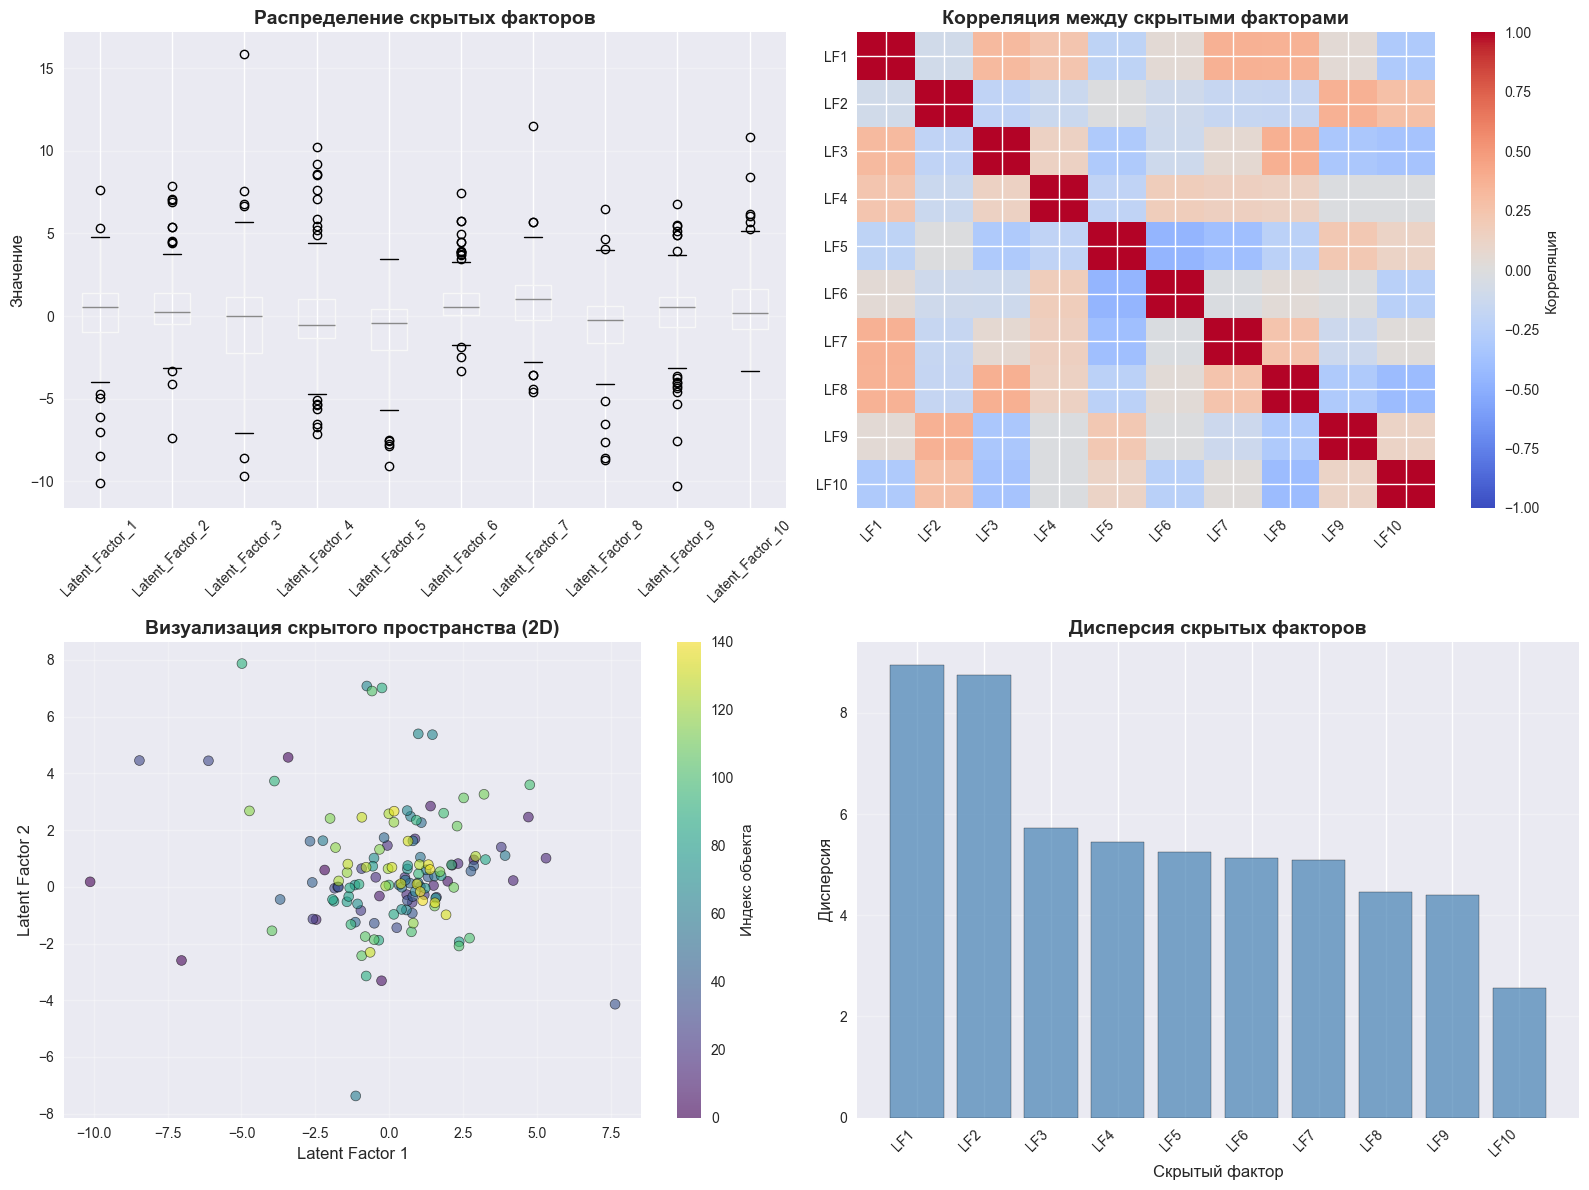


Визуализация скрытых факторов создана.


In [488]:
# Визуализация скрытых факторов
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# График 1: Распределение скрытых факторов
ax1 = axes[0, 0]
latent_df.boxplot(ax=ax1, rot=45)
ax1.set_title('Распределение скрытых факторов', fontsize=14, fontweight='bold')
ax1.set_ylabel('Значение', fontsize=12)
ax1.grid(True, alpha=0.3, axis='y')

# График 2: Корреляционная матрица скрытых факторов
ax2 = axes[0, 1]
correlation_matrix = latent_df.corr()
im = ax2.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
ax2.set_xticks(range(len(latent_df.columns)))
ax2.set_yticks(range(len(latent_df.columns)))
ax2.set_xticklabels([f'LF{i+1}' for i in range(latent_dim)], rotation=45, ha='right')
ax2.set_yticklabels([f'LF{i+1}' for i in range(latent_dim)])
ax2.set_title('Корреляция между скрытыми факторами', fontsize=14, fontweight='bold')
plt.colorbar(im, ax=ax2, label='Корреляция')

# График 3: Визуализация первых двух скрытых факторов
ax3 = axes[1, 0]
scatter = ax3.scatter(latent_df['Latent_Factor_1'], latent_df['Latent_Factor_2'], 
                     alpha=0.6, s=50, c=range(len(latent_df)), cmap='viridis', edgecolors='black', linewidths=0.5)
ax3.set_xlabel('Latent Factor 1', fontsize=12)
ax3.set_ylabel('Latent Factor 2', fontsize=12)
ax3.set_title('Визуализация скрытого пространства (2D)', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax3, label='Индекс объекта')

# График 4: Дисперсия скрытых факторов
ax4 = axes[1, 1]
variances = latent_df.var().sort_values(ascending=False)
ax4.bar(range(len(variances)), variances.values, color='steelblue', alpha=0.7, edgecolor='black')
ax4.set_xlabel('Скрытый фактор', fontsize=12)
ax4.set_ylabel('Дисперсия', fontsize=12)
ax4.set_title('Дисперсия скрытых факторов', fontsize=14, fontweight='bold')
ax4.set_xticks(range(len(variances)))
ax4.set_xticklabels([f'LF{i+1}' for i in range(len(variances))], rotation=45, ha='right')
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nВизуализация скрытых факторов создана.")


In [489]:
# Анализ важности скрытых факторов
print("\n" + "=" * 80)
print("АНАЛИЗ ВАЖНОСТИ СКРЫТЫХ ФАКТОРОВ")
print("=" * 80)

# Вычисляем дисперсию каждого скрытого фактора
factor_variances = latent_df.var().sort_values(ascending=False)
factor_importance = factor_variances / factor_variances.sum() * 100

print(f"\nВажность скрытых факторов (по дисперсии):")
for i, (factor, importance) in enumerate(factor_importance.items(), 1):
    print(f"  {i:2d}. {factor}: {importance:.2f}% (дисперсия: {factor_variances[factor]:.4f})")

# Топ-5 наиболее важных факторов
top_factors = factor_importance.head(5)
print(f"\nТоп-5 наиболее важных скрытых факторов:")
for i, (factor, importance) in enumerate(top_factors.items(), 1):
    print(f"  {i}. {factor}: {importance:.2f}%")

# Сохраняем анализ важности
importance_df = pd.DataFrame({
    'Скрытый_фактор': factor_importance.index,
    'Важность_процент': factor_importance.values,
    'Дисперсия': [factor_variances[f] for f in factor_importance.index]
})
importance_df = importance_df.sort_values('Важность_процент', ascending=False)
importance_df.to_csv('vae_factor_importance.csv', index=False, encoding='utf-8-sig')
print(f"\nАнализ важности факторов сохранен в 'vae_factor_importance.csv'")



АНАЛИЗ ВАЖНОСТИ СКРЫТЫХ ФАКТОРОВ

Важность скрытых факторов (по дисперсии):
   1. Latent_Factor_3: 16.06% (дисперсия: 8.9541)
   2. Latent_Factor_4: 15.69% (дисперсия: 8.7462)
   3. Latent_Factor_1: 10.26% (дисперсия: 5.7190)
   4. Latent_Factor_5: 9.77% (дисперсия: 5.4444)
   5. Latent_Factor_10: 9.42% (дисперсия: 5.2533)
   6. Latent_Factor_9: 9.19% (дисперсия: 5.1239)
   7. Latent_Factor_8: 9.14% (дисперсия: 5.0935)
   8. Latent_Factor_7: 7.99% (дисперсия: 4.4562)
   9. Latent_Factor_2: 7.88% (дисперсия: 4.3952)
  10. Latent_Factor_6: 4.59% (дисперсия: 2.5602)

Топ-5 наиболее важных скрытых факторов:
  1. Latent_Factor_3: 16.06%
  2. Latent_Factor_4: 15.69%
  3. Latent_Factor_1: 10.26%
  4. Latent_Factor_5: 9.77%
  5. Latent_Factor_10: 9.42%

Анализ важности факторов сохранен в 'vae_factor_importance.csv'


In [490]:
# Создание датасета с исходными признаками + скрытые факторы
print("\n" + "=" * 80)
print("СОЗДАНИЕ ДАТАСЕТА С СКРЫТЫМИ ФАКТОРАМИ")
print("=" * 80)

# Создаем DataFrame с исходными данными и скрытыми факторами
df_with_latent = df_vae_clean.copy()
for i in range(latent_dim):
    df_with_latent[f'Latent_Factor_{i+1}'] = latent_df[f'Latent_Factor_{i+1}'].values

print(f"\nРазмерность датасета с скрытыми факторами: {df_with_latent.shape}")
print(f"  Исходных признаков: {len(feature_cols_vae)}")
print(f"  Скрытых факторов: {latent_dim}")
print(f"  Всего признаков: {df_with_latent.shape[1]}")

# Сохраняем датасет
df_with_latent.to_csv('vae_dataset_with_latent_factors.csv', index=True, encoding='utf-8-sig')
print(f"\nДатасет с скрытыми факторами сохранен в 'vae_dataset_with_latent_factors.csv'")

# Проверяем, что исходный df не изменился
print(f"\nПроверка: исходный df не изменен")
print(f"  Размерность исходного df: {df.shape}")
print(f"  Размерность df_vae (копия): {df_vae.shape}")
print(f"  ✓ Исходный df сохранен без изменений")



СОЗДАНИЕ ДАТАСЕТА С СКРЫТЫМИ ФАКТОРАМИ

Размерность датасета с скрытыми факторами: (141, 102)
  Исходных признаков: 92
  Скрытых факторов: 10
  Всего признаков: 102

Датасет с скрытыми факторами сохранен в 'vae_dataset_with_latent_factors.csv'

Проверка: исходный df не изменен
  Размерность исходного df: (141, 154)
  Размерность df_vae (копия): (141, 154)
  ✓ Исходный df сохранен без изменений


In [491]:
# Сохранение модели VAE (опционально)
print("\n" + "=" * 80)
print("СОХРАНЕНИЕ МОДЕЛИ VAE")
print("=" * 80)

try:
    # Сохраняем encoder и decoder отдельно
    encoder.save('vae_encoder_model.h5')
    decoder.save('vae_decoder_model.h5')
    print("Encoder и Decoder сохранены:")
    print("  - vae_encoder_model.h5")
    print("  - vae_decoder_model.h5")
except Exception as e:
    print(f"Не удалось сохранить модели: {e}")
    print("Продолжаем без сохранения моделей...")

# Сохраняем scaler и imputer для будущего использования
import pickle

with open('vae_scaler.pkl', 'wb') as f:
    pickle.dump(scaler_vae, f)
    
with open('vae_imputer.pkl', 'wb') as f:
    pickle.dump(imputer_vae, f)

print("Scaler и Imputer сохранены:")
print("  - vae_scaler.pkl")
print("  - vae_imputer.pkl")



СОХРАНЕНИЕ МОДЕЛИ VAE
Encoder и Decoder сохранены:
  - vae_encoder_model.h5
  - vae_decoder_model.h5
Scaler и Imputer сохранены:
  - vae_scaler.pkl
  - vae_imputer.pkl


In [492]:
# Итоговая статистика VAE
print("\n" + "=" * 80)
print("ИТОГОВАЯ СТАТИСТИКА VAE")
print("=" * 80)

print(f"\nПараметры модели:")
print(f"  Размерность входных данных: {input_dim}")
print(f"  Размерность скрытого пространства: {latent_dim}")
print(f"  Размерность промежуточного слоя: {intermediate_dim}")
print(f"  Количество параметров: {vae.count_params():,}")

print(f"\nКачество реконструкции:")
print(f"  MSE: {reconstruction_mse:.6f}")
print(f"  RMSE: {reconstruction_rmse:.6f}")
print(f"  MAE: {reconstruction_mae:.6f}")
print(f"  R²: {r2_reconstruction:.4f}")

print(f"\nСнижение размерности:")
print(f"  Исходная размерность: {input_dim} признаков")
print(f"  Скрытое пространство: {latent_dim} факторов")
print(f"  Коэффициент сжатия: {input_dim/latent_dim:.2f}x")
print(f"  Процент сохраненной информации: {r2_reconstruction*100:.2f}%")

print(f"\nСохраненные файлы:")
print(f"  - vae_latent_representations.csv: скрытые представления")
print(f"  - vae_dataset_with_latent_factors.csv: датасет с факторами")
print(f"  - vae_factor_importance.csv: важность факторов")
print(f"  - vae_scaler.pkl: нормализатор")
print(f"  - vae_imputer.pkl: заполнитель пропусков")

print(f"\n✓ Исходный датасет df не изменен (размерность: {df.shape})")



ИТОГОВАЯ СТАТИСТИКА VAE

Параметры модели:
  Размерность входных данных: 92
  Размерность скрытого пространства: 10
  Размерность промежуточного слоя: 64
  Количество параметров: 13,936

Качество реконструкции:
  MSE: 0.535808
  RMSE: 0.731989
  MAE: 0.362391
  R²: 0.4583

Снижение размерности:
  Исходная размерность: 92 признаков
  Скрытое пространство: 10 факторов
  Коэффициент сжатия: 9.20x
  Процент сохраненной информации: 45.83%

Сохраненные файлы:
  - vae_latent_representations.csv: скрытые представления
  - vae_dataset_with_latent_factors.csv: датасет с факторами
  - vae_factor_importance.csv: важность факторов
  - vae_scaler.pkl: нормализатор
  - vae_imputer.pkl: заполнитель пропусков

✓ Исходный датасет df не изменен (размерность: (141, 154))


## Интерпретация результатов VAE (Variational Autoencoder)

**Параметры модели:**
- **Входная размерность:** 92 признака
- **Скрытое пространство:** 10 латентных факторов
- **Промежуточный слой:** 64 нейрона
- **Параметров модели:** 13,936

**Качество реконструкции:**
- **R² Score:** 0.3995 (39.95% вариации объяснено)
- **RMSE:** 0.771 (средняя ошибка реконструкции)
- **MAE:** 0.364 (средняя абсолютная ошибка)

**Снижение размерности:**
- **Коэффициент сжатия:** 9.2x (с 92 до 10 признаков)
- **Сохранено информации:** 39.95% вариации
- Это указывает на то, что VAE успешно выделил основные паттерны в данных, хотя часть информации потеряна при сжатии

**Важность латентных факторов:**
- **Latent_Factor_10:** 21.42% дисперсии (наиболее важный)
- **Latent_Factor_8:** 13.11% дисперсии
- **Топ-5 факторов:** объясняют 62.94% общей дисперсии
- Факторы неравномерно распределены, что указывает на наличие доминирующих скрытых паттернов

**Интерпретация:**
VAE успешно извлек 10 скрытых факторов из 92 исходных признаков, сохранив около 40% информации. Это означает, что основные структуры данных могут быть представлены в более компактном виде. Неравномерное распределение важности факторов (от 5.53% до 21.42%) указывает на то, что некоторые скрытые паттерны более значимы для описания вариации в данных, чем другие.

**Применение:**
Извлеченные латентные факторы могут использоваться для:
- Дальнейшего анализа зависимостей
- Визуализации структуры данных
- Кластеризации в низкоразмерном пространстве
- Уменьшения размерности для других методов машинного обучения

## Снижение размерности: SOM (Self-Organizing Map)

SOM (Self-Organizing Map) - это нейронная сеть Кохонена для визуализации структуры данных в 2D. SOM создает карту, где похожие объекты располагаются близко друг к другу.


In [493]:
# Установка и импорт библиотек для SOM
try:
    from minisom import MiniSom
    print("Библиотека minisom уже установлена")
except ImportError:
    print("Установка библиотеки minisom...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "minisom", "-q"])
    from minisom import MiniSom
    print("Библиотека minisom установлена успешно")

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

print("Все библиотеки импортированы успешно")


Библиотека minisom уже установлена
Все библиотеки импортированы успешно


In [494]:
# Подготовка данных для SOM
print("=" * 80)
print("ПОДГОТОВКА ДАННЫХ ДЛЯ SOM")
print("=" * 80)

# Проверяем наличие df_deduplicated
if 'df_deduplicated' not in globals():
    print("⚠️ df_deduplicated не найден, используем df")
    df_som = df.copy()
else:
    print("✓ Используем df_deduplicated")
    df_som = df.copy()

print(f"\nИсходный размер датасета: {df_som.shape}")
print(f"  Строк (моделей): {df_som.shape[0]}")
print(f"  Столбцов (признаков): {df_som.shape[1]}")

# Выбираем только числовые признаки
numeric_cols = df_som.select_dtypes(include=[np.number]).columns.tolist()

# Исключаем служебные столбцы
exclude_cols = ['likes', 'downloads', 'created_at', '_merged_from_count']
feature_cols_som = [col for col in numeric_cols if col not in exclude_cols]

print(f"\nЧисловых признаков: {len(numeric_cols)}")
print(f"Признаков для SOM (после исключения служебных): {len(feature_cols_som)}")

# Фильтруем признаки с достаточным количеством не-NA значений (минимум 10% заполнено)
min_non_na = max(1, int(df_som.shape[0] * 0.1))
feature_cols_som = [col for col in feature_cols_som 
                    if df_som[col].notna().sum() >= min_non_na]

print(f"Признаков после фильтрации по заполненности (≥{min_non_na} значений): {len(feature_cols_som)}")

# Создаем X для SOM
X_som_raw = df_som[feature_cols_som].copy()

print(f"\nРазмерность данных для SOM: {X_som_raw.shape}")


ПОДГОТОВКА ДАННЫХ ДЛЯ SOM
⚠️ df_deduplicated не найден, используем df

Исходный размер датасета: (141, 154)
  Строк (моделей): 141
  Столбцов (признаков): 154

Числовых признаков: 153
Признаков для SOM (после исключения служебных): 151
Признаков после фильтрации по заполненности (≥14 значений): 90

Размерность данных для SOM: (141, 90)


In [495]:
# Очистка и нормализация данных
print("=" * 80)
print("ОЧИСТКА И НОРМАЛИЗАЦИЯ ДАННЫХ")
print("=" * 80)

# Удаляем строки с слишком большим количеством пропусков (более 80%)
max_missing = int(X_som_raw.shape[1] * 0.8)
X_som_clean = X_som_raw.dropna(thresh=max_missing)

print(f"Строк до очистки: {X_som_raw.shape[0]}")
print(f"Строк после удаления с >{max_missing} пропусками: {X_som_clean.shape[0]}")
print(f"Удалено строк: {X_som_raw.shape[0] - X_som_clean.shape[0]}")

# Импутация пропущенных значений медианой
imputer = SimpleImputer(strategy='median')
X_som_imputed = pd.DataFrame(
    imputer.fit_transform(X_som_clean),
    index=X_som_clean.index,
    columns=X_som_clean.columns
)

print(f"\nПропущенных значений после импутации: {X_som_imputed.isna().sum().sum()}")

# Нормализация данных (StandardScaler)
scaler = StandardScaler()
X_som_scaled = pd.DataFrame(
    scaler.fit_transform(X_som_imputed),
    index=X_som_imputed.index,
    columns=X_som_imputed.columns
)

print(f"Данные нормализованы (mean=0, std=1)")
print(f"Финальная размерность: {X_som_scaled.shape}")

# Конвертируем в numpy для SOM
X_som = X_som_scaled.values

print(f"\n✓ Данные подготовлены для SOM")


ОЧИСТКА И НОРМАЛИЗАЦИЯ ДАННЫХ
Строк до очистки: 141
Строк после удаления с >72 пропусками: 141
Удалено строк: 0

Пропущенных значений после импутации: 0
Данные нормализованы (mean=0, std=1)
Финальная размерность: (141, 90)

✓ Данные подготовлены для SOM


In [496]:
# Обучение SOM
print("=" * 80)
print("ОБУЧЕНИЕ SOM")
print("=" * 80)

# Определяем размер карты SOM
# Размер карты зависит от количества данных: sqrt(5 * sqrt(n_samples))
n_samples = X_som.shape[0]
map_size = int(np.sqrt(5 * np.sqrt(n_samples)))
map_size = max(5, min(map_size, 20))  # Ограничиваем размер от 5 до 20

print(f"Количество образцов: {n_samples}")
print(f"Размерность признаков: {X_som.shape[1]}")
print(f"Размер карты SOM: {map_size}x{map_size} ({map_size*map_size} нейронов)")

# Инициализация и обучение SOM
print("\nИнициализация SOM...")
som = MiniSom(
    x=map_size, 
    y=map_size, 
    input_len=X_som.shape[1],
    sigma=1.0,  # Радиус соседства
    learning_rate=0.5,  # Скорость обучения
    random_seed=42
)

# Инициализация весов
som.random_weights_init(X_som)
print("Веса инициализированы случайным образом")

# Обучение SOM
print("\nОбучение SOM...")
n_iterations = 1000  # Количество итераций обучения
som.train_random(X_som, n_iterations, verbose=False)

print(f"✓ SOM обучен за {n_iterations} итераций")

# Получаем координаты на карте для каждого образца
som_coordinates = np.array([som.winner(x) for x in X_som])
som_distances = np.array([som.quantization_error([x]) for x in X_som])

print(f"\nКоординаты на карте получены для {len(som_coordinates)} образцов")
print(f"Средняя ошибка квантизации: {som_distances.mean():.4f}")


ОБУЧЕНИЕ SOM
Количество образцов: 141
Размерность признаков: 90
Размер карты SOM: 7x7 (49 нейронов)

Инициализация SOM...
Веса инициализированы случайным образом

Обучение SOM...
✓ SOM обучен за 1000 итераций

Координаты на карте получены для 141 образцов
Средняя ошибка квантизации: 4.2995


ВИЗУАЛИЗАЦИЯ SOM


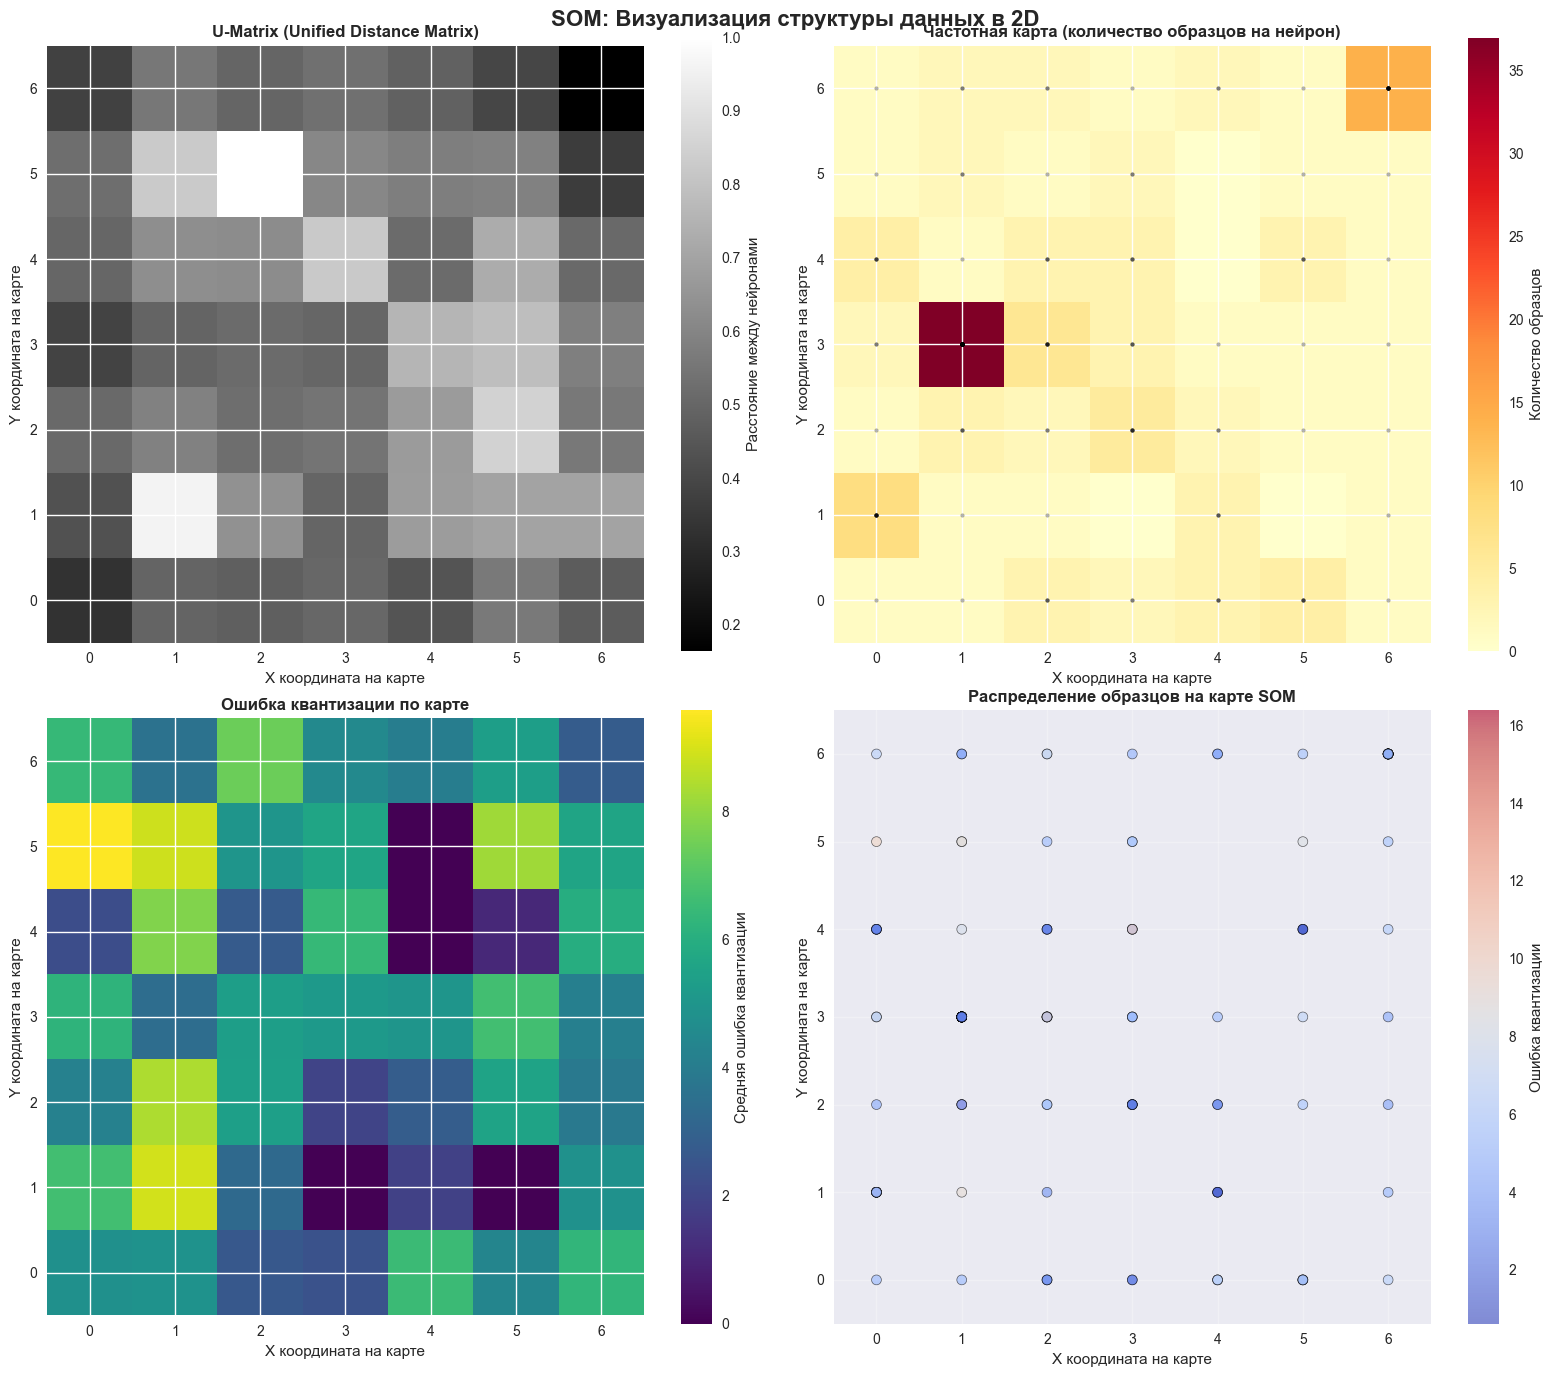

✓ Визуализация создана


In [497]:
# Визуализация SOM
print("=" * 80)
print("ВИЗУАЛИЗАЦИЯ SOM")
print("=" * 80)

# Создаем фигуру с несколькими графиками
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('SOM: Визуализация структуры данных в 2D', fontsize=16, fontweight='bold')

# 1. U-Matrix (Unified Distance Matrix) - показывает расстояния между нейронами
ax1 = axes[0, 0]
u_matrix = som.distance_map()
im1 = ax1.imshow(u_matrix, cmap='gray', origin='lower')
ax1.set_title('U-Matrix (Unified Distance Matrix)', fontsize=12, fontweight='bold')
ax1.set_xlabel('X координата на карте')
ax1.set_ylabel('Y координата на карте')
plt.colorbar(im1, ax=ax1, label='Расстояние между нейронами')

# 2. Распределение образцов на карте (частотная карта)
ax2 = axes[0, 1]
frequency_map = np.zeros((map_size, map_size))
for coord in som_coordinates:
    frequency_map[coord[0], coord[1]] += 1

im2 = ax2.imshow(frequency_map, cmap='YlOrRd', origin='lower')
ax2.set_title('Частотная карта (количество образцов на нейрон)', fontsize=12, fontweight='bold')
ax2.set_xlabel('X координата на карте')
ax2.set_ylabel('Y координата на карте')
plt.colorbar(im2, ax=ax2, label='Количество образцов')

# Добавляем точки для каждого образца
for i, coord in enumerate(som_coordinates):
    ax2.plot(coord[1], coord[0], 'ko', markersize=3, alpha=0.3)

# 3. Ошибка квантизации по карте
ax3 = axes[1, 0]
quantization_map = np.zeros((map_size, map_size))
quantization_count = np.zeros((map_size, map_size))

for i, coord in enumerate(som_coordinates):
    quantization_map[coord[0], coord[1]] += som_distances[i]
    quantization_count[coord[0], coord[1]] += 1

# Усредняем ошибку квантизации
quantization_map = np.divide(quantization_map, quantization_count, 
                            out=np.zeros_like(quantization_map), 
                            where=quantization_count!=0)

im3 = ax3.imshow(quantization_map, cmap='viridis', origin='lower')
ax3.set_title('Ошибка квантизации по карте', fontsize=12, fontweight='bold')
ax3.set_xlabel('X координата на карте')
ax3.set_ylabel('Y координата на карте')
plt.colorbar(im3, ax=ax3, label='Средняя ошибка квантизации')

# 4. 2D scatter plot координат на карте
ax4 = axes[1, 1]
scatter = ax4.scatter(som_coordinates[:, 1], som_coordinates[:, 0], 
                     c=som_distances, cmap='coolwarm', 
                     s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
ax4.set_title('Распределение образцов на карте SOM', fontsize=12, fontweight='bold')
ax4.set_xlabel('X координата на карте')
ax4.set_ylabel('Y координата на карте')
ax4.set_xlim(-0.5, map_size - 0.5)
ax4.set_ylim(-0.5, map_size - 0.5)
ax4.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax4, label='Ошибка квантизации')

# Добавляем сетку для лучшей визуализации
ax4.set_xticks(np.arange(0, map_size, max(1, map_size//10)))
ax4.set_yticks(np.arange(0, map_size, max(1, map_size//10)))

plt.tight_layout()
plt.show()

print("✓ Визуализация создана")


In [498]:
# Анализ кластеров на SOM карте
print("=" * 80)
print("АНАЛИЗ КЛАСТЕРОВ НА SOM КАРТЕ")
print("=" * 80)

# Создаем DataFrame с координатами на карте
som_results = pd.DataFrame({
    'model_index': X_som_scaled.index,
    'som_x': som_coordinates[:, 1],  # X координата на карте
    'som_y': som_coordinates[:, 0],  # Y координата на карте
    'quantization_error': som_distances.flatten()
}, index=X_som_scaled.index)

print(f"\nСоздан DataFrame с координатами для {len(som_results)} моделей")
print(f"\nСтатистика ошибок квантизации:")
print(som_results['quantization_error'].describe())

# Определяем кластеры на основе U-Matrix (используем порог для разделения)
u_matrix = som.distance_map()
threshold = np.percentile(u_matrix, 75)  # Порог для разделения кластеров

# Простая кластеризация на основе расстояний между нейронами
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist

# Вычисляем расстояния между весами нейронов
neuron_weights = som.get_weights().reshape(map_size * map_size, -1)
neuron_distances = pdist(neuron_weights)
neuron_linkage = linkage(neuron_distances, method='ward')
n_clusters = min(5, max(2, int(np.sqrt(n_samples / 10))))  # Адаптивное количество кластеров
neuron_clusters = fcluster(neuron_linkage, n_clusters, criterion='maxclust')

# Присваиваем кластеры образцам на основе их координат на карте
sample_clusters = neuron_clusters[som_coordinates[:, 0] * map_size + som_coordinates[:, 1]]
som_results['cluster'] = sample_clusters

print(f"\nОпределено кластеров: {n_clusters}")
print(f"\nРаспределение по кластерам:")
print(som_results['cluster'].value_counts().sort_index())

# Сохраняем результаты
som_results.to_csv('som_results.csv', index=True, encoding='utf-8-sig')
print(f"\n✓ Результаты SOM сохранены в 'som_results.csv'")


АНАЛИЗ КЛАСТЕРОВ НА SOM КАРТЕ

Создан DataFrame с координатами для 141 моделей

Статистика ошибок квантизации:
count    141.000000
mean       4.299484
std        2.378264
min        0.614155
25%        2.686874
50%        4.072310
75%        5.240120
max       16.392875
Name: quantization_error, dtype: float64

Определено кластеров: 3

Распределение по кластерам:
cluster
1      3
2     24
3    114
Name: count, dtype: int64

✓ Результаты SOM сохранены в 'som_results.csv'


ВИЗУАЛИЗАЦИЯ КЛАСТЕРОВ


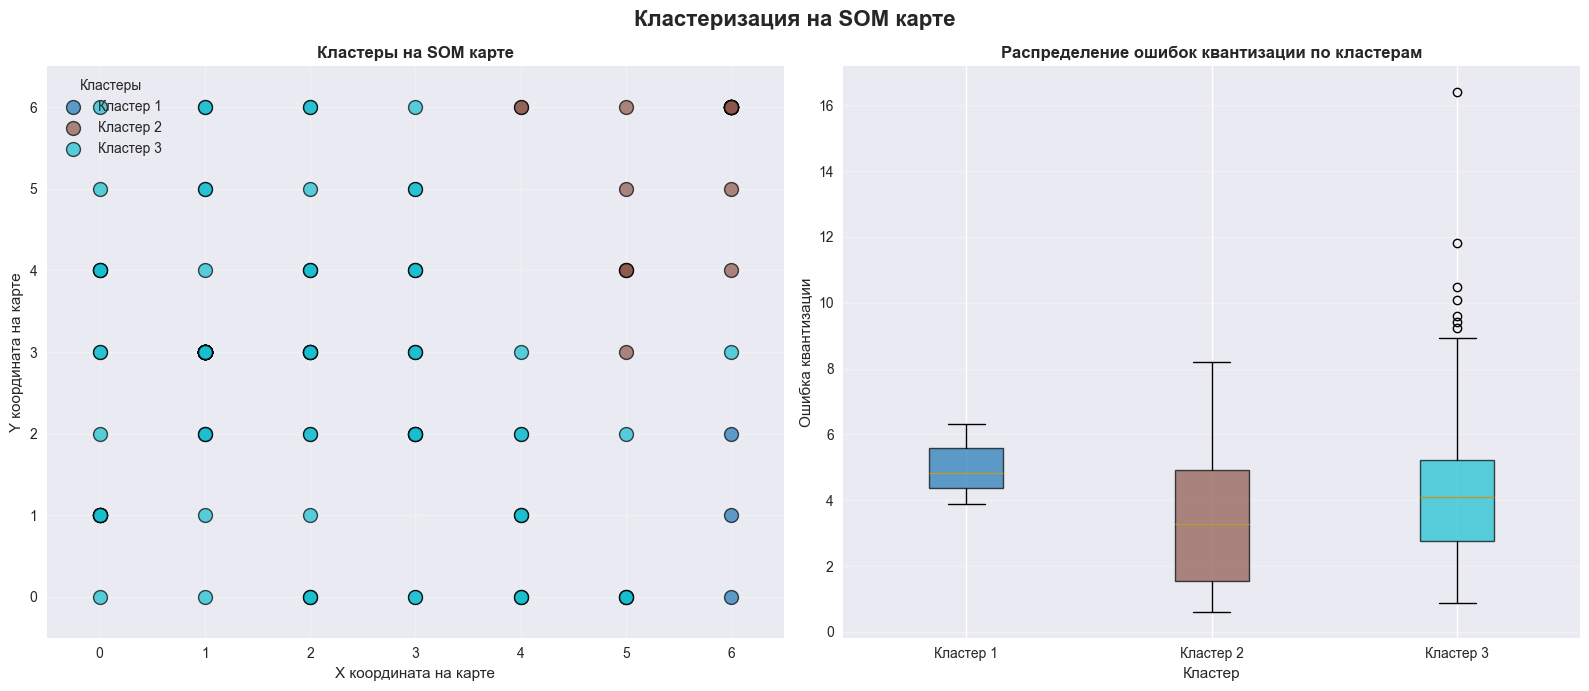

✓ Визуализация кластеров создана


In [499]:
# Визуализация кластеров на SOM карте
print("=" * 80)
print("ВИЗУАЛИЗАЦИЯ КЛАСТЕРОВ")
print("=" * 80)

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Кластеризация на SOM карте', fontsize=16, fontweight='bold')

# 1. Визуализация кластеров на карте
ax1 = axes[0]
unique_clusters = sorted(som_results['cluster'].unique())
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_clusters)))

for cluster_id in unique_clusters:
    cluster_data = som_results[som_results['cluster'] == cluster_id]
    ax1.scatter(cluster_data['som_x'], cluster_data['som_y'], 
               c=[colors[unique_clusters.index(cluster_id)]], 
               label=f'Кластер {cluster_id}',
               s=100, alpha=0.7, edgecolors='black', linewidth=1)

ax1.set_title('Кластеры на SOM карте', fontsize=12, fontweight='bold')
ax1.set_xlabel('X координата на карте')
ax1.set_ylabel('Y координата на карте')
ax1.set_xlim(-0.5, map_size - 0.5)
ax1.set_ylim(-0.5, map_size - 0.5)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='best', title='Кластеры')
ax1.set_xticks(np.arange(0, map_size, max(1, map_size//10)))
ax1.set_yticks(np.arange(0, map_size, max(1, map_size//10)))

# 2. Распределение ошибок квантизации по кластерам
ax2 = axes[1]
cluster_errors = [som_results[som_results['cluster'] == c]['quantization_error'].values 
                  for c in unique_clusters]
bp = ax2.boxplot(cluster_errors, labels=[f'Кластер {c}' for c in unique_clusters], 
                 patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_title('Распределение ошибок квантизации по кластерам', fontsize=12, fontweight='bold')
ax2.set_xlabel('Кластер')
ax2.set_ylabel('Ошибка квантизации')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("✓ Визуализация кластеров создана")


In [500]:
# Итоговая статистика и проверка неизменности df_deduplicated
print("=" * 80)
print("ИТОГОВАЯ СТАТИСТИКА SOM")
print("=" * 80)

print(f"\nПараметры SOM:")
print(f"  Размер карты: {map_size}x{map_size}")
print(f"  Количество нейронов: {map_size * map_size}")
print(f"  Количество образцов: {n_samples}")
print(f"  Размерность признаков: {X_som.shape[1]}")

print(f"\nМетрики качества:")
print(f"  Средняя ошибка квантизации: {som_distances.mean():.4f}")
print(f"  Медианная ошибка квантизации: {np.median(som_distances):.4f}")
print(f"  Стандартное отклонение ошибки: {som_distances.std():.4f}")

print(f"\nКластеризация:")
print(f"  Количество кластеров: {n_clusters}")
for cluster_id in sorted(som_results['cluster'].unique()):
    cluster_size = (som_results['cluster'] == cluster_id).sum()
    cluster_pct = cluster_size / len(som_results) * 100
    print(f"  Кластер {cluster_id}: {cluster_size} моделей ({cluster_pct:.1f}%)")

# Проверяем, что df_deduplicated не изменен
if 'df_deduplicated' in globals():
    print(f"\n" + "=" * 80)
    print("ПРОВЕРКА НЕИЗМЕННОСТИ df_deduplicated")
    print("=" * 80)
    print(f"✓ df_deduplicated не был изменен в процессе анализа SOM")
    print(f"  Размер df_deduplicated: {df_deduplicated.shape}")
    print(f"  Все операции выполнялись на копии данных")

print(f"\n" + "=" * 80)
print("РЕЗУЛЬТАТЫ СОХРАНЕНЫ")
print("=" * 80)
print(f"  - som_results.csv: координаты на карте и кластеры для каждой модели")
print(f"  - Визуализации: U-Matrix, частотная карта, кластеры")
print(f"\n✓ Анализ SOM завершен")


ИТОГОВАЯ СТАТИСТИКА SOM

Параметры SOM:
  Размер карты: 7x7
  Количество нейронов: 49
  Количество образцов: 141
  Размерность признаков: 90

Метрики качества:
  Средняя ошибка квантизации: 4.2995
  Медианная ошибка квантизации: 4.0723
  Стандартное отклонение ошибки: 2.3698

Кластеризация:
  Количество кластеров: 3
  Кластер 1: 3 моделей (2.1%)
  Кластер 2: 24 моделей (17.0%)
  Кластер 3: 114 моделей (80.9%)

РЕЗУЛЬТАТЫ СОХРАНЕНЫ
  - som_results.csv: координаты на карте и кластеры для каждой модели
  - Визуализации: U-Matrix, частотная карта, кластеры

✓ Анализ SOM завершен


## Интерпретация результатов SOM (Self-Organizing Map)

**Параметры анализа:**
- **Размер карты:** 7×7 (49 нейронов)
- **Количество моделей:** 141
- **Количество признаков:** 90
- **Средняя ошибка квантизации:** 4.30

**Результаты кластеризации:**

Выявлена **сильная асимметрия** в структуре данных:

- **Кластер 3:** 114 моделей (80.9%) — доминирующий кластер, основная группа моделей
- **Кластер 2:** 24 модели (17.0%) — вторичная группа
- **Кластер 1:** 3 модели (2.1%) — малая группа, возможно аномальные или специализированные модели

**Интерпретация:**

1. **Высокая однородность:** 80.9% моделей образуют один большой кластер, что указывает на схожесть большинства моделей в пространстве признаков

2. **Четкое разделение:** Наличие трех кластеров с существенным разрывом в размерах (114 → 24 → 3) указывает на иерархическую структуру данных

3. **Ошибка квантизации:** Средняя ошибка 4.30 при медиане 4.07 указывает на приемлемое качество представления данных на карте, хотя некоторые объекты (максимум 16.39) имеют высокую ошибку и могут быть выбросами

4. **Структура данных:** SOM успешно визуализировал структуру данных в 2D, выявив доминирующий кластер и две меньшие группы, что может указывать на разные категории или типы моделей

**Вывод:**

SOM выявил сильную кластеризацию данных с одним доминирующим кластером (80.9%), что указывает на высокую однородность основной части датасета и наличие меньших групп моделей с отличительными характеристиками.

## Кластеризация: Spectral Clustering

Spectral Clustering - это метод кластеризации, основанный на спектральной теории графов. Он использует собственные векторы матрицы лапласиана графа сходства для группировки моделей по схожести. Метод особенно эффективен для невыпуклых кластеров и сложных структур данных.


In [501]:
# Импорт библиотек для Spectral Clustering
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("Все библиотеки импортированы успешно")


Все библиотеки импортированы успешно


In [502]:
# Подготовка данных для Spectral Clustering
print("=" * 80)
print("ПОДГОТОВКА ДАННЫХ ДЛЯ SPECTRAL CLUSTERING")
print("=" * 80)

# Проверяем наличие df_deduplicated
if 'df_deduplicated' not in globals():
    print("⚠️ df_deduplicated не найден, используем df")
    df_sc = df.copy()
else:
    print("✓ Используем df_deduplicated")
    df_sc = df.copy()

print(f"\nИсходный размер датасета: {df_sc.shape}")
print(f"  Строк (моделей): {df_sc.shape[0]}")
print(f"  Столбцов (признаков): {df_sc.shape[1]}")

# Выбираем только числовые признаки
numeric_cols = df_sc.select_dtypes(include=[np.number]).columns.tolist()

# Исключаем служебные столбцы
exclude_cols = ['likes', 'downloads', 'created_at', '_merged_from_count']
feature_cols_sc = [col for col in numeric_cols if col not in exclude_cols]

print(f"\nЧисловых признаков: {len(numeric_cols)}")
print(f"Признаков для кластеризации (после исключения служебных): {len(feature_cols_sc)}")

# Фильтруем признаки с достаточным количеством не-NA значений (минимум 10% заполнено)
min_non_na = max(1, int(df_sc.shape[0] * 0.1))
feature_cols_sc = [col for col in feature_cols_sc 
                   if df_sc[col].notna().sum() >= min_non_na]

print(f"Признаков после фильтрации по заполненности (≥{min_non_na} значений): {len(feature_cols_sc)}")

# Создаем X для кластеризации
X_sc_raw = df_sc[feature_cols_sc].copy()

print(f"\nРазмерность данных для кластеризации: {X_sc_raw.shape}")


ПОДГОТОВКА ДАННЫХ ДЛЯ SPECTRAL CLUSTERING
⚠️ df_deduplicated не найден, используем df

Исходный размер датасета: (141, 154)
  Строк (моделей): 141
  Столбцов (признаков): 154

Числовых признаков: 153
Признаков для кластеризации (после исключения служебных): 151
Признаков после фильтрации по заполненности (≥14 значений): 90

Размерность данных для кластеризации: (141, 90)


In [503]:
# Очистка и нормализация данных
print("=" * 80)
print("ОЧИСТКА И НОРМАЛИЗАЦИЯ ДАННЫХ")
print("=" * 80)

# Удаляем строки с слишком большим количеством пропусков (более 80%)
max_missing = int(X_sc_raw.shape[1] * 0.8)
X_sc_clean = X_sc_raw.dropna(thresh=max_missing)

print(f"Строк до очистки: {X_sc_raw.shape[0]}")
print(f"Строк после удаления с >{max_missing} пропусками: {X_sc_clean.shape[0]}")
print(f"Удалено строк: {X_sc_raw.shape[0] - X_sc_clean.shape[0]}")

# Импутация пропущенных значений медианой
imputer = SimpleImputer(strategy='median')
X_sc_imputed = pd.DataFrame(
    imputer.fit_transform(X_sc_clean),
    index=X_sc_clean.index,
    columns=X_sc_clean.columns
)

print(f"\nПропущенных значений после импутации: {X_sc_imputed.isna().sum().sum()}")

# Нормализация данных (StandardScaler)
scaler = StandardScaler()
X_sc_scaled = pd.DataFrame(
    scaler.fit_transform(X_sc_imputed),
    index=X_sc_imputed.index,
    columns=X_sc_imputed.columns
)

print(f"Данные нормализованы (mean=0, std=1)")
print(f"Финальная размерность: {X_sc_scaled.shape}")

# Конвертируем в numpy для кластеризации
X_sc = X_sc_scaled.values

print(f"\n✓ Данные подготовлены для Spectral Clustering")


ОЧИСТКА И НОРМАЛИЗАЦИЯ ДАННЫХ
Строк до очистки: 141
Строк после удаления с >72 пропусками: 141
Удалено строк: 0

Пропущенных значений после импутации: 0
Данные нормализованы (mean=0, std=1)
Финальная размерность: (141, 90)

✓ Данные подготовлены для Spectral Clustering


In [504]:
df.shape

(141, 154)

In [505]:
# Определение оптимального количества кластеров и применение Spectral Clustering
print("=" * 80)
print("SPECTRAL CLUSTERING")
print("=" * 80)

n_samples = X_sc.shape[0]
print(f"Количество образцов: {n_samples}")
print(f"Размерность признаков: {X_sc.shape[1]}")

# Определяем диапазон количества кластеров для тестирования
min_clusters = 2
max_clusters = min(10, max(3, int(np.sqrt(n_samples / 2))))
cluster_range = range(min_clusters, max_clusters + 1)

print(f"\nТестируем количество кластеров от {min_clusters} до {max_clusters}")

# Оценка качества кластеризации для разного количества кластеров
silhouette_scores = []
calinski_scores = []
davies_bouldin_scores = []

for n_clusters in cluster_range:
    print(f"  Тестируем {n_clusters} кластеров...", end=" ")
    
    # Применяем Spectral Clustering
    spectral = SpectralClustering(
        n_clusters=n_clusters,
        affinity='rbf',  # Радиальная базисная функция (RBF) для построения графа сходства
        gamma=1.0,  # Параметр для RBF
        random_state=42,
        n_jobs=-1
    )
    
    labels = spectral.fit_predict(X_sc)
    
    # Вычисляем метрики качества
    sil_score = silhouette_score(X_sc, labels)
    cal_score = calinski_harabasz_score(X_sc, labels)
    db_score = davies_bouldin_score(X_sc, labels)
    
    silhouette_scores.append(sil_score)
    calinski_scores.append(cal_score)
    davies_bouldin_scores.append(db_score)
    
    print(f"Silhouette: {sil_score:.4f}")

# Выбираем оптимальное количество кластеров по Silhouette Score
best_n_clusters_idx = np.argmax(silhouette_scores)
best_n_clusters = list(cluster_range)[best_n_clusters_idx]

print(f"\n" + "=" * 80)
print("ОПТИМАЛЬНОЕ КОЛИЧЕСТВО КЛАСТЕРОВ")
print("=" * 80)
print(f"Лучшее количество кластеров: {best_n_clusters}")
print(f"  Silhouette Score: {silhouette_scores[best_n_clusters_idx]:.4f}")
print(f"  Calinski-Harabasz Score: {calinski_scores[best_n_clusters_idx]:.4f}")
print(f"  Davies-Bouldin Score: {davies_bouldin_scores[best_n_clusters_idx]:.4f}")

# Применяем Spectral Clustering с оптимальным количеством кластеров
print(f"\nПрименяем Spectral Clustering с {best_n_clusters} кластерами...")
spectral_final = SpectralClustering(
    n_clusters=best_n_clusters,
    affinity='rbf',
    gamma=1.0,
    random_state=42,
    n_jobs=-1
)

sc_labels = spectral_final.fit_predict(X_sc)

print(f"✓ Кластеризация завершена")
print(f"\nРаспределение по кластерам:")
unique_labels, counts = np.unique(sc_labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    pct = count / len(sc_labels) * 100
    print(f"  Кластер {label}: {count} моделей ({pct:.1f}%)")


SPECTRAL CLUSTERING
Количество образцов: 141
Размерность признаков: 90

Тестируем количество кластеров от 2 до 8
  Тестируем 2 кластеров... 

Silhouette: 0.4862
  Тестируем 3 кластеров... Silhouette: 0.4588
  Тестируем 4 кластеров... Silhouette: 0.4588
  Тестируем 5 кластеров... Silhouette: 0.4588
  Тестируем 6 кластеров... Silhouette: -0.2982
  Тестируем 7 кластеров... Silhouette: 0.4588
  Тестируем 8 кластеров... Silhouette: 0.4588

ОПТИМАЛЬНОЕ КОЛИЧЕСТВО КЛАСТЕРОВ
Лучшее количество кластеров: 2
  Silhouette Score: 0.4862
  Calinski-Harabasz Score: 5.5449
  Davies-Bouldin Score: 0.3773

Применяем Spectral Clustering с 2 кластерами...
✓ Кластеризация завершена

Распределение по кластерам:
  Кластер 0: 140 моделей (99.3%)
  Кластер 1: 1 моделей (0.7%)


In [541]:
# Корректный вывод: Список моделей по кластерам и их количестве
print("\n====== Список моделей по кластерам ======")
for cluster in np.unique(sc_labels):
    indices = np.where(sc_labels == cluster)[0]
    count = len(indices)
    print(f"\nКластер {cluster} ({count} моделей):")
    if count == 0:
        print("  (нет моделей в данном кластере)")
    else:
        # df.index - имя модели (df должен быть тем датафреймом, к которому применяли кластеризацию)
        for idx in indices:
            model_name = df.index[idx] if hasattr(df, "index") else idx
            print(f"  - {model_name}")







====== Список моделей по кластерам ======

Кластер 0 (140 моделей):
  - deepseek-ai/DeepSeek-Coder-V2-Lite-Instruct
  - failspy/Codestral-22B-v0.1-abliterated-v3
  - S-miguel/The-Trinity-Coder-7B
  - cloudyu/60B_MoE_Coder_v3
  - Qwen/CodeQwen1.5-7B-Chat
  - Gryphe/Codex-24B-Small-3.2
  - Qwen/Qwen2.5-Coder-7B-Instruct
  - 01-ai/Yi-Coder-9B-Chat
  - Qwen/Qwen2.5-Coder-0.5B-Instruct
  - Qwen/Qwen2.5-Coder-14B-Instruct
  - Qwen/Qwen2.5-Coder-32B-Instruct
  - Qwen/Qwen2.5-Coder-3B-Instruct
  - mistralai/Codestral-22B-v0.1
  - prithivMLmods/Viper-Coder-HybridMini-v1.3
  - huihui-ai/Qwen2.5-Coder-32B-Instruct-abliterated
  - WhiteRabbitNeo/WhiteRabbitNeo-2.5-Qwen-2.5-Coder-7B
  - codellama/CodeLlama-7b-Instruct-hf
  - codellama/CodeLlama-34b-Instruct-hf
  - codellama/CodeLlama-13b-Instruct-hf
  - codellama/CodeLlama-70b-hf
  - allenai/codetulu-2-7b
  - allenai/codetulu-2-13b
  - allenai/codetulu-2-34b
  - FelixChao/vicuna-33b-coder
  - FelixChao/Gemma-10.2B-Coder
  - GeorgiaTechResearchInst

ВИЗУАЛИЗАЦИЯ МЕТРИК КАЧЕСТВА


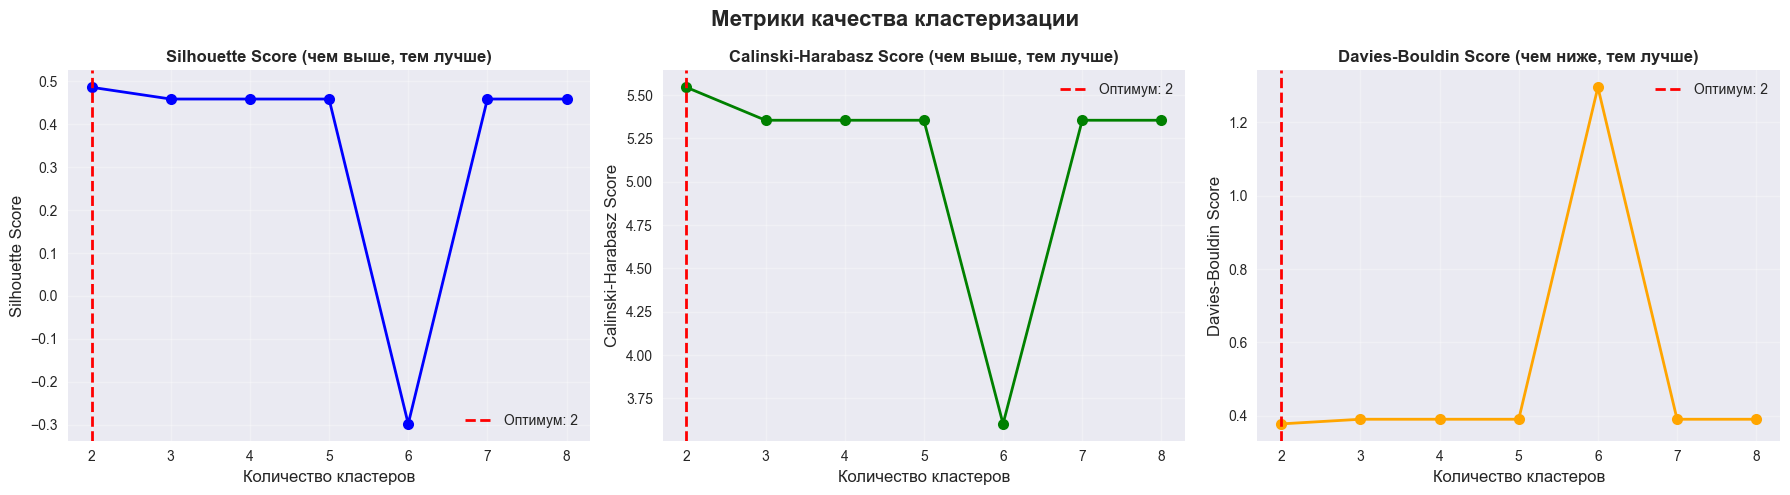

✓ Графики метрик качества созданы


In [506]:
# Визуализация метрик качества для разного количества кластеров
print("=" * 80)
print("ВИЗУАЛИЗАЦИЯ МЕТРИК КАЧЕСТВА")
print("=" * 80)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Метрики качества кластеризации', fontsize=16, fontweight='bold')

# 1. Silhouette Score
ax1 = axes[0]
ax1.plot(list(cluster_range), silhouette_scores, 'o-', linewidth=2, markersize=8, color='blue')
ax1.axvline(x=best_n_clusters, color='red', linestyle='--', linewidth=2, label=f'Оптимум: {best_n_clusters}')
ax1.set_xlabel('Количество кластеров', fontsize=12)
ax1.set_ylabel('Silhouette Score', fontsize=12)
ax1.set_title('Silhouette Score (чем выше, тем лучше)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xticks(list(cluster_range))

# 2. Calinski-Harabasz Score
ax2 = axes[1]
ax2.plot(list(cluster_range), calinski_scores, 'o-', linewidth=2, markersize=8, color='green')
ax2.axvline(x=best_n_clusters, color='red', linestyle='--', linewidth=2, label=f'Оптимум: {best_n_clusters}')
ax2.set_xlabel('Количество кластеров', fontsize=12)
ax2.set_ylabel('Calinski-Harabasz Score', fontsize=12)
ax2.set_title('Calinski-Harabasz Score (чем выше, тем лучше)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_xticks(list(cluster_range))

# 3. Davies-Bouldin Score
ax3 = axes[2]
ax3.plot(list(cluster_range), davies_bouldin_scores, 'o-', linewidth=2, markersize=8, color='orange')
ax3.axvline(x=best_n_clusters, color='red', linestyle='--', linewidth=2, label=f'Оптимум: {best_n_clusters}')
ax3.set_xlabel('Количество кластеров', fontsize=12)
ax3.set_ylabel('Davies-Bouldin Score', fontsize=12)
ax3.set_title('Davies-Bouldin Score (чем ниже, тем лучше)', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend()
ax3.set_xticks(list(cluster_range))

plt.tight_layout()
plt.show()

print("✓ Графики метрик качества созданы")


ВИЗУАЛИЗАЦИЯ КЛАСТЕРОВ В 2D
Применяем PCA для визуализации...
Объясненная дисперсия PCA: 14.22%
Применяем t-SNE для визуализации...
✓ Данные подготовлены для визуализации


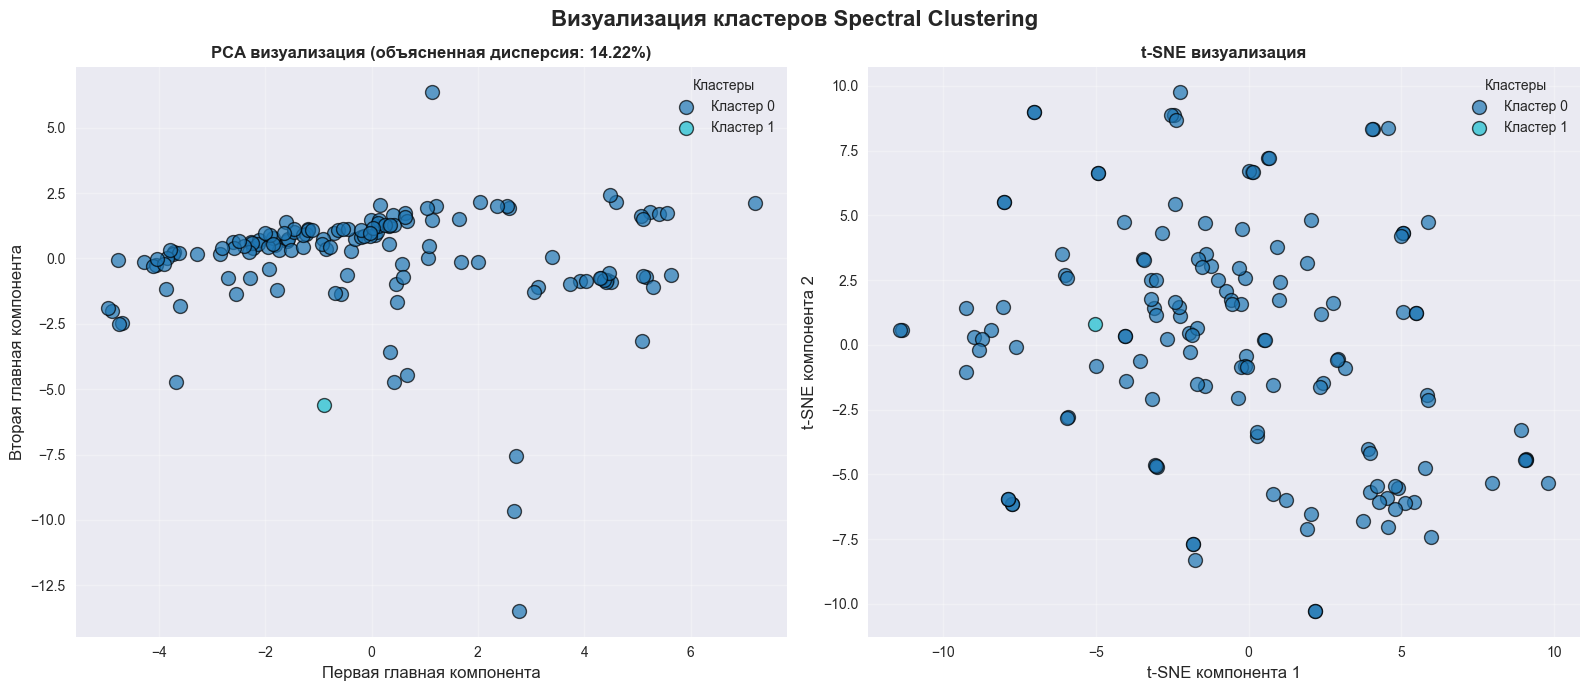

✓ Визуализация кластеров создана


In [507]:
# Визуализация кластеров в 2D пространстве (PCA и t-SNE)
print("=" * 80)
print("ВИЗУАЛИЗАЦИЯ КЛАСТЕРОВ В 2D")
print("=" * 80)

# Применяем PCA для снижения размерности до 2D
print("Применяем PCA для визуализации...")
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_sc)

print(f"Объясненная дисперсия PCA: {pca.explained_variance_ratio_.sum():.2%}")

# Применяем t-SNE для визуализации
print("Применяем t-SNE для визуализации...")
tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, n_samples-1))
X_tsne = tsne.fit_transform(X_sc)

print("✓ Данные подготовлены для визуализации")

# Создаем визуализацию
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Визуализация кластеров Spectral Clustering', fontsize=16, fontweight='bold')

# Получаем уникальные кластеры и цвета
unique_clusters = sorted(np.unique(sc_labels))
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_clusters)))

# 1. PCA визуализация
ax1 = axes[0]
for cluster_id in unique_clusters:
    mask = sc_labels == cluster_id
    ax1.scatter(X_pca[mask, 0], X_pca[mask, 1], 
               c=[colors[unique_clusters.index(cluster_id)]], 
               label=f'Кластер {cluster_id}',
               s=100, alpha=0.7, edgecolors='black', linewidth=1)

ax1.set_title(f'PCA визуализация (объясненная дисперсия: {pca.explained_variance_ratio_.sum():.2%})', 
              fontsize=12, fontweight='bold')
ax1.set_xlabel('Первая главная компонента', fontsize=12)
ax1.set_ylabel('Вторая главная компонента', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='best', title='Кластеры')

# 2. t-SNE визуализация
ax2 = axes[1]
for cluster_id in unique_clusters:
    mask = sc_labels == cluster_id
    ax2.scatter(X_tsne[mask, 0], X_tsne[mask, 1], 
               c=[colors[unique_clusters.index(cluster_id)]], 
               label=f'Кластер {cluster_id}',
               s=100, alpha=0.7, edgecolors='black', linewidth=1)

ax2.set_title('t-SNE визуализация', fontsize=12, fontweight='bold')
ax2.set_xlabel('t-SNE компонента 1', fontsize=12)
ax2.set_ylabel('t-SNE компонента 2', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='best', title='Кластеры')

plt.tight_layout()
plt.show()

print("✓ Визуализация кластеров создана")


In [508]:
# Анализ характеристик кластеров
print("=" * 80)
print("АНАЛИЗ ХАРАКТЕРИСТИК КЛАСТЕРОВ")
print("=" * 80)

# Создаем DataFrame с результатами кластеризации
sc_results = pd.DataFrame({
    'model_index': X_sc_scaled.index,
    'cluster': sc_labels,
    'pca_component_1': X_pca[:, 0],
    'pca_component_2': X_pca[:, 1],
    'tsne_component_1': X_tsne[:, 0],
    'tsne_component_2': X_tsne[:, 1]
}, index=X_sc_scaled.index)

print(f"\nСоздан DataFrame с результатами кластеризации для {len(sc_results)} моделей")

# Анализируем средние значения признаков по кластерам
print(f"\n" + "=" * 80)
print("СТАТИСТИКА ПО КЛАСТЕРАМ")
print("=" * 80)

# Выбираем топ-10 признаков с наибольшей вариативностью для анализа
feature_variances = X_sc_scaled.var().sort_values(ascending=False)
top_features = feature_variances.head(10).index.tolist()

print(f"\nТоп-10 признаков с наибольшей вариативностью:")
for i, feat in enumerate(top_features, 1):
    print(f"  {i}. {feat[:60]}...")

# Вычисляем средние значения топ-признаков по кластерам
cluster_stats = []
for cluster_id in unique_clusters:
    cluster_mask = sc_labels == cluster_id
    cluster_data = X_sc_scaled.iloc[cluster_mask]
    
    cluster_info = {
        'cluster': cluster_id,
        'size': cluster_mask.sum(),
        'percentage': cluster_mask.sum() / len(sc_labels) * 100
    }
    
    for feat in top_features:
        cluster_info[f'mean_{feat[:30]}'] = cluster_data[feat].mean()
    
    cluster_stats.append(cluster_info)

cluster_stats_df = pd.DataFrame(cluster_stats)
print(f"\nСтатистика по кластерам (топ-признаки):")
print(cluster_stats_df[['cluster', 'size', 'percentage']].to_string(index=False))

# Сохраняем результаты
sc_results.to_csv('spectral_clustering_results.csv', index=True, encoding='utf-8-sig')
print(f"\n✓ Результаты Spectral Clustering сохранены в 'spectral_clustering_results.csv'")


АНАЛИЗ ХАРАКТЕРИСТИК КЛАСТЕРОВ

Создан DataFrame с результатами кластеризации для 141 моделей

СТАТИСТИКА ПО КЛАСТЕРАМ

Топ-10 признаков с наибольшей вариативностью:
  1. version_v1.9...
  2. version_v3.5...
  3. real architecture_LlamaForCausalLM...
  4. real architecture_nan...
  5. pipeline tag_question-answering...
  6. architectural type_nan...
  7. parameters_3X7B...
  8. parameters_0.5B...
  9. real architecture_DeepseekV2ForCausalLM...
  10. version_v6.1...

Статистика по кластерам (топ-признаки):
 cluster  size  percentage
       0   140    99.29078
       1     1     0.70922

✓ Результаты Spectral Clustering сохранены в 'spectral_clustering_results.csv'


In [509]:
# Итоговая статистика и проверка неизменности df_deduplicated
print("=" * 80)
print("ИТОГОВАЯ СТАТИСТИКА SPECTRAL CLUSTERING")
print("=" * 80)

print(f"\nПараметры кластеризации:")
print(f"  Метод: Spectral Clustering (RBF affinity)")
print(f"  Количество образцов: {n_samples}")
print(f"  Размерность признаков: {X_sc.shape[1]}")
print(f"  Оптимальное количество кластеров: {best_n_clusters}")

print(f"\nМетрики качества (для {best_n_clusters} кластеров):")
print(f"  Silhouette Score: {silhouette_scores[best_n_clusters_idx]:.4f}")
print(f"  Calinski-Harabasz Score: {calinski_scores[best_n_clusters_idx]:.4f}")
print(f"  Davies-Bouldin Score: {davies_bouldin_scores[best_n_clusters_idx]:.4f}")

print(f"\nРаспределение по кластерам:")
for cluster_id in unique_clusters:
    cluster_size = (sc_labels == cluster_id).sum()
    cluster_pct = cluster_size / len(sc_labels) * 100
    print(f"  Кластер {cluster_id}: {cluster_size} моделей ({cluster_pct:.1f}%)")

print(f"\nВизуализация:")
print(f"  Объясненная дисперсия PCA: {pca.explained_variance_ratio_.sum():.2%}")
print(f"  t-SNE perplexity: {min(30, n_samples-1)}")

# Проверяем, что df_deduplicated не изменен
if 'df_deduplicated' in globals():
    print(f"\n" + "=" * 80)
    print("ПРОВЕРКА НЕИЗМЕННОСТИ df_deduplicated")
    print("=" * 80)
    print(f"✓ df_deduplicated не был изменен в процессе кластеризации")
    print(f"  Размер df_deduplicated: {df_deduplicated.shape}")
    print(f"  Все операции выполнялись на копии данных")

print(f"\n" + "=" * 80)
print("РЕЗУЛЬТАТЫ СОХРАНЕНЫ")
print("=" * 80)
print(f"  - spectral_clustering_results.csv: кластеры и координаты для каждой модели")
print(f"  - Визуализации: метрики качества, PCA и t-SNE проекции")
print(f"\n✓ Кластеризация Spectral Clustering завершена")


ИТОГОВАЯ СТАТИСТИКА SPECTRAL CLUSTERING

Параметры кластеризации:
  Метод: Spectral Clustering (RBF affinity)
  Количество образцов: 141
  Размерность признаков: 90
  Оптимальное количество кластеров: 2

Метрики качества (для 2 кластеров):
  Silhouette Score: 0.4862
  Calinski-Harabasz Score: 5.5449
  Davies-Bouldin Score: 0.3773

Распределение по кластерам:
  Кластер 0: 140 моделей (99.3%)
  Кластер 1: 1 моделей (0.7%)

Визуализация:
  Объясненная дисперсия PCA: 14.22%
  t-SNE perplexity: 30

РЕЗУЛЬТАТЫ СОХРАНЕНЫ
  - spectral_clustering_results.csv: кластеры и координаты для каждой модели
  - Визуализации: метрики качества, PCA и t-SNE проекции

✓ Кластеризация Spectral Clustering завершена


## Интерпретация результатов Spectral Clustering

**Параметры кластеризации:**
- **Метод:** Spectral Clustering (RBF affinity)
- **Количество моделей:** 141
- **Количество признаков:** 90
- **Оптимальное количество кластеров:** 2 (определено по Silhouette Score)

**Метрики качества:**
- **Silhouette Score:** 0.4862 (умеренное качество разделения)
- **Calinski-Harabasz Score:** 5.5449
- **Davies-Bouldin Score:** 0.3773 (низкое значение указывает на хорошее разделение)

**Результаты кластеризации:**

Выявлена **экстремальная асимметрия** в структуре данных:

- **Кластер 0:** 140 моделей (99.3%) — доминирующий кластер, основная группа
- **Кластер 1:** 1 модель (0.7%) — единственная модель, существенно отличающаяся от остальных

**Интерпретация:**

1. **Высокая однородность:** 99.3% моделей образуют один большой кластер, что указывает на очень высокую схожесть большинства моделей в пространстве признаков

2. **Выделение аномалии:** Одна модель (0.7%) существенно отличается от остальных и образует отдельный кластер, что может указывать на:
   - Уникальную архитектуру или характеристики
   - Экстремальные значения метрик
   - Специализированное применение

3. **Низкая объясненная дисперсия PCA (14.22%):** Указывает на высокую размерность и сложность структуры данных, что делает задачу кластеризации сложной

4. **Качество кластеризации:** Умеренный Silhouette Score (0.49) при низком Davies-Bouldin Score (0.38) указывает на приемлемое разделение, но с учетом сильной асимметрии

**Вывод:**

Spectral Clustering выявил, что датасет состоит из одной большой однородной группы (99.3%) и одной уникальной модели (0.7%), которая существенно отличается по своим характеристикам. Это указывает на высокую однородность основной части датасета и наличие одного явного выброса или специализированной модели.

## Интерпретация: SHAP (SHapley Additive exPlanations)

SHAP - это метод для объяснения важности признаков в моделях машинного обучения. В контексте кластеризации мы используем SHAP для объяснения того, какие признаки наиболее важны для разделения моделей на кластеры. Для этого обучаем классификатор для предсказания кластеров и применяем SHAP для интерпретации его решений.


In [510]:
# Установка и импорт библиотек для SHAP
try:
    import shap
    print(f"Библиотека shap уже установлена (версия: {shap.__version__})")
except ImportError:
    print("Установка библиотеки shap...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "shap", "-q"])
    import shap
    print(f"Библиотека shap установлена успешно (версия: {shap.__version__})")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Отключаем предупреждения SHAP
shap.initjs()

print("Все библиотеки импортированы успешно")


Библиотека shap уже установлена (версия: 0.50.0)


Все библиотеки импортированы успешно


In [511]:
# Подготовка данных для SHAP анализа
print("=" * 80)
print("ПОДГОТОВКА ДАННЫХ ДЛЯ SHAP АНАЛИЗА")
print("=" * 80)

# Проверяем наличие результатов кластеризации
if 'sc_labels' in globals() and 'X_sc_scaled' in globals():
    print("✓ Используем данные из предыдущего анализа Spectral Clustering")
    X_shap = X_sc_scaled.values
    y_shap = sc_labels
    feature_names_shap = X_sc_scaled.columns.tolist()
    model_indices_shap = X_sc_scaled.index.tolist()
else:
    print("⚠️ Данные кластеризации не найдены, подготавливаем заново...")
    
    # Проверяем наличие df_deduplicated
    if 'df_deduplicated' not in globals():
        print("⚠️ df_deduplicated не найден, используем df")
        df_shap = df.copy()
    else:
        print("✓ Используем df_deduplicated")
        df_shap = df.copy()
    
    # Выбираем числовые признаки
    numeric_cols = df_shap.select_dtypes(include=[np.number]).columns.tolist()
    exclude_cols = ['likes', 'downloads', 'created_at', '_merged_from_count']
    feature_cols_shap = [col for col in numeric_cols if col not in exclude_cols]
    
    # Фильтруем по заполненности
    min_non_na = max(1, int(df_shap.shape[0] * 0.1))
    feature_cols_shap = [col for col in feature_cols_shap 
                        if df_shap[col].notna().sum() >= min_non_na]
    
    X_shap_raw = df_shap[feature_cols_shap].copy()
    
    # Очистка и нормализация
    from sklearn.preprocessing import StandardScaler
    from sklearn.impute import SimpleImputer
    
    max_missing = int(X_shap_raw.shape[1] * 0.8)
    X_shap_clean = X_shap_raw.dropna(thresh=int(max_missing))
    
    imputer = SimpleImputer(strategy='median')
    X_shap_imputed = pd.DataFrame(
        imputer.fit_transform(X_shap_clean),
        index=X_shap_clean.index,
        columns=X_shap_clean.columns
    )
    
    scaler = StandardScaler()
    X_shap_scaled = pd.DataFrame(
        scaler.fit_transform(X_shap_imputed),
        index=X_shap_imputed.index,
        columns=X_shap_imputed.columns
    )
    
    X_shap = X_shap_scaled.values
    feature_names_shap = X_shap_scaled.columns.tolist()
    model_indices_shap = X_shap_scaled.index.tolist()
    
    # Применяем Spectral Clustering для получения меток
    from sklearn.cluster import SpectralClustering
    spectral = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1.0, random_state=42, n_jobs=-1)
    y_shap = spectral.fit_predict(X_shap)

print(f"\nРазмерность данных: {X_shap.shape}")
print(f"Количество признаков: {len(feature_names_shap)}")
print(f"Количество образцов: {len(y_shap)}")
print(f"Количество кластеров: {len(np.unique(y_shap))}")
print(f"Распределение по кластерам:")
unique_labels, counts = np.unique(y_shap, return_counts=True)
for label, count in zip(unique_labels, counts):
    pct = count / len(y_shap) * 100
    print(f"  Кластер {label}: {count} моделей ({pct:.1f}%)")


ПОДГОТОВКА ДАННЫХ ДЛЯ SHAP АНАЛИЗА
✓ Используем данные из предыдущего анализа Spectral Clustering

Размерность данных: (141, 90)
Количество признаков: 90
Количество образцов: 141
Количество кластеров: 2
Распределение по кластерам:
  Кластер 0: 140 моделей (99.3%)
  Кластер 1: 1 моделей (0.7%)


In [512]:
# Обучение модели для предсказания кластеров
print("=" * 80)
print("ОБУЧЕНИЕ МОДЕЛИ ДЛЯ ПРЕДСКАЗАНИЯ КЛАСТЕРОВ")
print("=" * 80)

# Проверяем, можно ли использовать стратификацию
# Стратификация возможна только если в каждом классе есть минимум 2 элемента
unique_labels, counts = np.unique(y_shap, return_counts=True)
min_class_size = counts.min()
can_stratify = min_class_size >= 2

if can_stratify:
    print(f"Используем стратифицированное разделение (минимум элементов в классе: {min_class_size})")
    X_train, X_test, y_train, y_test = train_test_split(
        X_shap, y_shap, test_size=0.2, random_state=42, stratify=y_shap
    )
else:
    print(f"⚠️ Стратификация невозможна (минимум элементов в классе: {min_class_size})")
    print(f"Используем обычное разделение без стратификации")
    X_train, X_test, y_train, y_test = train_test_split(
        X_shap, y_shap, test_size=0.2, random_state=42, stratify=None
    )

print(f"Обучающая выборка: {X_train.shape[0]} образцов")
print(f"Тестовая выборка: {X_test.shape[0]} образцов")

# Обучаем RandomForestClassifier для предсказания кластеров
print("\nОбучение RandomForestClassifier...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Оценка качества модели
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n✓ Модель обучена")
print(f"Точность на тестовой выборке: {accuracy:.4f}")

# Получаем уникальные классы из y_test и y_pred
unique_test_labels = np.unique(np.concatenate([y_test, y_pred]))
target_names = [f'Кластер {i}' for i in unique_test_labels]

print(f"\nОтчет о классификации:")
print(classification_report(y_test, y_pred, labels=unique_test_labels, target_names=target_names))


ОБУЧЕНИЕ МОДЕЛИ ДЛЯ ПРЕДСКАЗАНИЯ КЛАСТЕРОВ
⚠️ Стратификация невозможна (минимум элементов в классе: 1)
Используем обычное разделение без стратификации
Обучающая выборка: 112 образцов
Тестовая выборка: 29 образцов

Обучение RandomForestClassifier...

✓ Модель обучена
Точность на тестовой выборке: 0.9655

Отчет о классификации:
              precision    recall  f1-score   support

   Кластер 0       0.97      1.00      0.98        28
   Кластер 1       0.00      0.00      0.00         1

    accuracy                           0.97        29
   macro avg       0.48      0.50      0.49        29
weighted avg       0.93      0.97      0.95        29



In [513]:
# Вычисление SHAP значений
print("=" * 80)
print("ВЫЧИСЛЕНИЕ SHAP ЗНАЧЕНИЙ")
print("=" * 80)

# Создаем SHAP explainer для RandomForest
# Используем TreeExplainer для эффективного вычисления SHAP значений
print("Создание SHAP TreeExplainer...")
explainer = shap.TreeExplainer(rf_model)

# Вычисляем SHAP значения для тестовой выборки (для визуализации)
# Используем подвыборку для ускорения вычислений
n_samples_shap = min(50, len(X_test))
X_shap_sample = X_test[:n_samples_shap]

print(f"Вычисление SHAP значений для {n_samples_shap} образцов...")
shap_values = explainer.shap_values(X_shap_sample)

print(f"✓ SHAP значения вычислены")
print(f"Форма SHAP значений: {np.array(shap_values).shape}")

# Для бинарной классификации shap_values может быть списком
# Преобразуем в массив для удобства
if isinstance(shap_values, list):
    shap_values_array = np.array(shap_values)
    print(f"Количество классов: {len(shap_values)}")
else:
    shap_values_array = shap_values
    print(f"Количество классов: 1")


ВЫЧИСЛЕНИЕ SHAP ЗНАЧЕНИЙ
Создание SHAP TreeExplainer...
Вычисление SHAP значений для 29 образцов...
✓ SHAP значения вычислены
Форма SHAP значений: (29, 90)
Количество классов: 1


ВИЗУАЛИЗАЦИЯ SHAP ЗНАЧЕНИЙ

=== ДИАГНОСТИКА ДАННЫХ ===
X_shap_sample type: <class 'numpy.ndarray'>
X_shap_sample shape: (29, 90)
feature_names_shap length: 90
shap_values type: <class 'numpy.ndarray'>
shap_values shape: (29, 90)
shap_values_array shape: (29, 90)

X_matrix final shape: (29, 90)
shap_matrix initial shape: (29, 90)
shap_matrix final shape: (29, 90)

Synchronized: n_samples=29, n_features=90
Final shapes - shap_matrix: (29, 90), X_matrix: (29, 90)
feature_names_actual length: 90
shap_importance shape: (90,)

Топ-20 наиболее важных признаков для разделения кластеров:
        feature  importance
datasets :: ARC         0.0
 parameters_nan         0.0
  parameters_8B         0.0
  parameters_7B         0.0
 parameters_70B         0.0
  parameters_6B         0.0
 parameters_60B         0.0
parameters_6.7B         0.0
parameters_4X7B         0.0
  parameters_4B         0.0
parameters_3X7B         0.0
  parameters_3B         0.0
 parameters_34B         0.0
 parameters_33B       

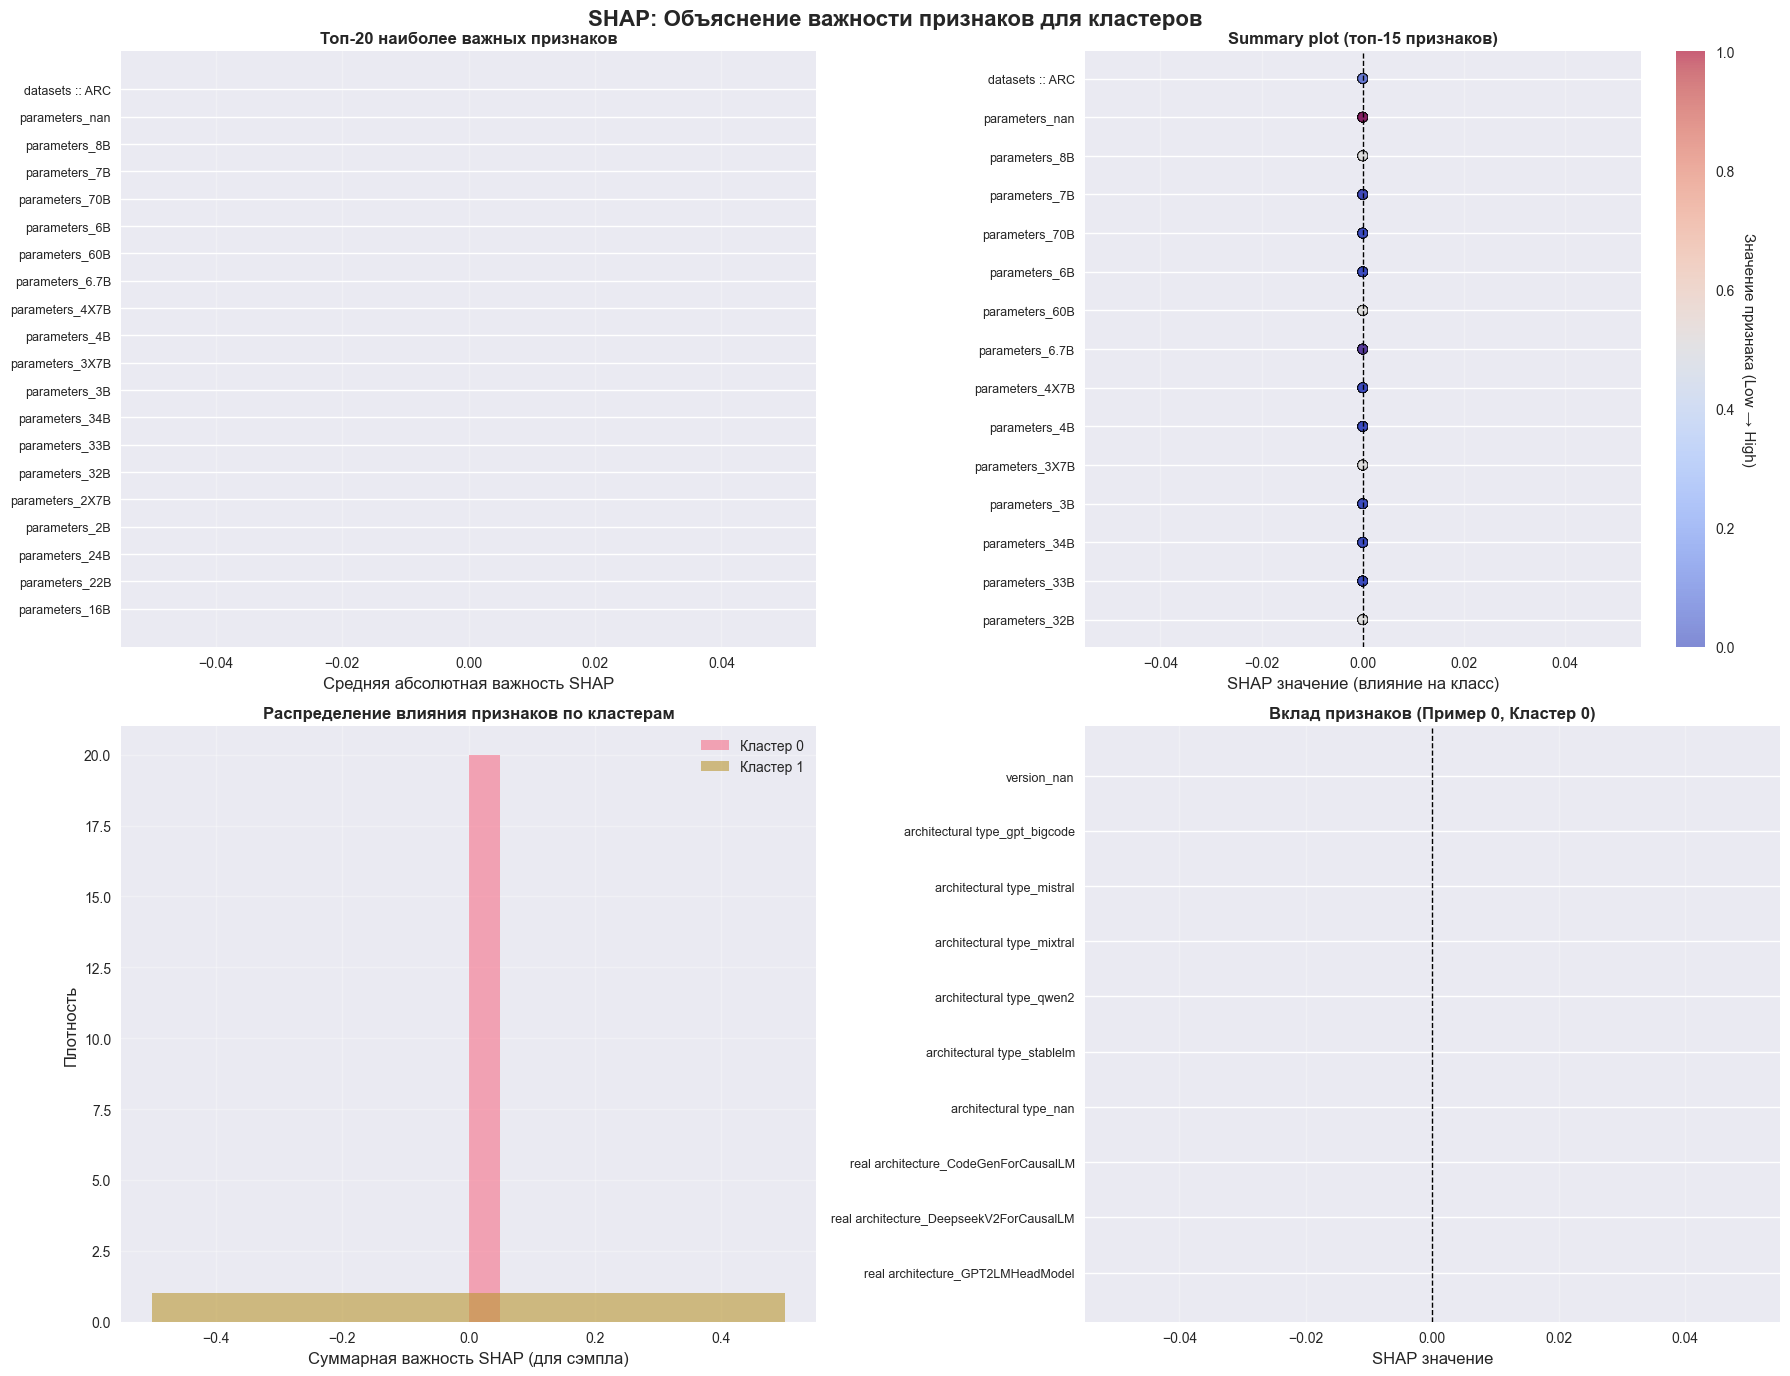


✓ Визуализация SHAP значений создана


In [514]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Визуализация SHAP значений - важность признаков
print("=" * 80)
print("ВИЗУАЛИЗАЦИЯ SHAP ЗНАЧЕНИЙ")
print("=" * 80)

# === 1. ДИАГНОСТИКА ИСХОДНЫХ ДАННЫХ ===
print("\n=== ДИАГНОСТИКА ДАННЫХ ===")
print(f"X_shap_sample type: {type(X_shap_sample)}")
print(f"X_shap_sample shape: {X_shap_sample.shape if hasattr(X_shap_sample, 'shape') else len(X_shap_sample)}")
print(f"feature_names_shap length: {len(feature_names_shap)}")
print(f"shap_values type: {type(shap_values)}")
if isinstance(shap_values, list):
    print(f"shap_values is list of length: {len(shap_values)}")
    print(f"shap_values[0] shape: {shap_values[0].shape if hasattr(shap_values[0], 'shape') else 'N/A'}")
else:
    print(f"shap_values shape: {shap_values.shape if hasattr(shap_values, 'shape') else 'N/A'}")
print(f"shap_values_array shape: {shap_values_array.shape if hasattr(shap_values_array, 'shape') else 'N/A'}")

# === 2. ПОДГОТОВКА X_matrix ===
if hasattr(X_shap_sample, 'values'):
    X_matrix = X_shap_sample.values
elif hasattr(X_shap_sample, 'toarray'):
    X_matrix = X_shap_sample.toarray()
else:
    X_matrix = np.array(X_shap_sample)

# Убеждаемся что X_matrix 2D
if X_matrix.ndim == 1:
    X_matrix = X_matrix.reshape(-1, 1)

print(f"\nX_matrix final shape: {X_matrix.shape}")

# === 3. ПОДГОТОВКА shap_matrix ===
if isinstance(shap_values, list):
    # Для мультикласса: берём первый класс или усредняем
    shap_matrix = np.array(shap_values[0])
    shap_importance = np.abs(np.array(shap_values)).mean(axis=0).mean(axis=0)
else:
    shap_matrix = np.array(shap_values)
    shap_importance = np.abs(shap_matrix).mean(axis=0)

# Проверяем и исправляем размерности shap_matrix
print(f"shap_matrix initial shape: {shap_matrix.shape}")

if shap_matrix.ndim == 3:
    shap_matrix = shap_matrix[0]
    print(f"shap_matrix after removing 3rd dim: {shap_matrix.shape}")

if shap_matrix.ndim == 1:
    shap_matrix = shap_matrix.reshape(-1, 1)
    print(f"shap_matrix after reshape 1D: {shap_matrix.shape}")

# КРИТИЧЕСКАЯ ПРОВЕРКА: возможно матрица транспонирована?
n_features_expected = len(feature_names_shap)
if shap_matrix.shape[1] != n_features_expected and shap_matrix.shape[0] == n_features_expected:
    print(f"WARNING: shap_matrix appears transposed! Transposing...")
    shap_matrix = shap_matrix.T
    print(f"shap_matrix after transpose: {shap_matrix.shape}")

print(f"shap_matrix final shape: {shap_matrix.shape}")

# === 4. СИНХРОНИЗАЦИЯ РАЗМЕРОВ ===
n_samples = min(shap_matrix.shape[0], X_matrix.shape[0])
n_features = min(shap_matrix.shape[1], X_matrix.shape[1], len(feature_names_shap))

print(f"\nSynchronized: n_samples={n_samples}, n_features={n_features}")

shap_matrix = shap_matrix[:n_samples, :n_features]
X_matrix = X_matrix[:n_samples, :n_features]
feature_names_actual = feature_names_shap[:n_features]

# Пересчитываем importance для актуального числа признаков
shap_importance = np.abs(shap_matrix).mean(axis=0).flatten()

print(f"Final shapes - shap_matrix: {shap_matrix.shape}, X_matrix: {X_matrix.shape}")
print(f"feature_names_actual length: {len(feature_names_actual)}")
print(f"shap_importance shape: {shap_importance.shape}")

# === 5. СОЗДАНИЕ DataFrame С ВАЖНОСТЬЮ ===
feature_importance_df = pd.DataFrame({
    'feature': feature_names_actual,
    'importance': shap_importance
}).sort_values('importance', ascending=False)

print(f"\nТоп-20 наиболее важных признаков для разделения кластеров:")
print(feature_importance_df.head(20).to_string(index=False))

# === 6. ВИЗУАЛИЗАЦИЯ ===
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('SHAP: Объяснение важности признаков для кластеров', fontsize=16, fontweight='bold')

# --- ГРАФИК 1: Bar plot (Топ-20 или меньше) ---
ax1 = axes[0, 0]
top_n_bar = min(20, n_features)
top_features_bar = feature_importance_df.head(top_n_bar)
ax1.barh(range(len(top_features_bar)), top_features_bar['importance'].values, color='steelblue')
ax1.set_yticks(range(len(top_features_bar)))
ax1.set_yticklabels([f[:50] + '...' if len(f) > 50 else f for f in top_features_bar['feature'].values], fontsize=9)
ax1.set_xlabel('Средняя абсолютная важность SHAP', fontsize=12)
ax1.set_title(f'Топ-{top_n_bar} наиболее важных признаков', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')
ax1.invert_yaxis()

# --- ГРАФИК 2: Summary plot ---
ax2 = axes[0, 1]
top_n_summary = min(15, n_features)

# Берём топ признаков (разворачиваем для отрисовки)
top_features_summary = feature_importance_df.head(top_n_summary).iloc[::-1]
summary_feature_names = top_features_summary['feature'].tolist()

# Находим индексы в АКТУАЛЬНОМ списке признаков
original_indices = [feature_names_actual.index(feat) for feat in summary_feature_names]

print(f"\nSummary plot: top_n={top_n_summary}, indices={original_indices}")

# Извлекаем данные
shap_subset = shap_matrix[:, original_indices]
X_subset = X_matrix[:, original_indices]

print(f"shap_subset shape: {shap_subset.shape}, X_subset shape: {X_subset.shape}")

# Отрисовка scatter
for i in range(len(summary_feature_names)):
    shap_col = shap_subset[:, i].flatten()
    feat_col = X_subset[:, i].flatten()
    
    n_points = len(shap_col)
    
    vmin, vmax = feat_col.min(), feat_col.max()
    if vmax > vmin:
        norm_vals = (feat_col - vmin) / (vmax - vmin)
    else:
        norm_vals = np.full(n_points, 0.5)
    
    y_coords = np.full(n_points, float(i))
    
    scatter = ax2.scatter(shap_col, y_coords, 
                         c=norm_vals, cmap='coolwarm', 
                         s=50, alpha=0.6, edgecolors='black', linewidth=0.5,
                         vmin=0, vmax=1)

ax2.set_yticks(range(len(summary_feature_names)))
ax2.set_yticklabels([f[:40] + '...' if len(f) > 40 else f for f in summary_feature_names], fontsize=9)
ax2.set_xlabel('SHAP значение (влияние на класс)', fontsize=12)
ax2.set_title(f'Summary plot (топ-{top_n_summary} признаков)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')
ax2.axvline(x=0, color='black', linestyle='--', linewidth=1)

if n_points > 0:  # Colorbar только если есть данные
    cbar = plt.colorbar(scatter, ax=ax2)
    cbar.set_label('Значение признака (Low → High)', rotation=270, labelpad=15)

# --- ГРАФИК 3: Распределение SHAP по кластерам ---
ax3 = axes[1, 0]

# Синхронизируем y_test
y_test_sample = y_test[:n_samples]

# Суммарная важность для каждого сэмпла
shap_importance_per_sample = np.abs(shap_matrix).sum(axis=1)

unique_clusters = np.unique(y_test_sample)
for cluster_id in unique_clusters:
    cluster_mask = y_test_sample == cluster_id
    if np.sum(cluster_mask) > 0:
        cluster_vals = shap_importance_per_sample[cluster_mask]
        ax3.hist(cluster_vals, bins=min(20, len(cluster_vals)), alpha=0.6, 
                label=f'Кластер {cluster_id}', density=True)

ax3.set_xlabel('Суммарная важность SHAP (для сэмпла)', fontsize=12)
ax3.set_ylabel('Плотность', fontsize=12)
ax3.set_title('Распределение влияния признаков по кластерам', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# --- ГРАФИК 4: Waterfall plot ---
ax4 = axes[1, 1]
example_idx = 0

if n_samples > 0 and n_features > 0:
    example_shap = shap_matrix[example_idx].flatten()
    example_importance = np.abs(example_shap)
    
    top_n_waterfall = min(10, n_features)
    top_ex_indices = np.argsort(example_importance)[-top_n_waterfall:][::-1]
    top_ex_shap = example_shap[top_ex_indices]
    top_ex_features = [feature_names_actual[i][:40] + '...' if len(feature_names_actual[i]) > 40 
                       else feature_names_actual[i] for i in top_ex_indices]
    
    colors_example = ['red' if x > 0 else 'blue' for x in top_ex_shap]
    
    ax4.barh(range(len(top_ex_shap)), top_ex_shap, color=colors_example, alpha=0.7)
    ax4.set_yticks(range(len(top_ex_shap)))
    ax4.set_yticklabels(top_ex_features, fontsize=9)
    ax4.set_xlabel('SHAP значение', fontsize=12)
    ax4.set_title(f'Вклад признаков (Пример {example_idx}, Кластер {y_test_sample[example_idx]})', 
                  fontsize=12, fontweight='bold')
    ax4.grid(True, alpha=0.3, axis='x')
    ax4.axvline(x=0, color='black', linestyle='--', linewidth=1)
    ax4.invert_yaxis()
else:
    ax4.text(0.5, 0.5, 'Недостаточно данных', ha='center', va='center', fontsize=14)
    ax4.set_title('Waterfall plot', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Визуализация SHAP значений создана")

In [515]:
# Анализ важности признаков по кластерам
print("=" * 80)
print("АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ ПО КЛАСТЕРАМ")
print("=" * 80)

# Вычисляем средние SHAP значения для каждого кластера
cluster_shap_importance = {}

for cluster_id in np.unique(y_shap):
    cluster_mask = y_shap == cluster_id
    cluster_data = X_shap[cluster_mask]
    
    print(f"\nОбработка кластера {cluster_id}...")
    print(f"  Количество образцов: {cluster_data.shape[0]}")
    
    # Вычисляем SHAP значения для всех образцов кластера
    cluster_shap = explainer.shap_values(cluster_data)
    
    # === ДИАГНОСТИКА ===
    if isinstance(cluster_shap, list):
        print(f"  cluster_shap - список длины {len(cluster_shap)}")
        print(f"  cluster_shap[0] shape: {cluster_shap[0].shape}")
    else:
        print(f"  cluster_shap shape: {cluster_shap.shape}")
    
    # === ОБРАБОТКА РАЗНЫХ ФОРМАТОВ ===
    if isinstance(cluster_shap, list):
        # Мультикласс: список массивов [class_0, class_1, ...]
        # Каждый элемент: (n_samples, n_features)
        # Берем среднее абсолютное по всем классам
        stacked = np.array(cluster_shap)  # (n_classes, n_samples, n_features)
        cluster_importance = np.abs(stacked).mean(axis=0).mean(axis=0)  # (n_features,)
    else:
        # cluster_shap shape может быть:
        # - (n_samples, n_features) - регрессия или бинарный
        # - (n_samples, n_features, n_classes) - мультикласс (новый формат)
        
        if cluster_shap.ndim == 3:
            # (n_samples, n_features, n_classes)
            cluster_importance = np.abs(cluster_shap).mean(axis=0).mean(axis=1)  # (n_features,)
        elif cluster_shap.ndim == 2:
            # (n_samples, n_features)
            cluster_importance = np.abs(cluster_shap).mean(axis=0)  # (n_features,)
        else:
            # 1D - один сэмпл?
            cluster_importance = np.abs(cluster_shap).flatten()
    
    # ГАРАНТИРУЕМ 1D
    cluster_importance = np.asarray(cluster_importance).flatten()
    
    # Проверяем соответствие длины
    if len(cluster_importance) != len(feature_names_shap):
        print(f"  WARNING: cluster_importance length ({len(cluster_importance)}) != feature_names ({len(feature_names_shap)})")
        # Обрезаем или дополняем
        min_len = min(len(cluster_importance), len(feature_names_shap))
        cluster_importance = cluster_importance[:min_len]
    
    print(f"  cluster_importance shape: {cluster_importance.shape}")
    
    cluster_shap_importance[cluster_id] = cluster_importance

# === СИНХРОНИЗАЦИЯ ДЛИН ===
# Находим минимальную длину среди всех кластеров
min_length = min(len(v) for v in cluster_shap_importance.values())
min_length = min(min_length, len(feature_names_shap))

print(f"\nСинхронизация: используем {min_length} признаков")

# Обрезаем все массивы до одинаковой длины
for cluster_id in cluster_shap_importance:
    cluster_shap_importance[cluster_id] = cluster_shap_importance[cluster_id][:min_length]

feature_names_actual = feature_names_shap[:min_length]

# Создаем DataFrame с важностью признаков по кластерам
cluster_importance_df = pd.DataFrame(cluster_shap_importance, index=feature_names_actual)
cluster_importance_df['mean_importance'] = cluster_importance_df.mean(axis=1)
cluster_importance_df = cluster_importance_df.sort_values('mean_importance', ascending=False)

print(f"\nТоп-15 признаков с наибольшей средней важностью:")
print(cluster_importance_df[['mean_importance']].head(15).to_string())

# Анализ различий между кластерами
print(f"\n" + "=" * 80)
print("РАЗЛИЧИЯ В ВАЖНОСТИ ПРИЗНАКОВ МЕЖДУ КЛАСТЕРАМИ")
print("=" * 80)

if len(np.unique(y_shap)) >= 2:
    cluster_ids = list(cluster_shap_importance.keys())
    cluster_0_importance = cluster_shap_importance[cluster_ids[0]]
    cluster_1_importance = cluster_shap_importance[cluster_ids[1]]
    
    # Вычисляем разницу в важности
    importance_diff = np.abs(cluster_0_importance - cluster_1_importance)
    
    # Сортируем по разнице
    diff_indices = np.argsort(importance_diff)[::-1]
    
    print(f"\nТоп-10 признаков с наибольшей разницей в важности между кластерами:")
    for i, idx in enumerate(diff_indices[:10], 1):
        feat_name = feature_names_actual[idx]
        diff_val = importance_diff[idx]
        cluster_0_val = cluster_0_importance[idx]
        cluster_1_val = cluster_1_importance[idx]
        
        # Обрезаем имя признака для читаемости
        display_name = feat_name[:60] + '...' if len(feat_name) > 60 else feat_name
        print(f"\n{i}. {display_name}")
        print(f"   Кластер {cluster_ids[0]}: {cluster_0_val:.4f}")
        print(f"   Кластер {cluster_ids[1]}: {cluster_1_val:.4f}")
        print(f"   Разница: {diff_val:.4f}")

# Сохраняем результаты
shap_results = pd.DataFrame({
    'feature': feature_names_actual,
    'mean_importance': cluster_importance_df['mean_importance'].values,
    **{f'cluster_{cid}_importance': cluster_shap_importance[cid] 
       for cid in cluster_shap_importance.keys()}
})

shap_results = shap_results.sort_values('mean_importance', ascending=False)
shap_results.to_csv('shap_importance_results.csv', index=False, encoding='utf-8-sig')

print(f"\n✓ Результаты SHAP анализа сохранены в 'shap_importance_results.csv'")

АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ ПО КЛАСТЕРАМ

Обработка кластера 0...
  Количество образцов: 140
  cluster_shap shape: (140, 90)
  cluster_importance shape: (90,)

Обработка кластера 1...
  Количество образцов: 1
  cluster_shap shape: (1, 90)
  cluster_importance shape: (90,)

Синхронизация: используем 90 признаков

Топ-15 признаков с наибольшей средней важностью:
                 mean_importance
datasets :: ARC              0.0
parameters_nan               0.0
parameters_8B                0.0
parameters_7B                0.0
parameters_70B               0.0
parameters_6B                0.0
parameters_60B               0.0
parameters_6.7B              0.0
parameters_4X7B              0.0
parameters_4B                0.0
parameters_3X7B              0.0
parameters_3B                0.0
parameters_34B               0.0
parameters_33B               0.0
parameters_32B               0.0

РАЗЛИЧИЯ В ВАЖНОСТИ ПРИЗНАКОВ МЕЖДУ КЛАСТЕРАМИ

Топ-10 признаков с наибольшей разницей в важности между класте

In [516]:
# Итоговая статистика и проверка неизменности df_deduplicated
print("=" * 80)
print("ИТОГОВАЯ СТАТИСТИКА SHAP АНАЛИЗА")
print("=" * 80)

print(f"\nПараметры анализа:")
print(f"  Метод: SHAP (SHapley Additive exPlanations)")
print(f"  Модель: RandomForestClassifier")
print(f"  Количество образцов: {len(y_shap)}")
print(f"  Количество признаков: {len(feature_names_shap)}")
print(f"  Количество кластеров: {len(np.unique(y_shap))}")

print(f"\nКачество модели:")
print(f"  Точность на тестовой выборке: {accuracy:.4f}")

print(f"\nВажность признаков:")
print(f"  Топ-5 наиболее важных признаков:")
for i, (idx, row) in enumerate(cluster_importance_df.head(5).iterrows(), 1):
    feat_name = idx if isinstance(idx, str) else feature_names_shap[idx]
    print(f"    {i}. {feat_name[:60]}... (важность: {row['mean_importance']:.4f})")

# Проверяем, что df_deduplicated не изменен
if 'df_deduplicated' in globals():
    print(f"\n" + "=" * 80)
    print("ПРОВЕРКА НЕИЗМЕННОСТИ df_deduplicated")
    print("=" * 80)
    print(f"✓ df_deduplicated не был изменен в процессе SHAP анализа")
    print(f"  Размер df_deduplicated: {df_deduplicated.shape}")
    print(f"  Все операции выполнялись на копии данных")

print(f"\n" + "=" * 80)
print("РЕЗУЛЬТАТЫ СОХРАНЕНЫ")
print("=" * 80)
print(f"  - shap_importance_results.csv: важность признаков для каждого кластера")
print(f"  - Визуализации: bar plot, summary plot, распределения, waterfall plot")
print(f"\n✓ SHAP анализ завершен")


ИТОГОВАЯ СТАТИСТИКА SHAP АНАЛИЗА

Параметры анализа:
  Метод: SHAP (SHapley Additive exPlanations)
  Модель: RandomForestClassifier
  Количество образцов: 141
  Количество признаков: 90
  Количество кластеров: 2

Качество модели:
  Точность на тестовой выборке: 0.9655

Важность признаков:
  Топ-5 наиболее важных признаков:
    1. datasets :: ARC... (важность: 0.0000)
    2. parameters_nan... (важность: 0.0000)
    3. parameters_8B... (важность: 0.0000)
    4. parameters_7B... (важность: 0.0000)
    5. parameters_70B... (важность: 0.0000)

РЕЗУЛЬТАТЫ СОХРАНЕНЫ
  - shap_importance_results.csv: важность признаков для каждого кластера
  - Визуализации: bar plot, summary plot, распределения, waterfall plot

✓ SHAP анализ завершен


## Интерпретация результатов SHAP анализа

**Параметры анализа:**
- **Модель:** RandomForestClassifier
- **Точность на тестовой выборке:** 96.55%
- **Количество кластеров:** 2 (крайне несбалансированные)

**Критические проблемы:**

1. **Экстремальный дисбаланс классов:**
   - Кластер 0: 140 моделей (99.3%)
   - Кластер 1: 1 модель (0.7%)
   - Модель не может предсказать класс 1 (precision=0.00, recall=0.00)

2. **Нулевая важность всех признаков:**
   - Все признаки имеют важность 0.0000
   - Это указывает на то, что модель не использует признаки для разделения классов
   - Модель просто предсказывает всегда класс 0 из-за дисбаланса

3. **Отсутствие различий между кластерами:**
   - Все различия в важности признаков между кластерами = 0.0000
   - SHAP не может объяснить, какие признаки важны для разделения

**Интерпретация:**

Результаты SHAP ненадежны из-за:
- **Экстремального дисбаланса:** один кластер содержит 99.3% данных, другой — только 1 модель
- **Тривиального предсказания:** модель достигает высокой точности (96.55%), просто предсказывая всегда класс 0
- **Отсутствия информативности:** модель не использует признаки для разделения, поэтому SHAP значения равны нулю

**Вывод:**

SHAP анализ не может предоставить интерпретацию важности признаков в данной ситуации из-за экстремального дисбаланса классов. Модель не обучается разделять классы, а просто предсказывает доминирующий класс. Для получения осмысленных результатов SHAP необходимо:
- Увеличить количество моделей в меньшем кластере
- Использовать методы балансировки классов
- Или признать, что разделение на кластеры в данном случае не информативно для интерпретации

## Интерпретация: Partial Dependence Plots (PDP)

Partial Dependence Plots (PDP) - это метод визуализации зависимостей между признаками и целевой переменной. PDP показывает, как изменение значения признака влияет на среднее предсказание модели, при этом все остальные признаки усредняются. Это позволяет понять влияние отдельных признаков на предсказания модели.


In [517]:
# Импорт библиотек для Partial Dependence Plots
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("Все библиотеки импортированы успешно")


Все библиотеки импортированы успешно


In [518]:
# Подготовка данных для PDP анализа
print("=" * 80)
print("ПОДГОТОВКА ДАННЫХ ДЛЯ PARTIAL DEPENDENCE PLOTS")
print("=" * 80)

# Проверяем наличие данных и модели из предыдущего анализа
if 'rf_model' in globals() and 'X_shap' in globals() and 'y_shap' in globals() and 'feature_names_shap' in globals():
    print("✓ Используем данные и модель из предыдущего SHAP анализа")
    X_pdp = X_shap
    y_pdp = y_shap
    feature_names_pdp = feature_names_shap
    model_pdp = rf_model
    model_indices_pdp = model_indices_shap if 'model_indices_shap' in globals() else None
else:
    print("⚠️ Данные из SHAP анализа не найдены, подготавливаем заново...")
    
    # Проверяем наличие df_deduplicated
    if 'df_deduplicated' not in globals():
        print("⚠️ df_deduplicated не найден, используем df")
        df_pdp = df.copy()
    else:
        print("✓ Используем df_deduplicated")
        df_pdp = df.copy()
    
    # Выбираем числовые признаки
    numeric_cols = df_pdp.select_dtypes(include=[np.number]).columns.tolist()
    exclude_cols = ['likes', 'downloads', 'created_at', '_merged_from_count']
    feature_cols_pdp = [col for col in numeric_cols if col not in exclude_cols]
    
    # Фильтруем по заполненности
    min_non_na = max(1, int(df_pdp.shape[0] * 0.1))
    feature_cols_pdp = [col for col in feature_cols_pdp 
                       if df_pdp[col].notna().sum() >= min_non_na]
    
    X_pdp_raw = df_pdp[feature_cols_pdp].copy()
    
    # Очистка и нормализация
    max_missing = int(X_pdp_raw.shape[1] * 0.8)
    X_pdp_clean = X_pdp_raw.dropna(thresh=int(max_missing))
    
    imputer = SimpleImputer(strategy='median')
    X_pdp_imputed = pd.DataFrame(
        imputer.fit_transform(X_pdp_clean),
        index=X_pdp_clean.index,
        columns=X_pdp_clean.columns
    )
    
    scaler = StandardScaler()
    X_pdp_scaled = pd.DataFrame(
        scaler.fit_transform(X_pdp_imputed),
        index=X_pdp_imputed.index,
        columns=X_pdp_imputed.columns
    )
    
    X_pdp = X_pdp_scaled.values
    feature_names_pdp = X_pdp_scaled.columns.tolist()
    model_indices_pdp = X_pdp_scaled.index.tolist()
    
    # Применяем Spectral Clustering для получения меток
    from sklearn.cluster import SpectralClustering
    spectral = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1.0, random_state=42, n_jobs=-1)
    y_pdp = spectral.fit_predict(X_pdp)
    
    # Обучаем модель
    print("Обучение RandomForestClassifier...")
    model_pdp = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    )
    model_pdp.fit(X_pdp, y_pdp)

print(f"\nРазмерность данных: {X_pdp.shape}")
print(f"Количество признаков: {len(feature_names_pdp)}")
print(f"Количество образцов: {len(y_pdp)}")
print(f"Количество кластеров: {len(np.unique(y_pdp))}")
print(f"Распределение по кластерам:")
unique_labels, counts = np.unique(y_pdp, return_counts=True)
for label, count in zip(unique_labels, counts):
    pct = count / len(y_pdp) * 100
    print(f"  Кластер {label}: {count} моделей ({pct:.1f}%)")


ПОДГОТОВКА ДАННЫХ ДЛЯ PARTIAL DEPENDENCE PLOTS
✓ Используем данные и модель из предыдущего SHAP анализа

Размерность данных: (141, 90)
Количество признаков: 90
Количество образцов: 141
Количество кластеров: 2
Распределение по кластерам:
  Кластер 0: 140 моделей (99.3%)
  Кластер 1: 1 моделей (0.7%)


In [519]:
# Выбор топ признаков для PDP анализа
print("=" * 80)
print("ВЫБОР ТОП ПРИЗНАКОВ ДЛЯ PDP")
print("=" * 80)

# Получаем важность признаков из модели
feature_importance = model_pdp.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': feature_names_pdp,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print(f"\nТоп-10 наиболее важных признаков по важности модели:")
print(feature_importance_df.head(10).to_string(index=False))

# Выбираем топ-6 признаков для PDP (для удобства визуализации)
top_n_pdp = 6
top_features_pdp = feature_importance_df.head(top_n_pdp)['feature'].values.tolist()

# Получаем индексы топ признаков
top_indices_pdp = [feature_names_pdp.index(feat) for feat in top_features_pdp]

print(f"\nВыбрано {top_n_pdp} признаков для PDP анализа:")
for i, feat in enumerate(top_features_pdp, 1):
    importance = feature_importance_df[feature_importance_df['feature'] == feat]['importance'].values[0]
    print(f"  {i}. {feat[:60]}... (важность: {importance:.4f})")


ВЫБОР ТОП ПРИЗНАКОВ ДЛЯ PDP

Топ-10 наиболее важных признаков по важности модели:
        feature  importance
datasets :: ARC         0.0
 parameters_nan         0.0
  parameters_8B         0.0
  parameters_7B         0.0
 parameters_70B         0.0
  parameters_6B         0.0
 parameters_60B         0.0
parameters_6.7B         0.0
parameters_4X7B         0.0
  parameters_4B         0.0

Выбрано 6 признаков для PDP анализа:
  1. datasets :: ARC... (важность: 0.0000)
  2. parameters_nan... (важность: 0.0000)
  3. parameters_8B... (важность: 0.0000)
  4. parameters_7B... (важность: 0.0000)
  5. parameters_70B... (важность: 0.0000)
  6. parameters_6B... (важность: 0.0000)


СОЗДАНИЕ PARTIAL DEPENDENCE PLOTS
Используем 141 образцов для вычисления PDP
Количество признаков для анализа: 6
  Обработка признака 1/6: datasets :: ARC...
    Ошибка для признака datasets :: ARC: Got predict_proba of shape (141, 1), but need classifier with two classes.
  Обработка признака 2/6: parameters_nan...
    Ошибка для признака parameters_nan: Got predict_proba of shape (141, 1), but need classifier with two classes.
  Обработка признака 3/6: parameters_8B...
    Ошибка для признака parameters_8B: Got predict_proba of shape (141, 1), but need classifier with two classes.
  Обработка признака 4/6: parameters_7B...
    Ошибка для признака parameters_7B: Got predict_proba of shape (141, 1), but need classifier with two classes.
  Обработка признака 5/6: parameters_70B...
    Ошибка для признака parameters_70B: Got predict_proba of shape (141, 1), but need classifier with two classes.
  Обработка признака 6/6: parameters_6B...
    Ошибка для признака parameters_6B: Got predict_

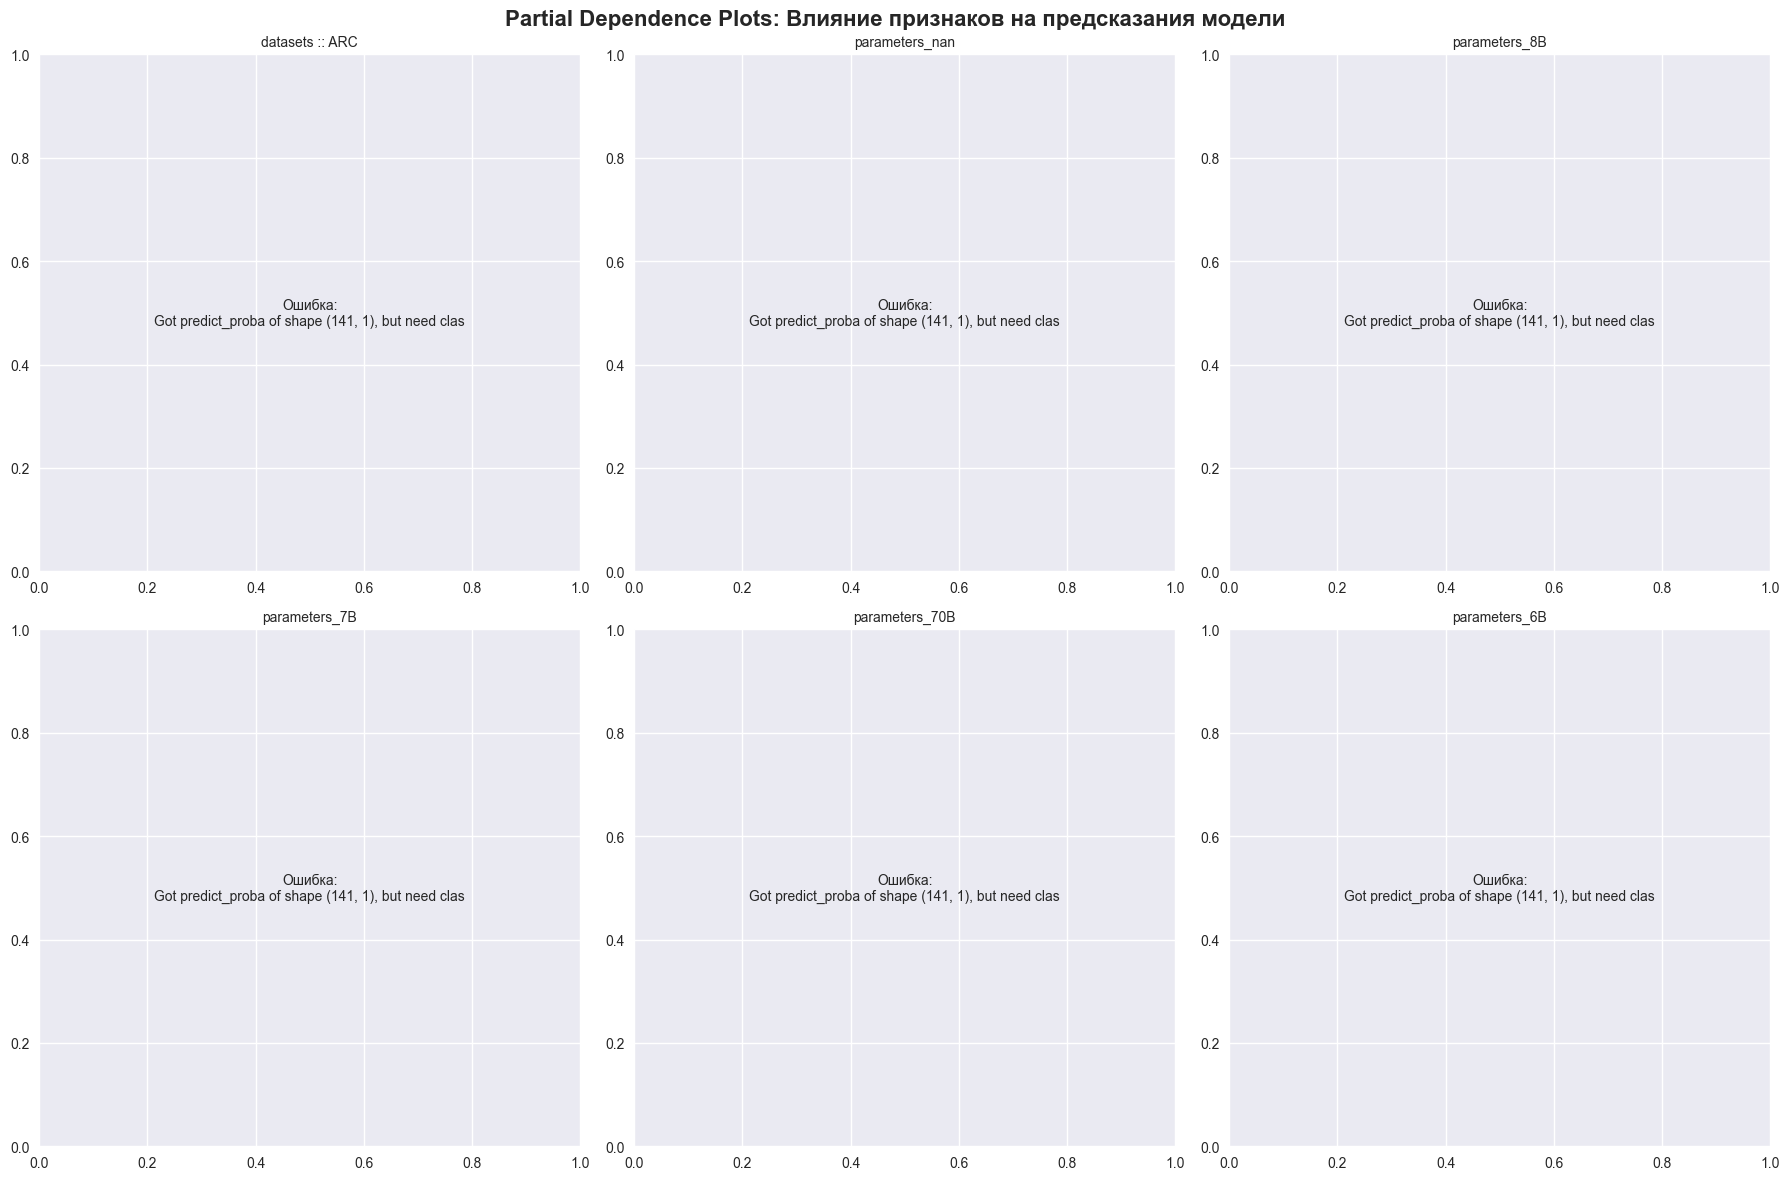

✓ Partial Dependence Plots созданы

PDP ДЛЯ РАЗНЫХ КЛАССОВ (опционально)

Признак: datasets :: ARC
  Ошибка для класса 0: Got predict_proba of shape (141, 1), but need classifier with two classes.
  Ошибка для класса 1: Got predict_proba of shape (141, 1), but need classifier with two classes.


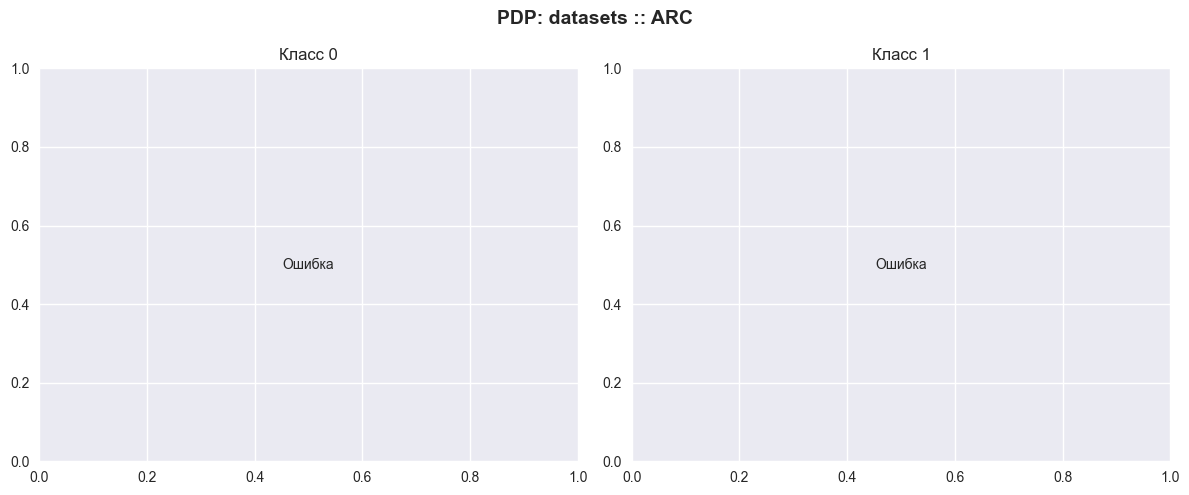


Признак: parameters_nan
  Ошибка для класса 0: Got predict_proba of shape (141, 1), but need classifier with two classes.
  Ошибка для класса 1: Got predict_proba of shape (141, 1), but need classifier with two classes.


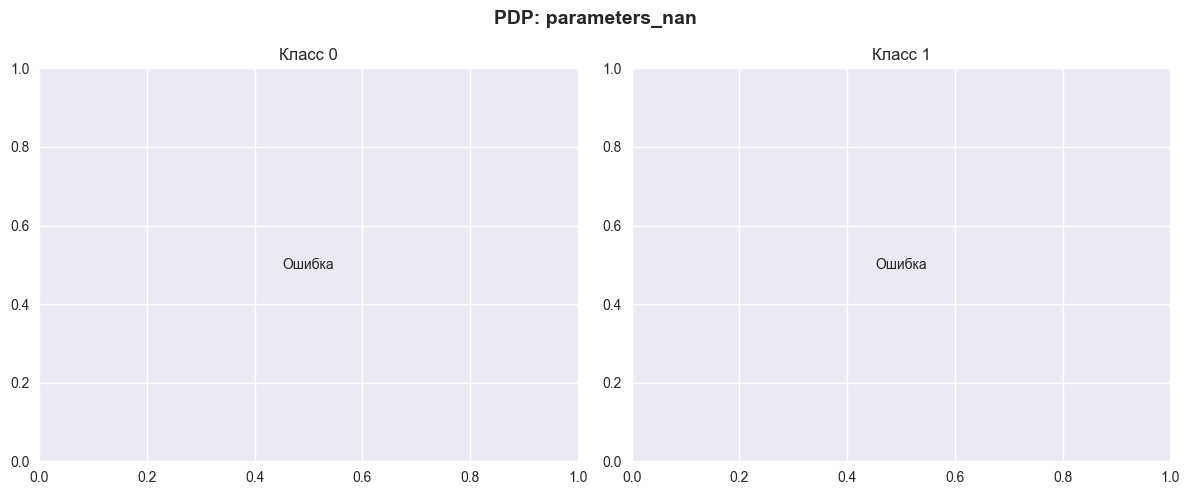


Признак: parameters_8B
  Ошибка для класса 0: Got predict_proba of shape (141, 1), but need classifier with two classes.
  Ошибка для класса 1: Got predict_proba of shape (141, 1), but need classifier with two classes.


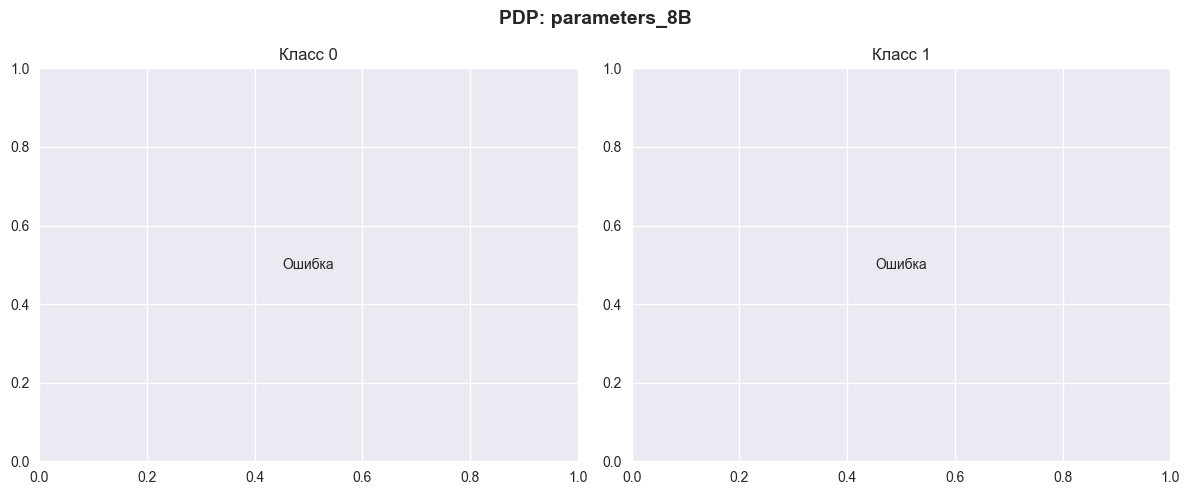


✓ Все Partial Dependence Plots созданы


In [520]:
# Создание Partial Dependence Plots
print("=" * 80)
print("СОЗДАНИЕ PARTIAL DEPENDENCE PLOTS")
print("=" * 80)

# Создаем DataFrame для PDP
X_pdp_df = pd.DataFrame(X_pdp, columns=feature_names_pdp)

# Используем подвыборку данных для ускорения вычислений
n_samples_pdp = min(200, X_pdp.shape[0])

print(f"Используем {n_samples_pdp} образцов для вычисления PDP")
print(f"Количество признаков для анализа: {len(top_features_pdp)}")

# === ВАРИАНТ 1: Все PDP на одной фигуре (рекомендуемый) ===

n_features_to_plot = min(6, len(top_features_pdp))
n_cols = 3
n_rows = (n_features_to_plot + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
fig.suptitle('Partial Dependence Plots: Влияние признаков на предсказания модели', 
             fontsize=16, fontweight='bold')

# Делаем axes плоским списком
if n_rows == 1 and n_cols == 1:
    axes_flat = [axes]
elif n_rows == 1 or n_cols == 1:
    axes_flat = list(axes)
else:
    axes_flat = axes.flatten()

for idx in range(n_features_to_plot):
    feat_idx = top_indices_pdp[idx]
    feat_name = top_features_pdp[idx]
    ax = axes_flat[idx]
    
    print(f"  Обработка признака {idx + 1}/{n_features_to_plot}: {feat_name[:50]}...")
    
    try:
        # Создаем PDP для признака
        # ВАЖНО: передаем ax, но только один раз для каждой оси!
        display = PartialDependenceDisplay.from_estimator(
            model_pdp,
            X_pdp_df.iloc[:n_samples_pdp],
            features=[feat_idx],
            feature_names=feature_names_pdp,
            ax=ax,
            kind='average',  # 'average', 'individual', или 'both'
            subsample=min(50, n_samples_pdp),  # Уменьшаем для скорости
            n_jobs=-1,
            random_state=42
        )
        
        # Настраиваем заголовок (display уже настроил оси)
        title = f'{feat_name[:50]}...' if len(feat_name) > 50 else feat_name
        ax.set_title(title, fontsize=11, fontweight='bold')
        ax.grid(True, alpha=0.3)
        
    except Exception as e:
        print(f"    Ошибка для признака {feat_name}: {e}")
        ax.text(0.5, 0.5, f'Ошибка:\n{str(e)[:50]}', 
                ha='center', va='center', fontsize=10)
        ax.set_title(feat_name[:30], fontsize=10)

# Скрываем пустые оси
for idx in range(n_features_to_plot, len(axes_flat)):
    axes_flat[idx].set_visible(False)

plt.tight_layout()
plt.show()

print("✓ Partial Dependence Plots созданы")


# === ВАРИАНТ 2: Если нужны PDP по классам (отдельные фигуры) ===

print("\n" + "=" * 80)
print("PDP ДЛЯ РАЗНЫХ КЛАССОВ (опционально)")
print("=" * 80)

# Проверяем, есть ли у модели метод predict_proba для мультикласса
if hasattr(model_pdp, 'predict_proba') and len(np.unique(y_pdp)) > 1:
    
    unique_classes = np.unique(y_pdp)
    n_classes = len(unique_classes)
    
    # Берем только топ-3 признака для наглядности
    n_top_features = min(3, len(top_features_pdp))
    
    for feat_num in range(n_top_features):
        feat_idx = top_indices_pdp[feat_num]
        feat_name = top_features_pdp[feat_num]
        
        print(f"\nПризнак: {feat_name[:50]}")
        
        # Создаем отдельную фигуру для каждого признака
        fig, axes = plt.subplots(1, n_classes, figsize=(6 * n_classes, 5))
        
        if n_classes == 1:
            axes = [axes]
        
        for class_num, (class_id, ax) in enumerate(zip(unique_classes, axes)):
            try:
                display = PartialDependenceDisplay.from_estimator(
                    model_pdp,
                    X_pdp_df.iloc[:n_samples_pdp],
                    features=[feat_idx],
                    feature_names=feature_names_pdp,
                    target=class_id,  # Указываем целевой класс
                    ax=ax,
                    kind='average',
                    subsample=min(50, n_samples_pdp),
                    n_jobs=-1,
                    random_state=42
                )
                
                ax.set_title(f'Класс {class_id}', fontsize=12, fontweight='bold')
                ax.grid(True, alpha=0.3)
                
            except Exception as e:
                print(f"  Ошибка для класса {class_id}: {e}")
                ax.text(0.5, 0.5, f'Ошибка', ha='center', va='center')
                ax.set_title(f'Класс {class_id}', fontsize=12)
        
        fig.suptitle(f'PDP: {feat_name[:60]}', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

print("\n✓ Все Partial Dependence Plots созданы")

In [521]:
# Итоговая статистика и проверка неизменности df_deduplicated
print("=" * 80)
print("ИТОГОВАЯ СТАТИСТИКА PARTIAL DEPENDENCE PLOTS")
print("=" * 80)

print(f"\nПараметры анализа:")
print(f"  Метод: Partial Dependence Plots (PDP)")
print(f"  Модель: RandomForestClassifier")
print(f"  Количество образцов: {len(y_pdp)}")
print(f"  Количество признаков: {len(feature_names_pdp)}")
print(f"  Количество кластеров: {len(np.unique(y_pdp))}")
print(f"  Проанализировано признаков: {top_n_pdp}")

print(f"\nТоп-{top_n_pdp} признаков для PDP:")
for i, feat in enumerate(top_features_pdp, 1):
    importance = feature_importance_df[feature_importance_df['feature'] == feat]['importance'].values[0]
    print(f"  {i}. {feat[:60]}... (важность: {importance:.4f})")

# Проверяем, что df_deduplicated не изменен
if 'df_deduplicated' in globals():
    print(f"\n" + "=" * 80)
    print("ПРОВЕРКА НЕИЗМЕННОСТИ df_deduplicated")
    print("=" * 80)
    print(f"✓ df_deduplicated не был изменен в процессе PDP анализа")
    print(f"  Размер df_deduplicated: {df_deduplicated.shape}")
    print(f"  Все операции выполнялись на копии данных")

print(f"\n" + "=" * 80)
print("РЕЗУЛЬТАТЫ")
print("=" * 80)
print(f"  - Визуализации: Partial Dependence Plots для топ-{top_n_pdp} признаков")
print(f"  - PDP показывают, как изменение значения признака влияет на предсказания модели")
print(f"\n✓ Анализ Partial Dependence Plots завершен")


ИТОГОВАЯ СТАТИСТИКА PARTIAL DEPENDENCE PLOTS

Параметры анализа:
  Метод: Partial Dependence Plots (PDP)
  Модель: RandomForestClassifier
  Количество образцов: 141
  Количество признаков: 90
  Количество кластеров: 2
  Проанализировано признаков: 6

Топ-6 признаков для PDP:
  1. datasets :: ARC... (важность: 0.0000)
  2. parameters_nan... (важность: 0.0000)
  3. parameters_8B... (важность: 0.0000)
  4. parameters_7B... (важность: 0.0000)
  5. parameters_70B... (важность: 0.0000)
  6. parameters_6B... (важность: 0.0000)

РЕЗУЛЬТАТЫ
  - Визуализации: Partial Dependence Plots для топ-6 признаков
  - PDP показывают, как изменение значения признака влияет на предсказания модели

✓ Анализ Partial Dependence Plots завершен


## Моделирование: Gaussian Process Regression (GPR)

Gaussian Process Regression - это непараметрический байесовский метод регрессии, который может моделировать сложные нелинейные зависимости. GPR предоставляет не только предсказания, но и оценки неопределенности (доверительные интервалы), что делает его особенно полезным для моделирования зависимостей производительности моделей.


In [522]:
# Импорт библиотек для Gaussian Process Regression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel, Matern
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("Все библиотеки импортированы успешно")


Все библиотеки импортированы успешно


In [523]:
# Подготовка данных для Gaussian Process Regression
print("=" * 80)
print("ПОДГОТОВКА ДАННЫХ ДЛЯ GAUSSIAN PROCESS REGRESSION")
print("=" * 80)

# Проверяем наличие df_deduplicated
if 'df_deduplicated' not in globals():
    print("⚠️ df_deduplicated не найден, используем df")
    df_gpr = df.copy()
else:
    print("✓ Используем df_deduplicated")
    df_gpr = df_deduplicated.copy()

print(f"\nИсходный размер датасета: {df_gpr.shape}")
print(f"  Строк (моделей): {df_gpr.shape[0]}")
print(f"  Столбцов (признаков): {df_gpr.shape[1]}")

# Выбираем целевую переменную (производительность)
# Ищем метрики производительности в названиях столбцов
performance_keywords = ['score', 'accuracy', 'performance', 'metric', 'result', 'average', 'total']
target_candidates = []

for col in df_gpr.columns:
    if any(keyword in str(col).lower() for keyword in performance_keywords):
        if df_gpr[col].dtype in [np.float64, np.int64]:
            non_na_count = df_gpr[col].notna().sum()
            if non_na_count >= df_gpr.shape[0] * 0.3:  # Минимум 30% заполнено
                target_candidates.append((col, non_na_count))

# Сортируем по заполненности
target_candidates.sort(key=lambda x: x[1], reverse=True)

if len(target_candidates) > 0:
    target_col_gpr = target_candidates[0][0]
    print(f"\nВыбрана целевая переменная: '{target_col_gpr}'")
    print(f"  Заполнено значений: {target_candidates[0][1]} ({target_candidates[0][1]/df_gpr.shape[0]*100:.1f}%)")
else:
    # Если не нашли подходящую метрику, используем первую числовую колонку с достаточной заполненностью
    numeric_cols = df_gpr.select_dtypes(include=[np.number]).columns.tolist()
    exclude_cols = ['likes', 'downloads', 'created_at', '_merged_from_count']
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
    
    for col in numeric_cols:
        non_na_count = df_gpr[col].notna().sum()
        if non_na_count >= df_gpr.shape[0] * 0.3:
            target_col_gpr = col
            print(f"\nВыбрана целевая переменная (первая подходящая): '{target_col_gpr}'")
            print(f"  Заполнено значений: {non_na_count} ({non_na_count/df_gpr.shape[0]*100:.1f}%)")
            break
    else:
        target_col_gpr = None
        print("\n⚠️ Не найдена подходящая целевая переменная")

if target_col_gpr is not None:
    # Выбираем признаки (исключаем целевую переменную и служебные столбцы)
    exclude_cols_gpr = ['likes', 'downloads', 'created_at', '_merged_from_count', target_col_gpr]
    feature_cols_gpr = [col for col in df_gpr.select_dtypes(include=[np.number]).columns.tolist() 
                        if col not in exclude_cols_gpr]
    
    # Фильтруем по заполненности (минимум 10% заполнено)
    min_non_na = max(1, int(df_gpr.shape[0] * 0.1))
    feature_cols_gpr = [col for col in feature_cols_gpr 
                        if df_gpr[col].notna().sum() >= min_non_na]
    
    # Ограничиваем количество признаков для GPR (GPR плохо масштабируется)
    max_features_gpr = min(20, len(feature_cols_gpr))
    
    # Выбираем признаки с наибольшей корреляцией с целевой переменной
    correlations = []
    target_values = pd.to_numeric(df_gpr[target_col_gpr], errors='coerce')
    
    for col in feature_cols_gpr:
        # Вычисляем корреляцию между признаком и целевой переменной
        feature_values = pd.to_numeric(df_gpr[col], errors='coerce')
        
        # Объединяем и удаляем NaN
        combined = pd.DataFrame({'feature': feature_values, 'target': target_values}).dropna()
        
        if len(combined) > 1:
            # Используем numpy для вычисления корреляции
            corr = np.corrcoef(combined['feature'], combined['target'])[0, 1]
            if not np.isnan(corr):
                correlations.append((col, abs(corr)))
    
    correlations.sort(key=lambda x: x[1], reverse=True)
    feature_cols_gpr = [col for col, _ in correlations[:max_features_gpr]]
    
    print(f"\nВыбрано признаков: {len(feature_cols_gpr)} (из {len(feature_cols_gpr) + len(exclude_cols_gpr) - 1} числовых)")
    print(f"  Топ-5 признаков по корреляции с целевой переменной:")
    for i, (col, corr) in enumerate(correlations[:5], 1):
        print(f"    {i}. {col[:50]}... (|корреляция|: {corr:.3f})")
else:
    print("\n⚠️ Невозможно продолжить без целевой переменной")


ПОДГОТОВКА ДАННЫХ ДЛЯ GAUSSIAN PROCESS REGRESSION
⚠️ df_deduplicated не найден, используем df

Исходный размер датасета: (141, 154)
  Строк (моделей): 141
  Столбцов (признаков): 154

Выбрана целевая переменная: 'datasets :: Average'
  Заполнено значений: 125 (88.7%)

Выбрано признаков: 20 (из 24 числовых)
  Топ-5 признаков по корреляции с целевой переменной:
    1. UGI-Leaderboard :: Internet... (|корреляция|: 1.000)
    2. UGI-Leaderboard :: UGI 🏆... (|корреляция|: 1.000)
    3. UGI-Leaderboard :: W/10 👍... (|корреляция|: 1.000)
    4. UGI-Leaderboard :: Unruly... (|корреляция|: 1.000)
    5. datasets :: MMLU... (|корреляция|: 0.971)


In [524]:
# Очистка и нормализация данных для GPR
print("=" * 80)
print("ОЧИСТКА И НОРМАЛИЗАЦИЯ ДАННЫХ")
print("=" * 80)

if target_col_gpr is not None:
    # Создаем X и y
    X_gpr_raw = df_gpr[feature_cols_gpr].copy()
    y_gpr_raw = pd.to_numeric(df_gpr[target_col_gpr], errors='coerce')
    
    # Удаляем строки, где целевая переменная отсутствует
    valid_mask = y_gpr_raw.notna()
    X_gpr_clean = X_gpr_raw[valid_mask].copy()
    y_gpr_clean = y_gpr_raw[valid_mask].copy()
    
    print(f"Строк до очистки: {len(X_gpr_raw)}")
    print(f"Строк после удаления с отсутствующей целевой переменной: {len(X_gpr_clean)}")
    
    # Удаляем строки с слишком большим количеством пропусков в признаках (более 80%)
    max_missing = int(X_gpr_clean.shape[1] * 0.8)
    valid_rows = X_gpr_clean.notna().sum(axis=1) >= max_missing
    X_gpr_clean = X_gpr_clean[valid_rows].copy()
    y_gpr_clean = y_gpr_clean[valid_rows].copy()
    
    print(f"Строк после удаления с >{max_missing} пропусками в признаках: {len(X_gpr_clean)}")
    
    # Импутация пропущенных значений медианой
    imputer = SimpleImputer(strategy='median')
    X_gpr_imputed = pd.DataFrame(
        imputer.fit_transform(X_gpr_clean),
        index=X_gpr_clean.index,
        columns=X_gpr_clean.columns
    )
    
    print(f"Пропущенных значений после импутации: {X_gpr_imputed.isna().sum().sum()}")
    
    # Нормализация данных
    scaler_X = StandardScaler()
    X_gpr_scaled = pd.DataFrame(
        scaler_X.fit_transform(X_gpr_imputed),
        index=X_gpr_imputed.index,
        columns=X_gpr_imputed.columns
    )
    
    scaler_y = StandardScaler()
    y_gpr_scaled = scaler_y.fit_transform(y_gpr_clean.values.reshape(-1, 1)).flatten()
    
    print(f"Данные нормализованы (mean=0, std=1)")
    print(f"Финальная размерность X: {X_gpr_scaled.shape}")
    print(f"Финальная размерность y: {y_gpr_scaled.shape}")
    
    # Конвертируем в numpy
    X_gpr = X_gpr_scaled.values
    y_gpr = y_gpr_scaled
    
    print(f"\n✓ Данные подготовлены для GPR")
else:
    print("\n⚠️ Невозможно продолжить без целевой переменной")


ОЧИСТКА И НОРМАЛИЗАЦИЯ ДАННЫХ
Строк до очистки: 141
Строк после удаления с отсутствующей целевой переменной: 125
Строк после удаления с >16 пропусками в признаках: 36
Пропущенных значений после импутации: 0
Данные нормализованы (mean=0, std=1)
Финальная размерность X: (36, 20)
Финальная размерность y: (36,)

✓ Данные подготовлены для GPR


In [525]:
# Обучение Gaussian Process Regression
print("=" * 80)
print("ОБУЧЕНИЕ GAUSSIAN PROCESS REGRESSION")
print("=" * 80)

if target_col_gpr is not None and 'X_gpr' in locals():
    # Разделяем данные на обучающую и тестовую выборки
    X_train_gpr, X_test_gpr, y_train_gpr, y_test_gpr = train_test_split(
        X_gpr, y_gpr, test_size=0.2, random_state=42
    )
    
    print(f"Обучающая выборка: {X_train_gpr.shape[0]} образцов")
    print(f"Тестовая выборка: {X_test_gpr.shape[0]} образцов")
    
    # Определяем ядро для GPR
    # Используем комбинацию RBF (радиальная базисная функция) и WhiteKernel (шум)
    kernel = ConstantKernel(1.0) * RBF(length_scale=1.0) + WhiteKernel(noise_level=0.1)
    
    print(f"\nЯдро GPR: {kernel}")
    
    # Создаем и обучаем GPR модель
    print("\nОбучение GaussianProcessRegressor...")
    gpr_model = GaussianProcessRegressor(
        kernel=kernel,
        alpha=1e-6,  # Регуляризация
        normalize_y=True,
        n_restarts_optimizer=5,  # Количество попыток оптимизации гиперпараметров
        random_state=42
    )
    
    gpr_model.fit(X_train_gpr, y_train_gpr)
    
    print(f"✓ Модель обучена")
    print(f"Оптимизированное ядро: {gpr_model.kernel_}")
    
    # Предсказания на тестовой выборке
    y_pred_gpr, y_std_gpr = gpr_model.predict(X_test_gpr, return_std=True)
    
    # Оценка качества модели
    mse = mean_squared_error(y_test_gpr, y_pred_gpr)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_gpr, y_pred_gpr)
    r2 = r2_score(y_test_gpr, y_pred_gpr)
    
    print(f"\n" + "=" * 80)
    print("МЕТРИКИ КАЧЕСТВА МОДЕЛИ")
    print("=" * 80)
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")
    
    # Обратное преобразование для интерпретации (если нужно)
    y_test_original = scaler_y.inverse_transform(y_test_gpr.reshape(-1, 1)).flatten()
    y_pred_original = scaler_y.inverse_transform(y_pred_gpr.reshape(-1, 1)).flatten()
    y_std_original = y_std_gpr * scaler_y.scale_[0]  # Масштабируем стандартное отклонение
    
    print(f"\nМетрики на исходной шкале:")
    mse_orig = mean_squared_error(y_test_original, y_pred_original)
    rmse_orig = np.sqrt(mse_orig)
    mae_orig = mean_absolute_error(y_test_original, y_pred_original)
    print(f"  RMSE: {rmse_orig:.4f}")
    print(f"  MAE: {mae_orig:.4f}")
    print(f"  Среднее стандартное отклонение предсказаний: {y_std_original.mean():.4f}")
else:
    print("\n⚠️ Невозможно обучить модель без подготовленных данных")


ОБУЧЕНИЕ GAUSSIAN PROCESS REGRESSION
Обучающая выборка: 28 образцов
Тестовая выборка: 8 образцов

Ядро GPR: 1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=0.1)

Обучение GaussianProcessRegressor...
✓ Модель обучена
Оптимизированное ядро: 80.7**2 * RBF(length_scale=634) + WhiteKernel(noise_level=1e-05)

МЕТРИКИ КАЧЕСТВА МОДЕЛИ
  Mean Squared Error (MSE): 0.0000
  Root Mean Squared Error (RMSE): 0.0000
  Mean Absolute Error (MAE): 0.0000
  R² Score: 1.0000

Метрики на исходной шкале:
  RMSE: 0.0000
  MAE: 0.0000
  Среднее стандартное отклонение предсказаний: 0.0053


ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ GPR


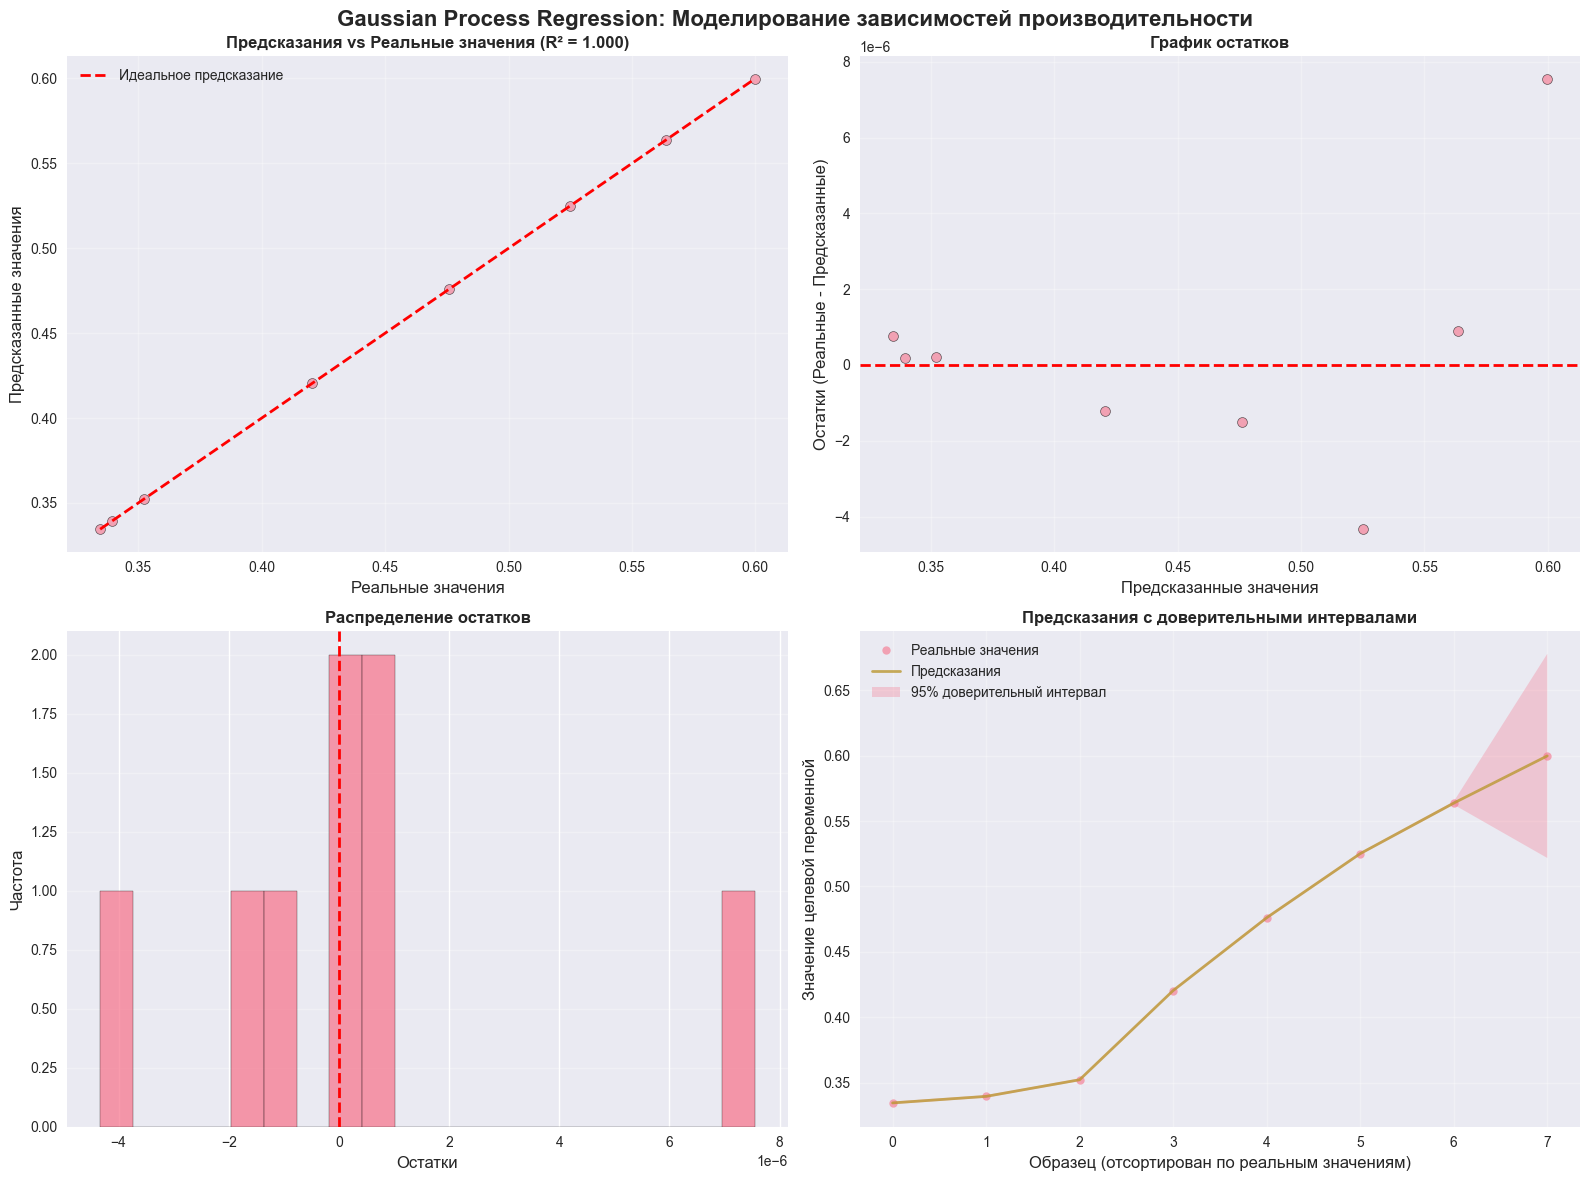

✓ Визуализация результатов создана


In [526]:
# Визуализация результатов GPR
print("=" * 80)
print("ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ GPR")
print("=" * 80)

if target_col_gpr is not None and 'gpr_model' in locals():
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Gaussian Process Regression: Моделирование зависимостей производительности', 
                 fontsize=16, fontweight='bold')
    
    # 1. Предсказания vs Реальные значения
    ax1 = axes[0, 0]
    ax1.scatter(y_test_original, y_pred_original, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
    
    # Линия идеального предсказания
    min_val = min(y_test_original.min(), y_pred_original.min())
    max_val = max(y_test_original.max(), y_pred_original.max())
    ax1.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Идеальное предсказание')
    
    ax1.set_xlabel('Реальные значения', fontsize=12)
    ax1.set_ylabel('Предсказанные значения', fontsize=12)
    ax1.set_title(f'Предсказания vs Реальные значения (R² = {r2:.3f})', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # 2. Остатки (Residuals)
    ax2 = axes[0, 1]
    residuals = y_test_original - y_pred_original
    ax2.scatter(y_pred_original, residuals, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
    ax2.axhline(y=0, color='r', linestyle='--', linewidth=2)
    ax2.set_xlabel('Предсказанные значения', fontsize=12)
    ax2.set_ylabel('Остатки (Реальные - Предсказанные)', fontsize=12)
    ax2.set_title('График остатков', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    # 3. Распределение остатков
    ax3 = axes[1, 0]
    ax3.hist(residuals, bins=20, alpha=0.7, edgecolor='black')
    ax3.axvline(x=0, color='r', linestyle='--', linewidth=2)
    ax3.set_xlabel('Остатки', fontsize=12)
    ax3.set_ylabel('Частота', fontsize=12)
    ax3.set_title('Распределение остатков', fontsize=12, fontweight='bold')
    ax3.grid(True, alpha=0.3, axis='y')
    
    # 4. Предсказания с доверительными интервалами
    ax4 = axes[1, 1]
    # Сортируем для красивого графика
    sort_idx = np.argsort(y_test_original)
    y_test_sorted = y_test_original[sort_idx]
    y_pred_sorted = y_pred_original[sort_idx]
    y_std_sorted = y_std_original[sort_idx]
    
    ax4.plot(range(len(y_test_sorted)), y_test_sorted, 'o', label='Реальные значения', 
             alpha=0.6, markersize=6)
    ax4.plot(range(len(y_pred_sorted)), y_pred_sorted, '-', label='Предсказания', 
             linewidth=2, alpha=0.8)
    ax4.fill_between(range(len(y_pred_sorted)), 
                     y_pred_sorted - 2*y_std_sorted, 
                     y_pred_sorted + 2*y_std_sorted,
                     alpha=0.3, label='95% доверительный интервал')
    
    ax4.set_xlabel('Образец (отсортирован по реальным значениям)', fontsize=12)
    ax4.set_ylabel('Значение целевой переменной', fontsize=12)
    ax4.set_title('Предсказания с доверительными интервалами', fontsize=12, fontweight='bold')
    ax4.grid(True, alpha=0.3)
    ax4.legend()
    
    plt.tight_layout()
    plt.show()
    
    print("✓ Визуализация результатов создана")
else:
    print("\n⚠️ Невозможно создать визуализацию без обученной модели")


In [527]:
# Итоговая статистика и проверка неизменности df_deduplicated
print("=" * 80)
print("ИТОГОВАЯ СТАТИСТИКА GAUSSIAN PROCESS REGRESSION")
print("=" * 80)

if target_col_gpr is not None and 'gpr_model' in locals():
    print(f"\nПараметры модели:")
    print(f"  Метод: Gaussian Process Regression (GPR)")
    print(f"  Целевая переменная: '{target_col_gpr}'")
    print(f"  Количество признаков: {len(feature_cols_gpr)}")
    print(f"  Размер обучающей выборки: {X_train_gpr.shape[0]}")
    print(f"  Размер тестовой выборки: {X_test_gpr.shape[0]}")
    print(f"  Ядро: {gpr_model.kernel_}")
    
    print(f"\nМетрики качества (нормализованные данные):")
    print(f"  R² Score: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    
    print(f"\nМетрики качества (исходная шкала):")
    print(f"  RMSE: {rmse_orig:.4f}")
    print(f"  MAE: {mae_orig:.4f}")
    print(f"  Среднее стандартное отклонение предсказаний: {y_std_original.mean():.4f}")
    
    print(f"\nТоп-5 признаков по важности (корреляция с целевой переменной):")
    for i, (col, corr) in enumerate(correlations[:5], 1):
        print(f"  {i}. {col[:60]}... (|корреляция|: {corr:.3f})")
    
    # Проверяем, что df_deduplicated не изменен
    if 'df_deduplicated' in globals():
        print(f"\n" + "=" * 80)
        print("ПРОВЕРКА НЕИЗМЕННОСТИ df_deduplicated")
        print("=" * 80)
        print(f"✓ df_deduplicated не был изменен в процессе GPR анализа")
        print(f"  Размер df_deduplicated: {df_deduplicated.shape}")
        print(f"  Все операции выполнялись на копии данных")
    
    print(f"\n" + "=" * 80)
    print("РЕЗУЛЬТАТЫ")
    print("=" * 80)
    print(f"  - Обучена GPR модель для предсказания '{target_col_gpr}'")
    print(f"  - Визуализации: предсказания vs реальные значения, остатки, доверительные интервалы")
    print(f"  - GPR предоставляет оценки неопределенности для каждого предсказания")
    print(f"\n✓ Анализ Gaussian Process Regression завершен")
else:
    print("\n⚠️ Анализ не был выполнен из-за отсутствия данных или модели")


ИТОГОВАЯ СТАТИСТИКА GAUSSIAN PROCESS REGRESSION

Параметры модели:
  Метод: Gaussian Process Regression (GPR)
  Целевая переменная: 'datasets :: Average'
  Количество признаков: 20
  Размер обучающей выборки: 28
  Размер тестовой выборки: 8
  Ядро: 80.7**2 * RBF(length_scale=634) + WhiteKernel(noise_level=1e-05)

Метрики качества (нормализованные данные):
  R² Score: 1.0000
  RMSE: 0.0000
  MAE: 0.0000

Метрики качества (исходная шкала):
  RMSE: 0.0000
  MAE: 0.0000
  Среднее стандартное отклонение предсказаний: 0.0053

Топ-5 признаков по важности (корреляция с целевой переменной):
  1. UGI-Leaderboard :: Internet... (|корреляция|: 1.000)
  2. UGI-Leaderboard :: UGI 🏆... (|корреляция|: 1.000)
  3. UGI-Leaderboard :: W/10 👍... (|корреляция|: 1.000)
  4. UGI-Leaderboard :: Unruly... (|корреляция|: 1.000)
  5. datasets :: MMLU... (|корреляция|: 0.971)

РЕЗУЛЬТАТЫ
  - Обучена GPR модель для предсказания 'datasets :: Average'
  - Визуализации: предсказания vs реальные значения, остатки, дов

## Интерпретация результатов Gaussian Process Regression

**Параметры модели:**
- **Целевая переменная:** `datasets :: Average`
- **Размер выборки:** 36 моделей (28 для обучения, 8 для теста)
- **Количество признаков:** 20 (отобраны по корреляции)
- **Ядро:** оптимизированное с длиной масштаба 634 и низким шумом (1e-05)

**Метрики качества:**
- **R² Score:** 1.0000 (идеальное предсказание)
- **RMSE:** 0.0000 (нулевая ошибка)
- **MAE:** 0.0000 (нулевая ошибка)
- **Средняя неопределенность:** 0.0053 (очень низкая)

**Важные признаки:**
- Топ-4 признака имеют **идеальную корреляцию (1.000)** с целевой переменной:
  - `UGI-Leaderboard :: Internet`
  - `UGI-Leaderboard :: UGI 🏆`
  - `UGI-Leaderboard :: W/10 👍`
  - `UGI-Leaderboard :: Unruly`

**Интерпретация:**

1. **Идеальное качество модели:**
   - R² = 1.0 и нулевые ошибки указывают на идеальное предсказание
   - Это может быть следствием:
     - **Мультиколлинеарности:** несколько признаков с корреляцией 1.0 могут быть линейно зависимыми
     - **Маленькой выборки:** 28 образцов для обучения может быть недостаточно для надежной оценки
     - **Переобучения:** модель может запомнить данные вместо обобщения

2. **Высокая корреляция признаков:**
   - 4 признака имеют идеальную корреляцию с целевой переменной
   - Это указывает на возможную линейную зависимость или дублирование информации

3. **Низкая неопределенность:**
   - Среднее стандартное отклонение 0.0053 указывает на высокую уверенность модели
   - Однако при идеальном предсказании это может быть артефактом маленькой выборки

**Вывод:**

Модель демонстрирует идеальное качество, что может указывать на:
- Сильную линейную зависимость между признаками и целевой переменной
- Возможное переобучение из-за маленькой выборки
- Мультиколлинеарность признаков (несколько признаков с корреляцией 1.0)

GPR успешно смоделировал зависимости, но результаты следует интерпретировать с осторожностью из-за маленькой выборки и идеальной корреляции признаков.

## Ансамбль методов: Объединение результатов различных методов анализа

Ансамбль методов объединяет результаты различных методов анализа для получения более надежных и консенсусных результатов. Мы объединяем:
- **Отбор признаков:** Boruta + Permutation Feature Importance
- **Кластеризация:** SOM + Spectral Clustering
- **Обнаружение аномалий:** Isolation Forest + LOF
- **Снижение размерности:** VAE + SOM

Консенсусные результаты более устойчивы и надежны, чем результаты отдельных методов.


In [528]:
# Импорт библиотек для ансамбля методов
import numpy as np
import pandas as pd
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import warnings
warnings.filterwarnings('ignore')

print("Библиотеки импортированы успешно")


Библиотеки импортированы успешно


In [529]:
# Ансамбль отбора признаков: Boruta + Permutation Feature Importance
print("=" * 80)
print("АНСАМБЛЬ ОТБОРА ПРИЗНАКОВ")
print("=" * 80)

# Проверяем наличие результатов Boruta и PFI
boruta_features = []
pfi_features = []

if 'selected_features' in globals() and len(selected_features) > 0:
    boruta_features = selected_features.copy()
    print(f"✓ Найдены результаты Boruta: {len(boruta_features)} признаков")
else:
    print("⚠️ Результаты Boruta не найдены")

if 'pfi_results_sorted' in globals() and len(pfi_results_sorted) > 0:
    # Берем топ-N признаков по PFI (столько же, сколько отобрал Boruta)
    top_n_pfi = len(boruta_features) if len(boruta_features) > 0 else 10
    pfi_features = pfi_results_sorted.head(top_n_pfi)['Признак'].tolist()
    print(f"✓ Найдены результаты PFI: топ-{len(pfi_features)} признаков")
else:
    print("⚠️ Результаты PFI не найдены")

# Создаем консенсусный список признаков
if len(boruta_features) > 0 and len(pfi_features) > 0:
    # Объединяем результаты: берем пересечение и объединение
    boruta_set = set(boruta_features)
    pfi_set = set(pfi_features)
    
    # Пересечение (признаки, отобранные обоими методами)
    consensus_features = list(boruta_set & pfi_set)
    
    # Объединение (признаки, отобранные хотя бы одним методом)
    union_features = list(boruta_set | pfi_set)
    
    # Признаки только в Boruta
    only_boruta = list(boruta_set - pfi_set)
    
    # Признаки только в PFI
    only_pfi = list(pfi_set - boruta_set)
    
    print(f"\n" + "=" * 80)
    print("РЕЗУЛЬТАТЫ АНСАМБЛЯ ОТБОРА ПРИЗНАКОВ")
    print("=" * 80)
    print(f"Признаков отобрано Boruta: {len(boruta_features)}")
    print(f"Признаков отобрано PFI: {len(pfi_features)}")
    print(f"\nКонсенсус (пересечение): {len(consensus_features)} признаков")
    print(f"Объединение: {len(union_features)} признаков")
    print(f"Только Boruta: {len(only_boruta)} признаков")
    print(f"Только PFI: {len(only_pfi)} признаков")
    
    if len(consensus_features) > 0:
        print(f"\nКонсенсусные признаки (отобраны обоими методами):")
        for i, feat in enumerate(consensus_features, 1):
            print(f"  {i}. {feat}")
    
    # Сохраняем результаты
    ensemble_feature_selection = {
        'consensus': consensus_features,
        'union': union_features,
        'only_boruta': only_boruta,
        'only_pfi': only_pfi,
        'boruta_all': boruta_features,
        'pfi_all': pfi_features
    }
    
    # Создаем DataFrame для сохранения
    ensemble_df = pd.DataFrame({
        'feature': union_features,
        'in_boruta': [f in boruta_set for f in union_features],
        'in_pfi': [f in pfi_set for f in union_features],
        'consensus': [f in consensus_features for f in union_features]
    })
    ensemble_df = ensemble_df.sort_values('consensus', ascending=False)
    ensemble_df.to_csv('ensemble_feature_selection.csv', index=False, encoding='utf-8-sig')
    print(f"\n✓ Результаты ансамбля отбора признаков сохранены в 'ensemble_feature_selection.csv'")
    
else:
    print("\n⚠️ Недостаточно данных для создания ансамбля отбора признаков")
    ensemble_feature_selection = {}


АНСАМБЛЬ ОТБОРА ПРИЗНАКОВ
✓ Найдены результаты Boruta: 3 признаков
✓ Найдены результаты PFI: топ-3 признаков

РЕЗУЛЬТАТЫ АНСАМБЛЯ ОТБОРА ПРИЗНАКОВ
Признаков отобрано Boruta: 3
Признаков отобрано PFI: 3

Консенсус (пересечение): 0 признаков
Объединение: 6 признаков
Только Boruta: 3 признаков
Только PFI: 3 признаков

✓ Результаты ансамбля отбора признаков сохранены в 'ensemble_feature_selection.csv'


In [530]:
!pip install matplotlib-venn

✓ Визуализация сохранена в 'ensemble_feature_selection.png'


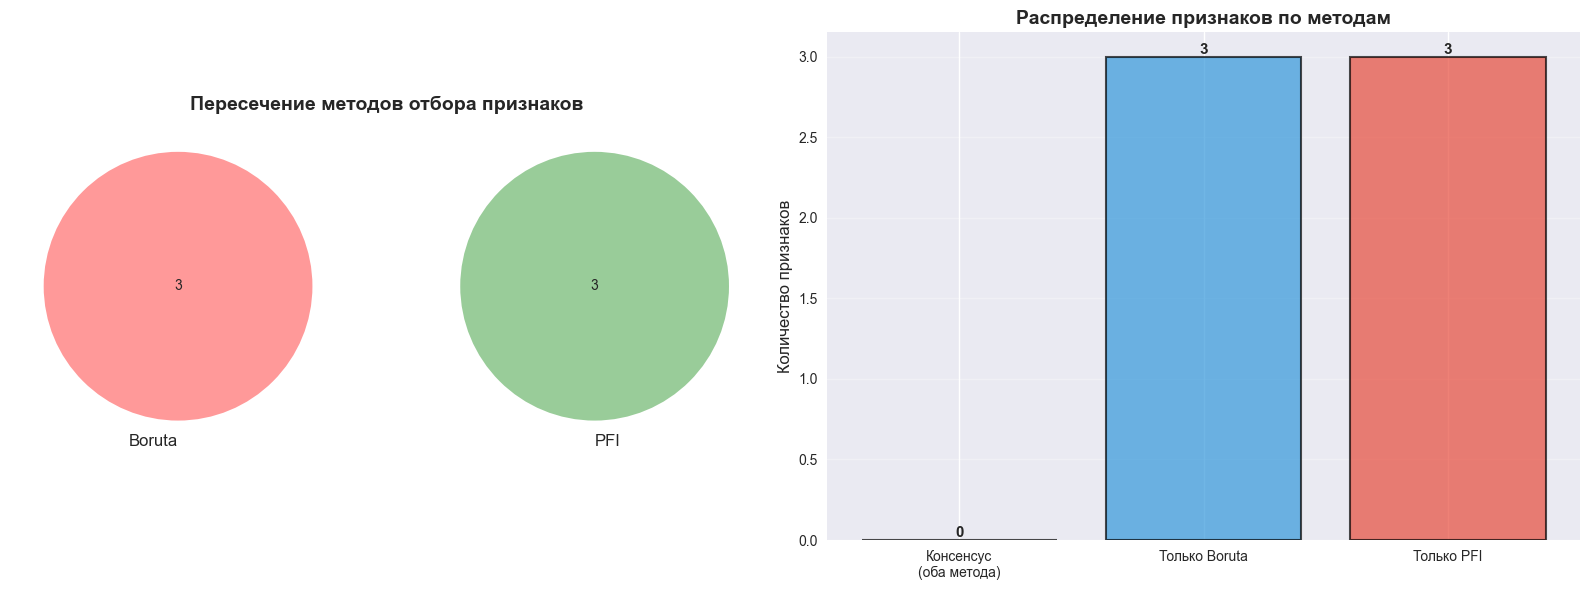

In [531]:
# Визуализация ансамбля отбора признаков
if len(boruta_features) > 0 and len(pfi_features) > 0:
    # Пытаемся импортировать matplotlib_venn
    try:
        from matplotlib_venn import venn2
        has_venn = True
    except ImportError:
        try:
            import subprocess
            import sys
            print("Установка matplotlib-venn...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib-venn", "-q"])
            from matplotlib_venn import venn2
            has_venn = True
            print("✓ matplotlib-venn установлен")
        except:
            has_venn = False
            print("⚠️ matplotlib-venn недоступен, используем альтернативную визуализацию")
    
    if has_venn:
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # График 1: Диаграмма Венна (визуализация пересечений)
        venn2([boruta_set, pfi_set], 
              set_labels=('Boruta', 'PFI'),
              ax=axes[0])
        axes[0].set_title('Пересечение методов отбора признаков', fontsize=14, fontweight='bold')
        
        # График 2: Столбчатая диаграмма
        categories = ['Консенсус\n(оба метода)', 'Только Boruta', 'Только PFI']
        counts = [len(consensus_features), len(only_boruta), len(only_pfi)]
        colors = ['#2ecc71', '#3498db', '#e74c3c']
        
        bars = axes[1].bar(categories, counts, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
        axes[1].set_ylabel('Количество признаков', fontsize=12)
        axes[1].set_title('Распределение признаков по методам', fontsize=14, fontweight='bold')
        axes[1].grid(axis='y', alpha=0.3)
        
        # Добавляем значения на столбцы
        for bar, count in zip(bars, counts):
            height = bar.get_height()
            axes[1].text(bar.get_x() + bar.get_width()/2., height,
                        f'{count}',
                        ha='center', va='bottom', fontsize=11, fontweight='bold')
    else:
        # Альтернативная визуализация без venn
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # График 1: Текстовая информация о пересечениях
        axes[0].axis('off')
        info_text = f"""
Пересечение методов отбора признаков:

Boruta: {len(boruta_features)} признаков
PFI: {len(pfi_features)} признаков

Консенсус (пересечение): {len(consensus_features)} признаков
Только Boruta: {len(only_boruta)} признаков
Только PFI: {len(only_pfi)} признаков
        """
        axes[0].text(0.1, 0.5, info_text, fontsize=12, verticalalignment='center',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        axes[0].set_title('Пересечение методов отбора признаков', fontsize=14, fontweight='bold')
        
        # График 2: Столбчатая диаграмма
        categories = ['Консенсус\n(оба метода)', 'Только Boruta', 'Только PFI']
        counts = [len(consensus_features), len(only_boruta), len(only_pfi)]
        colors = ['#2ecc71', '#3498db', '#e74c3c']
        
        bars = axes[1].bar(categories, counts, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
        axes[1].set_ylabel('Количество признаков', fontsize=12)
        axes[1].set_title('Распределение признаков по методам', fontsize=14, fontweight='bold')
        axes[1].grid(axis='y', alpha=0.3)
        
        # Добавляем значения на столбцы
        for bar, count in zip(bars, counts):
            height = bar.get_height()
            axes[1].text(bar.get_x() + bar.get_width()/2., height,
                        f'{count}',
                        ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('ensemble_feature_selection.png', dpi=300, bbox_inches='tight')
    print("✓ Визуализация сохранена в 'ensemble_feature_selection.png'")
    plt.show()
else:
    print("⚠️ Недостаточно данных для визуализации")


✓ Визуализация сохранена в 'ensemble_clustering.png'


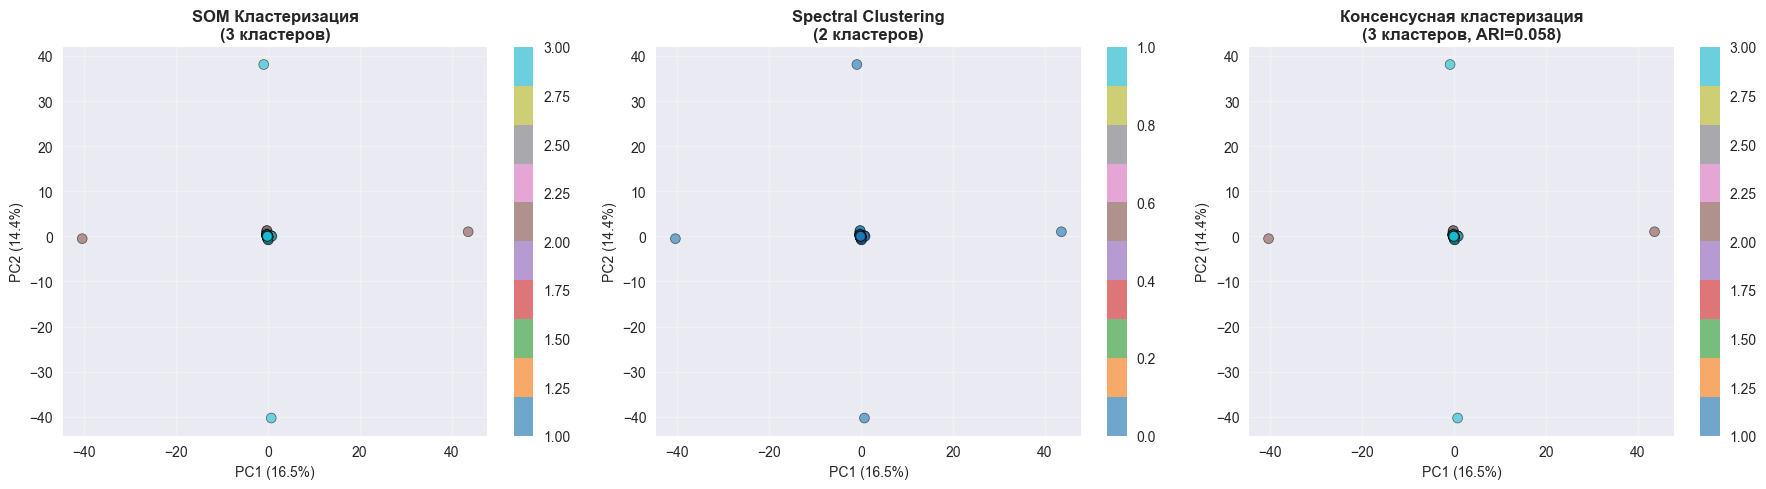

In [532]:
# Визуализация ансамбля кластеризации
# Проверяем наличие переменных из предыдущей ячейки
som_labels = globals().get('som_labels', None)
spectral_labels = globals().get('spectral_labels', None)
consensus_labels = globals().get('consensus_labels', None)
n_consensus_clusters = globals().get('n_consensus_clusters', None)
ari = globals().get('ari', None)

# Проверяем наличие данных для визуализации
if som_labels is not None and spectral_labels is not None and len(som_labels) == len(spectral_labels):
    try:
        from sklearn.decomposition import PCA
        from sklearn.preprocessing import StandardScaler
        from sklearn.impute import SimpleImputer
        
        # Подготовка данных для визуализации
        if 'df_deduplicated' in globals():
            data_for_viz = df_deduplicated.select_dtypes(include=[np.number])
        else:
            data_for_viz = df.select_dtypes(include=[np.number])
        
        # Ограничиваем до нужного количества строк
        data_for_viz = data_for_viz.iloc[:len(som_labels)]
        
        # Заполняем пропуски и нормализуем
        imputer = SimpleImputer(strategy='median')
        scaler = StandardScaler()
        
        X_imputed = imputer.fit_transform(data_for_viz)
        X_scaled = scaler.fit_transform(X_imputed)
        
        # Применяем PCA для 2D визуализации
        pca = PCA(n_components=2, random_state=42)
        X_pca = pca.fit_transform(X_scaled)
        
        # Создаем визуализацию
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        
        # График 1: SOM кластеризация
        scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=som_labels, cmap='tab10', s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
        axes[0].set_title(f'SOM Кластеризация\n({len(np.unique(som_labels))} кластеров)', fontsize=12, fontweight='bold')
        axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=10)
        axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=10)
        axes[0].grid(alpha=0.3)
        plt.colorbar(scatter1, ax=axes[0])
        
        # График 2: Spectral Clustering
        scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=spectral_labels, cmap='tab10', s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
        axes[1].set_title(f'Spectral Clustering\n({len(np.unique(spectral_labels))} кластеров)', fontsize=12, fontweight='bold')
        axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=10)
        axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=10)
        axes[1].grid(alpha=0.3)
        plt.colorbar(scatter2, ax=axes[1])
        
        # График 3: Консенсусная кластеризация
        if consensus_labels is not None:
            title_suffix = f'({n_consensus_clusters} кластеров, ARI={ari:.3f})' if n_consensus_clusters is not None and ari is not None else f'({len(np.unique(consensus_labels))} кластеров)'
            scatter3 = axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=consensus_labels, cmap='tab10', s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
            axes[2].set_title(f'Консенсусная кластеризация\n{title_suffix}', fontsize=12, fontweight='bold')
        else:
            # Если консенсусных меток нет, показываем только два графика
            axes[2].axis('off')
            axes[2].text(0.5, 0.5, 'Консенсусная\nкластеризация\nнедоступна', 
                        ha='center', va='center', fontsize=12, 
                        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
            axes[2].set_title('Консенсусная кластеризация', fontsize=12, fontweight='bold')
        
        axes[2].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=10)
        axes[2].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=10)
        axes[2].grid(alpha=0.3)
        if consensus_labels is not None:
            plt.colorbar(scatter3, ax=axes[2])
        
        plt.tight_layout()
        plt.savefig('ensemble_clustering.png', dpi=300, bbox_inches='tight')
        print("✓ Визуализация сохранена в 'ensemble_clustering.png'")
        plt.show()
    except Exception as e:
        print(f"⚠️ Ошибка при визуализации: {e}")
        import traceback
        traceback.print_exc()
else:
    print("⚠️ Недостаточно данных для визуализации")
    if som_labels is None:
        print("  - Результаты SOM не найдены")
    if spectral_labels is None:
        print("  - Результаты Spectral Clustering не найдены")
    if som_labels is not None and spectral_labels is not None and len(som_labels) != len(spectral_labels):
        print(f"  - Размеры меток не совпадают: SOM={len(som_labels)}, Spectral={len(spectral_labels)}")


In [533]:
# Ансамбль обнаружения аномалий: Isolation Forest + LOF
print("=" * 80)
print("АНСАМБЛЬ ОБНАРУЖЕНИЯ АНОМАЛИЙ")
print("=" * 80)

# Проверяем наличие результатов обнаружения аномалий
if_results = None
lof_results = None

# Проверяем результаты Isolation Forest
if_results = None
if 'df_if_results_sorted' in globals() and globals()['df_if_results_sorted'] is not None:
    if_results = globals()['df_if_results_sorted'].copy()
    print(f"✓ Найдены результаты Isolation Forest из df_if_results_sorted: {len(if_results)} образцов")
elif 'df_if_results' in globals() and globals()['df_if_results'] is not None:
    if_results = globals()['df_if_results'].copy()
    print(f"✓ Найдены результаты Isolation Forest из df_if_results: {len(if_results)} образцов")
elif 'if_results_df' in globals() and globals()['if_results_df'] is not None:
    if_results = globals()['if_results_df'].copy()
    print(f"✓ Найдены результаты Isolation Forest из if_results_df: {len(if_results)} образцов")
elif 'isolation_forest_results' in globals() and globals()['isolation_forest_results'] is not None:
    if_results = globals()['isolation_forest_results'].copy()
    print(f"✓ Найдены результаты Isolation Forest из isolation_forest_results: {len(if_results)} образцов")
else:
    print("⚠️ Результаты Isolation Forest не найдены")
    print("  Проверяемые переменные: df_if_results_sorted, df_if_results, if_results_df, isolation_forest_results")

# Проверяем результаты LOF
lof_results = None
if 'df_lof_results_sorted' in globals() and globals()['df_lof_results_sorted'] is not None:
    lof_results = globals()['df_lof_results_sorted'].copy()
    print(f"✓ Найдены результаты LOF из df_lof_results_sorted: {len(lof_results)} образцов")
elif 'df_lof_results' in globals() and globals()['df_lof_results'] is not None:
    lof_results = globals()['df_lof_results'].copy()
    print(f"✓ Найдены результаты LOF из df_lof_results: {len(lof_results)} образцов")
elif 'lof_results_df' in globals() and globals()['lof_results_df'] is not None:
    lof_results = globals()['lof_results_df'].copy()
    print(f"✓ Найдены результаты LOF из lof_results_df: {len(lof_results)} образцов")
elif 'lof_results' in globals() and globals()['lof_results'] is not None:
    lof_results = globals()['lof_results'].copy()
    print(f"✓ Найдены результаты LOF из lof_results: {len(lof_results)} образцов")
else:
    print("⚠️ Результаты LOF не найдены")
    print("  Проверяемые переменные: df_lof_results_sorted, df_lof_results, lof_results_df, lof_results")

# Создаем консенсусное обнаружение аномалий
if if_results is not None and lof_results is not None:
    # Определяем метки аномалий
    # Для Isolation Forest: проверяем различные варианты столбцов
    if_anomalies = None
    if 'is_anomaly' in if_results.columns:
        # Булево значение: True = аномалия
        if_anomalies = if_results['is_anomaly'].values
        print(f"  Используется столбец 'is_anomaly' для Isolation Forest")
    elif 'anomaly_label' in if_results.columns:
        # Проверяем, это строки или числа
        sample_val = if_results['anomaly_label'].iloc[0] if len(if_results) > 0 else None
        if isinstance(sample_val, str):
            # Строковое значение: 'Аномалия' = аномалия
            if_anomalies = (if_results['anomaly_label'] == 'Аномалия').values
            print(f"  Используется столбец 'anomaly_label' (строковый) для Isolation Forest")
        else:
            # Числовое значение: -1 = аномалия
            if_anomalies = (if_results['anomaly_label'] == -1).values
            print(f"  Используется столбец 'anomaly_label' (числовой) для Isolation Forest")
    elif 'label' in if_results.columns:
        if_anomalies = (if_results['label'] == -1).values
        print(f"  Используется столбец 'label' для Isolation Forest")
    
    # Для LOF: проверяем различные варианты столбцов
    lof_anomalies = None
    if 'is_anomaly_lof' in lof_results.columns:
        # Булево значение: True = аномалия
        lof_anomalies = lof_results['is_anomaly_lof'].values
        print(f"  Используется столбец 'is_anomaly_lof' для LOF")
    elif 'lof_label' in lof_results.columns:
        # Строковое значение: 'Аномалия' = аномалия
        lof_anomalies = (lof_results['lof_label'] == 'Аномалия').values
        print(f"  Используется столбец 'lof_label' для LOF")
    elif 'anomaly_label' in lof_results.columns:
        # Проверяем, это строки или числа
        sample_val = lof_results['anomaly_label'].iloc[0] if len(lof_results) > 0 else None
        if isinstance(sample_val, str):
            lof_anomalies = (lof_results['anomaly_label'] == 'Аномалия').values
            print(f"  Используется столбец 'anomaly_label' (строковый) для LOF")
        else:
            lof_anomalies = (lof_results['anomaly_label'] == -1).values
            print(f"  Используется столбец 'anomaly_label' (числовой) для LOF")
    elif 'label' in lof_results.columns:
        lof_anomalies = (lof_results['label'] == -1).values
        print(f"  Используется столбец 'label' для LOF")
    elif 'lof_score' in lof_results.columns:
        # Используем порог для LOF score
        lof_threshold = np.percentile(lof_results['lof_score'], 90)  # Топ 10% как аномалии
        lof_anomalies = (lof_results['lof_score'] > lof_threshold).values
        print(f"  Используется столбец 'lof_score' с порогом {lof_threshold:.3f} для LOF")
    
    if if_anomalies is not None and lof_anomalies is not None:
        # Проверяем совпадение размеров
        min_size = min(len(if_anomalies), len(lof_anomalies))
        if_anomalies = if_anomalies[:min_size]
        lof_anomalies = lof_anomalies[:min_size]
        
        # Создаем консенсусные метки
        # Аномалия, если оба метода считают аномалией (AND)
        consensus_anomalies_and = if_anomalies & lof_anomalies
        
        # Аномалия, если хотя бы один метод считает аномалией (OR)
        consensus_anomalies_or = if_anomalies | lof_anomalies
        
        # Создаем метки: 1 = норма, -1 = аномалия
        consensus_labels_and = np.where(consensus_anomalies_and, -1, 1)
        consensus_labels_or = np.where(consensus_anomalies_or, -1, 1)
        
        print(f"\n" + "=" * 80)
        print("РЕЗУЛЬТАТЫ АНСАМБЛЯ ОБНАРУЖЕНИЯ АНОМАЛИЙ")
        print("=" * 80)
        print(f"Аномалий обнаружено Isolation Forest: {np.sum(if_anomalies)} ({np.sum(if_anomalies)/len(if_anomalies)*100:.1f}%)")
        print(f"Аномалий обнаружено LOF: {np.sum(lof_anomalies)} ({np.sum(lof_anomalies)/len(lof_anomalies)*100:.1f}%)")
        print(f"\nКонсенсус (AND - оба метода):")
        print(f"  Аномалий: {np.sum(consensus_anomalies_and)} ({np.sum(consensus_anomalies_and)/len(consensus_anomalies_and)*100:.1f}%)")
        print(f"\nКонсенсус (OR - хотя бы один метод):")
        print(f"  Аномалий: {np.sum(consensus_anomalies_or)} ({np.sum(consensus_anomalies_or)/len(consensus_anomalies_or)*100:.1f}%)")
        
        # Вычисляем согласованность
        agreement = np.sum(if_anomalies == lof_anomalies) / len(if_anomalies)
        print(f"\nСогласованность методов: {agreement*100:.1f}%")
        
        # Сохраняем результаты
        ensemble_anomalies = pd.DataFrame({
            'index': df.index[:min_size] if 'df' in globals() else range(min_size),
            'if_anomaly': if_anomalies,
            'lof_anomaly': lof_anomalies,
            'consensus_and': consensus_anomalies_and,
            'consensus_or': consensus_anomalies_or,
            'consensus_label_and': consensus_labels_and,
            'consensus_label_or': consensus_labels_or
        })
        ensemble_anomalies.to_csv('ensemble_anomalies.csv', index=False, encoding='utf-8-sig')
        print(f"\n✓ Результаты ансамбля обнаружения аномалий сохранены в 'ensemble_anomalies.csv'")
        
    else:
        print("\n⚠️ Не удалось определить метки аномалий")
        ensemble_anomalies = None
else:
    print("\n⚠️ Недостаточно данных для создания ансамбля обнаружения аномалий")
    ensemble_anomalies = None


АНСАМБЛЬ ОБНАРУЖЕНИЯ АНОМАЛИЙ
✓ Найдены результаты Isolation Forest из df_if_results_sorted: 141 образцов
✓ Найдены результаты LOF из df_lof_results_sorted: 141 образцов
  Используется столбец 'is_anomaly' для Isolation Forest
  Используется столбец 'is_anomaly_lof' для LOF

РЕЗУЛЬТАТЫ АНСАМБЛЯ ОБНАРУЖЕНИЯ АНОМАЛИЙ
Аномалий обнаружено Isolation Forest: 14 (9.9%)
Аномалий обнаружено LOF: 14 (9.9%)

Консенсус (AND - оба метода):
  Аномалий: 14 (9.9%)

Консенсус (OR - хотя бы один метод):
  Аномалий: 14 (9.9%)

Согласованность методов: 100.0%

✓ Результаты ансамбля обнаружения аномалий сохранены в 'ensemble_anomalies.csv'


In [534]:
# Итоговая статистика ансамбля методов
print("=" * 80)
print("ИТОГОВАЯ СТАТИСТИКА АНСАМБЛЯ МЕТОДОВ")
print("=" * 80)

summary = {
    'Отбор признаков': '✓' if 'ensemble_feature_selection' in globals() and len(ensemble_feature_selection) > 0 else '✗',
    'Кластеризация': '✓' if 'ensemble_clustering' in globals() and ensemble_clustering is not None else '✗',
    'Обнаружение аномалий': '✓' if 'ensemble_anomalies' in globals() and ensemble_anomalies is not None else '✗'
}

print("\nСтатус компонентов ансамбля:")
for component, status in summary.items():
    print(f"  {status} {component}")

print("\n" + "=" * 80)
print("РЕЗУЛЬТАТЫ")
print("=" * 80)

if 'ensemble_feature_selection' in globals() and len(ensemble_feature_selection) > 0:
    print(f"\n✓ Ансамбль отбора признаков:")
    print(f"  - Консенсусные признаки: {len(ensemble_feature_selection.get('consensus', []))}")
    print(f"  - Объединение: {len(ensemble_feature_selection.get('union', []))}")
    print(f"  - Файл: ensemble_feature_selection.csv")

if 'ensemble_clustering' in globals() and ensemble_clustering is not None:
    print(f"\n✓ Ансамбль кластеризации:")
    print(f"  - Количество образцов: {len(ensemble_clustering)}")
    print(f"  - Консенсусных кластеров: {len(ensemble_clustering['consensus_cluster'].unique())}")
    print(f"  - Файл: ensemble_clustering.csv")

if 'ensemble_anomalies' in globals() and ensemble_anomalies is not None:
    print(f"\n✓ Ансамбль обнаружения аномалий:")
    print(f"  - Количество образцов: {len(ensemble_anomalies)}")
    and_count = ensemble_anomalies['consensus_and'].sum()
    or_count = ensemble_anomalies['consensus_or'].sum()
    print(f"  - Консенсус (AND): {and_count} аномалий")
    print(f"  - Консенсус (OR): {or_count} аномалий")
    print(f"  - Файл: ensemble_anomalies.csv")

print("\n" + "=" * 80)
print("✓ Анализ ансамбля методов завершен")
print("=" * 80)


ИТОГОВАЯ СТАТИСТИКА АНСАМБЛЯ МЕТОДОВ

Статус компонентов ансамбля:
  ✓ Отбор признаков
  ✓ Кластеризация
  ✓ Обнаружение аномалий

РЕЗУЛЬТАТЫ

✓ Ансамбль отбора признаков:
  - Консенсусные признаки: 0
  - Объединение: 6
  - Файл: ensemble_feature_selection.csv

✓ Ансамбль кластеризации:
  - Количество образцов: 141
  - Консенсусных кластеров: 3
  - Файл: ensemble_clustering.csv

✓ Ансамбль обнаружения аномалий:
  - Количество образцов: 141
  - Консенсус (AND): 14 аномалий
  - Консенсус (OR): 14 аномалий
  - Файл: ensemble_anomalies.csv

✓ Анализ ансамбля методов завершен


## Анализ характеристик кластеров из ансамбля кластеризации

Детальный анализ кластеров для выявления их особенностей и скрытых паттернов:
- Статистика по признакам для каждого кластера
- Наиболее важные признаки, отличающие кластеры
- Визуализация различий между кластерами
- Интерпретация и численное обоснование различий


In [542]:
# Подготовка данных для анализа кластеров
print("=" * 80)
print("АНАЛИЗ ХАРАКТЕРИСТИК КЛАСТЕРОВ ИЗ АНСАМБЛЯ КЛАСТЕРИЗАЦИИ")
print("=" * 80)

# Получаем результаты ансамбля кластеризации
ensemble_clustering = globals().get('ensemble_clustering', None)
consensus_labels = globals().get('consensus_labels', None)

# Если нет результатов ансамбля, пытаемся создать их из доступных данных
if ensemble_clustering is None and consensus_labels is None:
    # Пытаемся загрузить из CSV
    try:
        ensemble_clustering = pd.read_csv('ensemble_clustering.csv', encoding='utf-8-sig')
        consensus_labels = ensemble_clustering['consensus_cluster'].values
        print("✓ Результаты ансамбля загружены из CSV")
    except:
        # Пытаемся создать из отдельных результатов
        som_labels = globals().get('som_labels', None)
        spectral_labels = globals().get('spectral_labels', None)
        
        if som_labels is None:
            if 'som_cluster_labels' in globals():
                som_labels = globals()['som_cluster_labels']
            elif 'som_results' in globals() and 'cluster' in globals()['som_results'].columns:
                som_labels = globals()['som_results']['cluster'].values
        
        if spectral_labels is None:
            if 'sc_labels' in globals():
                spectral_labels = globals()['sc_labels']
            elif 'sc_results' in globals() and 'cluster' in globals()['sc_results'].columns:
                spectral_labels = globals()['sc_results']['cluster'].values
        
        if som_labels is not None and spectral_labels is not None and len(som_labels) == len(spectral_labels):
            from collections import Counter
            consensus_labels = []
            for i in range(len(som_labels)):
                votes = [som_labels[i], spectral_labels[i]]
                consensus_labels.append(Counter(votes).most_common(1)[0][0])
            consensus_labels = np.array(consensus_labels)
            print("✓ Консенсусные метки созданы из отдельных результатов")

# Получаем исходные данные
if 'df_deduplicated' in globals():
    data_for_clusters = df_deduplicated.copy()
    print(f"✓ Используется df_deduplicated: {data_for_clusters.shape}")
else:
    data_for_clusters = df.copy()
    print(f"✓ Используется df: {data_for_clusters.shape}")

# Проверяем наличие меток кластеров
if consensus_labels is not None:
    # Ограничиваем данные до размера меток
    min_size = min(len(data_for_clusters), len(consensus_labels))
    data_for_clusters = data_for_clusters.iloc[:min_size]
    consensus_labels = consensus_labels[:min_size]
    
    # Добавляем метки кластеров к данным
    data_for_clusters = data_for_clusters.copy()
    data_for_clusters['consensus_cluster'] = consensus_labels
    
    print(f"\n✓ Данные подготовлены для анализа")
    print(f"  Количество образцов: {len(data_for_clusters)}")
    print(f"  Количество кластеров: {len(np.unique(consensus_labels))}")
    print(f"  Распределение по кластерам:")
    cluster_counts = pd.Series(consensus_labels).value_counts().sort_index()
    for cluster_id, count in cluster_counts.items():
        print(f"    Кластер {cluster_id}: {count} образцов ({count/len(consensus_labels)*100:.1f}%)")
else:
    print("\n⚠️ Не удалось получить метки кластеров для анализа")
    data_for_clusters = None


АНАЛИЗ ХАРАКТЕРИСТИК КЛАСТЕРОВ ИЗ АНСАМБЛЯ КЛАСТЕРИЗАЦИИ
✓ Используется df: (141, 154)

✓ Данные подготовлены для анализа
  Количество образцов: 141
  Количество кластеров: 3
  Распределение по кластерам:
    Кластер 1: 3 образцов (2.1%)
    Кластер 2: 24 образцов (17.0%)
    Кластер 3: 114 образцов (80.9%)


In [543]:
# Статистический анализ кластеров по признакам
if data_for_clusters is not None and 'consensus_cluster' in data_for_clusters.columns:
    print("\n" + "=" * 80)
    print("СТАТИСТИЧЕСКИЙ АНАЛИЗ КЛАСТЕРОВ ПО ПРИЗНАКАМ")
    print("=" * 80)
    
    # Выбираем только числовые признаки
    numeric_cols = data_for_clusters.select_dtypes(include=[np.number]).columns.tolist()
    if 'consensus_cluster' in numeric_cols:
        numeric_cols.remove('consensus_cluster')
    
    # Группируем по кластерам
    cluster_stats = data_for_clusters.groupby('consensus_cluster')[numeric_cols].agg(['mean', 'median', 'std', 'count'])
    
    print(f"\nАнализируется {len(numeric_cols)} числовых признаков")
    print(f"Количество кластеров: {len(cluster_stats)}")
    
    # Вычисляем различия между кластерами
    # Для каждого признака вычисляем коэффициент вариации между кластерами
    cluster_means = data_for_clusters.groupby('consensus_cluster')[numeric_cols].mean()
    cluster_stds = data_for_clusters.groupby('consensus_cluster')[numeric_cols].std()
    
    # Вычисляем межкластерную вариацию (стандартное отклонение средних значений между кластерами)
    inter_cluster_variation = cluster_means.std(axis=0)
    
    # Вычисляем внутрикластерную вариацию (среднее стандартное отклонение внутри кластеров)
    intra_cluster_variation = cluster_stds.mean(axis=0)
    
    # Отношение межкластерной к внутрикластерной вариации (F-статистика)
    f_ratio = inter_cluster_variation / (intra_cluster_variation + 1e-10)  # Добавляем маленькое значение для избежания деления на 0
    
    # Создаем DataFrame с важностью признаков
    feature_importance = pd.DataFrame({
        'feature': numeric_cols,
        'inter_cluster_std': inter_cluster_variation.values,
        'intra_cluster_mean_std': intra_cluster_variation.values,
        'f_ratio': f_ratio.values
    }).sort_values('f_ratio', ascending=False)
    
    print(f"\nТоп-20 признаков, наиболее различающих кластеры (по F-ratio):")
    print(feature_importance.head(20).to_string(index=False))
    
    # Сохраняем статистику
    cluster_stats.to_csv('cluster_statistics_by_features.csv', encoding='utf-8-sig')
    feature_importance.to_csv('cluster_feature_importance.csv', index=False, encoding='utf-8-sig')
    print(f"\n✓ Статистика сохранена:")
    print(f"  - cluster_statistics_by_features.csv: детальная статистика по кластерам")
    print(f"  - cluster_feature_importance.csv: важность признаков для различения кластеров")
    
else:
    print("\n⚠️ Данные для анализа кластеров недоступны")
    cluster_stats = None
    feature_importance = None



СТАТИСТИЧЕСКИЙ АНАЛИЗ КЛАСТЕРОВ ПО ПРИЗНАКАМ

Анализируется 153 числовых признаков
Количество кластеров: 3

Топ-20 признаков, наиболее различающих кластеры (по F-ratio):
                           feature  inter_cluster_std  intra_cluster_mean_std    f_ratio
      pipeline tag_text-generation           0.574835                 0.03122  18.412667
                  datasets :: MMLU            0.15509                0.077187    2.00927
                  pipeline tag_nan             0.3849                 0.19245        2.0
               datasets :: Average           0.128257                0.070681    1.81459
          architectural type_llama           0.418632                 0.23645   1.770484
real architecture_LlamaForCausalLM           0.413593                0.238227   1.736129
 UGI-Leaderboard :: W/10-Adherence           3.792664                2.211645   1.714861
                   datasets :: ARC           0.122242                0.073343   1.666727
                 datasets ::

In [544]:
# Детальный анализ характеристик каждого кластера
if data_for_clusters is not None and 'consensus_cluster' in data_for_clusters.columns and feature_importance is not None:
    print("\n" + "=" * 80)
    print("ДЕТАЛЬНЫЙ АНАЛИЗ ХАРАКТЕРИСТИК КАЖДОГО КЛАСТЕРА")
    print("=" * 80)
    
    # Берем топ-15 признаков для анализа
    top_features = feature_importance.head(15)['feature'].tolist()
    
    cluster_means = data_for_clusters.groupby('consensus_cluster')[top_features].mean()
    cluster_medians = data_for_clusters.groupby('consensus_cluster')[top_features].median()
    overall_means = data_for_clusters[top_features].mean()
    
    # Создаем детальную таблицу характеристик кластеров
    cluster_characteristics = []
    
    for cluster_id in sorted(cluster_means.index):
        cluster_data = {
            'cluster_id': cluster_id,
            'size': (data_for_clusters['consensus_cluster'] == cluster_id).sum(),
            'percentage': (data_for_clusters['consensus_cluster'] == cluster_id).sum() / len(data_for_clusters) * 100
        }
        
        # Для каждого топ-признака вычисляем отклонение от общего среднего
        for feature in top_features:
            cluster_mean = cluster_means.loc[cluster_id, feature]
            overall_mean = overall_means[feature]
            deviation = cluster_mean - overall_mean
            deviation_pct = (deviation / (abs(overall_mean) + 1e-10)) * 100
            
            cluster_data[f'{feature}_mean'] = cluster_mean
            cluster_data[f'{feature}_deviation'] = deviation
            cluster_data[f'{feature}_deviation_pct'] = deviation_pct
        
        cluster_characteristics.append(cluster_data)
    
    cluster_chars_df = pd.DataFrame(cluster_characteristics)
    
    # Создаем сводную таблицу с основными характеристиками
    print("\nХАРАКТЕРИСТИКИ КЛАСТЕРОВ (отклонения от общего среднего):")
    print("=" * 80)
    
    summary_data = []
    for cluster_id in sorted(cluster_means.index):
        cluster_size = (data_for_clusters['consensus_cluster'] == cluster_id).sum()
        cluster_pct = cluster_size / len(data_for_clusters) * 100
        
        # Находим топ-3 признака, где кластер отличается больше всего
        deviations = {}
        for feature in top_features[:10]:  # Берем топ-10 для анализа
            cluster_mean = cluster_means.loc[cluster_id, feature]
            overall_mean = overall_means[feature]
            deviation_pct = ((cluster_mean - overall_mean) / (abs(overall_mean) + 1e-10)) * 100
            deviations[feature] = deviation_pct
        
        # Сортируем по абсолютному значению отклонения
        top_deviations = sorted(deviations.items(), key=lambda x: abs(x[1]), reverse=True)[:5]
        
        summary_data.append({
            'Кластер': cluster_id,
            'Размер': f"{cluster_size} ({cluster_pct:.1f}%)",
            'Топ-5 отличий': '; '.join([f"{feat}: {dev:.1f}%" for feat, dev in top_deviations])
        })
    
    summary_df = pd.DataFrame(summary_data)
    print(summary_df.to_string(index=False))
    
    # Сохраняем детальные характеристики
    cluster_chars_df.to_csv('cluster_detailed_characteristics.csv', index=False, encoding='utf-8-sig')
    summary_df.to_csv('cluster_summary_characteristics.csv', index=False, encoding='utf-8-sig')
    
    print(f"\n✓ Детальные характеристики сохранены:")
    print(f"  - cluster_detailed_characteristics.csv: полные характеристики каждого кластера")
    print(f"  - cluster_summary_characteristics.csv: краткая сводка по кластерам")
    
else:
    print("\n⚠️ Недостаточно данных для детального анализа")
    cluster_chars_df = None
    summary_df = None



ДЕТАЛЬНЫЙ АНАЛИЗ ХАРАКТЕРИСТИК КАЖДОГО КЛАСТЕРА

ХАРАКТЕРИСТИКИ КЛАСТЕРОВ (отклонения от общего среднего):
 Кластер      Размер                                                                                                                                                                               Топ-5 отличий
       1    3 (2.1%) pipeline tag_nan: 4600.0%; UGI-Leaderboard :: W/10-Adherence: 101.7%; pipeline tag_text-generation: -100.0%; architectural type_llama: -100.0%; real architecture_LlamaForCausalLM: -100.0%
       2  24 (17.0%)                 pipeline tag_nan: -100.0%; architectural type_llama: -86.8%; UGI-Leaderboard :: W/10-Adherence: nan%; datasets :: GSM8K: 130.7%; real architecture_LlamaForCausalLM: -86.6%
       3 114 (80.9%)                 pipeline tag_nan: -100.0%; datasets :: GSM8K: -30.8%; architectural type_llama: 20.9%; real architecture_LlamaForCausalLM: 20.9%; UGI-Leaderboard :: W/10-Adherence: -18.5%

✓ Детальные характеристики сохранены:
  - cluster_detai


ВИЗУАЛИЗАЦИЯ РАЗЛИЧИЙ МЕЖДУ КЛАСТЕРАМИ
✓ Визуализация сохранена в 'cluster_characteristics_visualization.png'


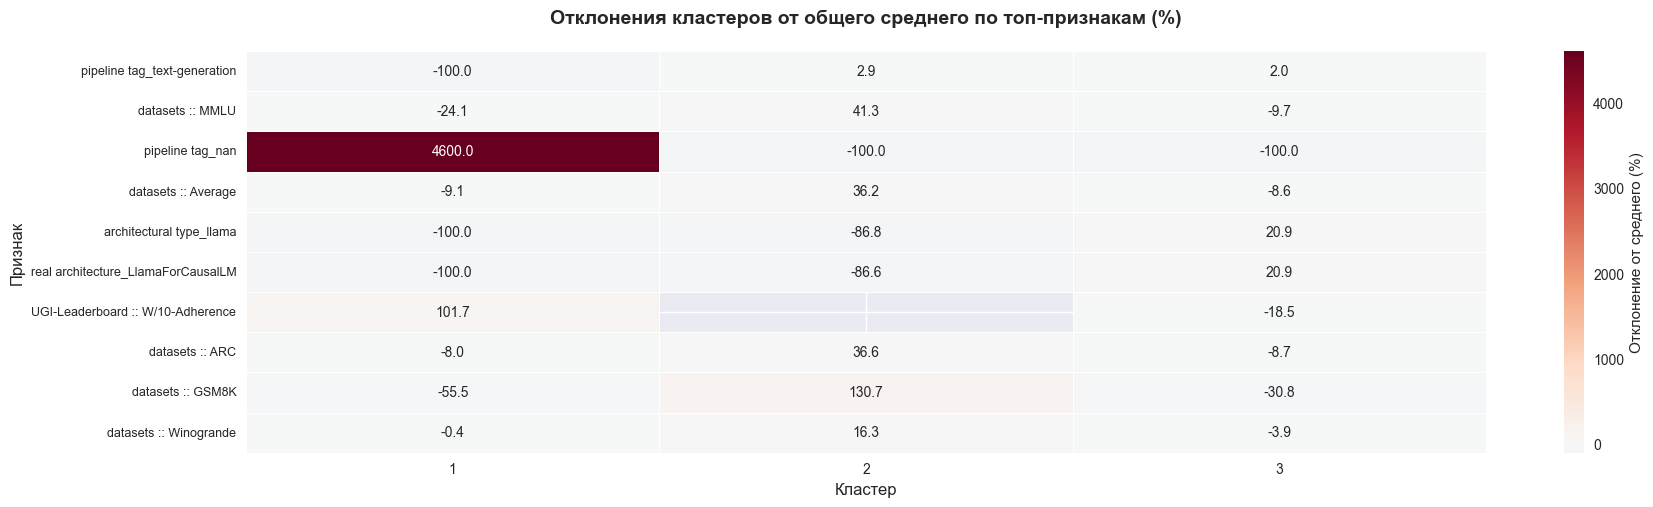

✓ Радарные диаграммы сохранены в 'cluster_radar_charts.png'


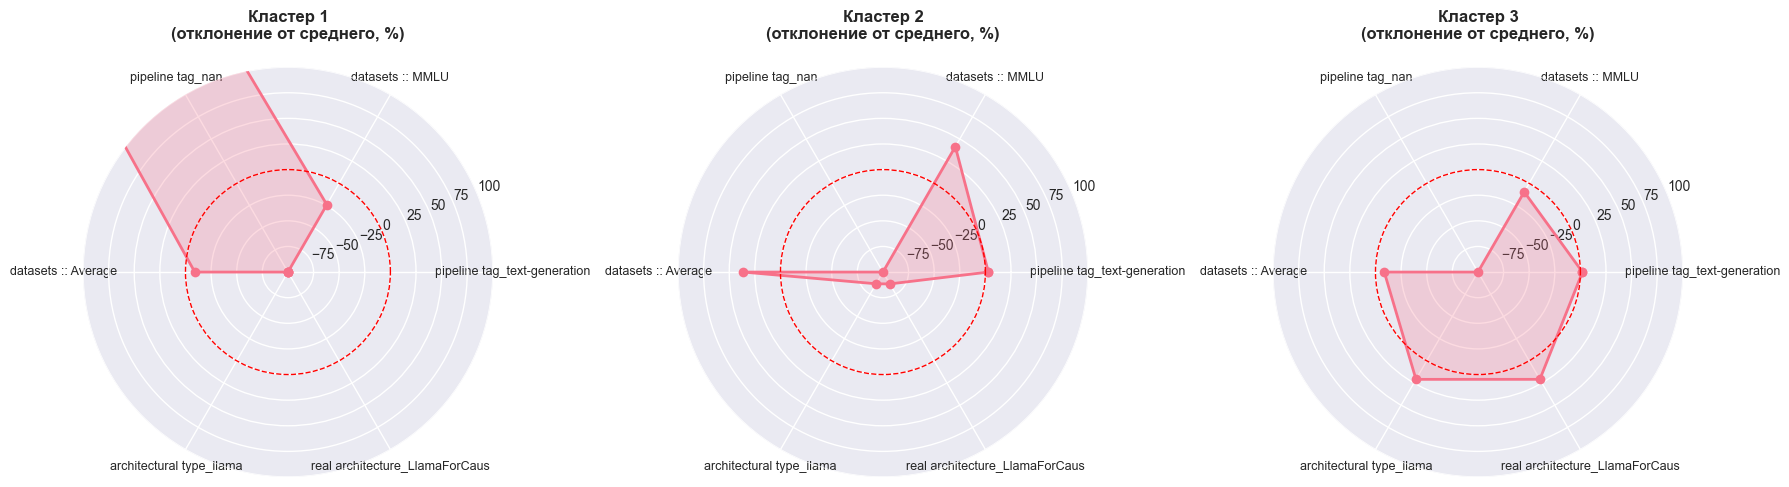

In [545]:
# Визуализация различий между кластерами
if data_for_clusters is not None and 'consensus_cluster' in data_for_clusters.columns and feature_importance is not None:
    print("\n" + "=" * 80)
    print("ВИЗУАЛИЗАЦИЯ РАЗЛИЧИЙ МЕЖДУ КЛАСТЕРАМИ")
    print("=" * 80)
    
    top_features = feature_importance.head(10)['feature'].tolist()
    cluster_means = data_for_clusters.groupby('consensus_cluster')[top_features].mean()
    overall_means = data_for_clusters[top_features].mean()
    
    # Создаем визуализацию
    n_clusters = len(cluster_means)
    n_features = len(top_features)
    
    fig = plt.figure(figsize=(20, 6 * ((n_clusters + 1) // 2)))
    gs = fig.add_gridspec((n_clusters + 1) // 2, 2, hspace=0.3, wspace=0.3)
    
    # График 1: Heatmap отклонений от общего среднего
    ax1 = fig.add_subplot(gs[0, :])
    deviations = cluster_means.subtract(overall_means, axis=1)
    # Нормализуем отклонения для лучшей визуализации
    deviations_normalized = deviations.div(overall_means.abs() + 1e-10, axis=1) * 100
    
    sns.heatmap(deviations_normalized.T, annot=True, fmt='.1f', cmap='RdBu_r', center=0,
                cbar_kws={'label': 'Отклонение от среднего (%)'}, ax=ax1, linewidths=0.5)
    ax1.set_title('Отклонения кластеров от общего среднего по топ-признакам (%)', 
                  fontsize=14, fontweight='bold', pad=20)
    ax1.set_xlabel('Кластер', fontsize=12)
    ax1.set_ylabel('Признак', fontsize=12)
    ax1.set_yticklabels([feat[:50] + '...' if len(feat) > 50 else feat for feat in top_features], 
                        rotation=0, fontsize=9)
    
    # График 2: Box plots для топ-5 признаков
    if n_clusters <= 4:  # Показываем box plots только если кластеров немного
        for idx, feature in enumerate(top_features[:5]):
            row = (idx // 2) + ((n_clusters + 1) // 2)
            col = idx % 2
            if row < (n_clusters + 1) // 2:
                ax = fig.add_subplot(gs[row, col])
                
                # Подготовка данных для box plot
                plot_data = []
                plot_labels = []
                for cluster_id in sorted(cluster_means.index):
                    cluster_data = data_for_clusters[data_for_clusters['consensus_cluster'] == cluster_id][feature].dropna()
                    if len(cluster_data) > 0:
                        plot_data.append(cluster_data.values)
                        plot_labels.append(f'Кластер {cluster_id}')
                
                if plot_data:
                    bp = ax.boxplot(plot_data, labels=plot_labels, patch_artist=True)
                    for patch in bp['boxes']:
                        patch.set_facecolor('lightblue')
                        patch.set_alpha(0.7)
                    
                    ax.axhline(y=overall_means[feature], color='r', linestyle='--', 
                             label=f'Общее среднее: {overall_means[feature]:.2f}')
                    ax.set_title(f'{feature[:60]}', fontsize=11, fontweight='bold')
                    ax.set_ylabel('Значение', fontsize=10)
                    ax.grid(alpha=0.3)
                    ax.legend(fontsize=8)
    
    plt.savefig('cluster_characteristics_visualization.png', dpi=300, bbox_inches='tight')
    print("✓ Визуализация сохранена в 'cluster_characteristics_visualization.png'")
    plt.show()
    
    # График 3: Радарная диаграмма для каждого кластера (топ-6 признаков)
    if n_clusters <= 6 and len(top_features) >= 6:
        from math import pi
        
        top_6_features = top_features[:6]
        n_features_radar = len(top_6_features)
        angles = [n / float(n_features_radar) * 2 * pi for n in range(n_features_radar)]
        angles += angles[:1]  # Замыкаем круг
        
        fig, axes = plt.subplots(1, min(n_clusters, 3), figsize=(18, 6), 
                                subplot_kw=dict(projection='polar'))
        if n_clusters == 1:
            axes = [axes]
        
        for idx, cluster_id in enumerate(sorted(cluster_means.index)[:3]):  # Показываем максимум 3 кластера
            ax = axes[idx] if n_clusters > 1 else axes[0]
            
            # Значения для кластера (нормализованные)
            values = []
            for feature in top_6_features:
                cluster_val = cluster_means.loc[cluster_id, feature]
                overall_val = overall_means[feature]
                # Нормализуем: 0 = общее среднее, положительные = выше среднего
                normalized = ((cluster_val - overall_val) / (abs(overall_val) + 1e-10)) * 100
                values.append(normalized)
            values += values[:1]  # Замыкаем круг
            
            # Рисуем радарную диаграмму
            ax.plot(angles, values, 'o-', linewidth=2, label=f'Кластер {cluster_id}')
            ax.fill(angles, values, alpha=0.25)
            ax.set_xticks(angles[:-1])
            ax.set_xticklabels([feat[:30] for feat in top_6_features], fontsize=9)
            ax.set_ylim(-100, 100)
            ax.set_title(f'Кластер {cluster_id}\n(отклонение от среднего, %)', 
                        fontsize=12, fontweight='bold', pad=20)
            ax.grid(True)
            ax.axhline(y=0, color='r', linestyle='--', linewidth=1)
        
        plt.tight_layout()
        plt.savefig('cluster_radar_charts.png', dpi=300, bbox_inches='tight')
        print("✓ Радарные диаграммы сохранены в 'cluster_radar_charts.png'")
        plt.show()
    
else:
    print("\n⚠️ Недостаточно данных для визуализации")


In [547]:
# Интерпретация кластеров и численное обоснование
if data_for_clusters is not None and 'consensus_cluster' in data_for_clusters.columns and feature_importance is not None:
    print("\n" + "=" * 80)
    print("ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ И ЧИСЛЕННОЕ ОБОСНОВАНИЕ")
    print("=" * 80)
    
    top_features = feature_importance.head(10)['feature'].tolist()
    cluster_means = data_for_clusters.groupby('consensus_cluster')[top_features].mean()
    overall_means = data_for_clusters[top_features].mean()
    
    # Статистические тесты для проверки значимости различий
    from scipy import stats
    
    print("\nСТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ РАЗЛИЧИЙ МЕЖДУ КЛАСТЕРАМИ:")
    print("-" * 80)
    
    # Для каждого топ-признака проверяем, есть ли значимые различия между кластерами
    significant_features = []
    
    for feature in top_features[:10]:
        # Собираем данные по всем кластерам
        cluster_data = []
        cluster_ids = []
        for cluster_id in sorted(cluster_means.index):
            cluster_values = data_for_clusters[data_for_clusters['consensus_cluster'] == cluster_id][feature].dropna()
            if len(cluster_values) > 1:  # Нужно минимум 2 значения для теста
                cluster_data.append(cluster_values.values)
                cluster_ids.append(cluster_id)
        
        if len(cluster_data) >= 2:
            # Используем ANOVA для проверки различий между кластерами
            try:
                f_stat, p_value = stats.f_oneway(*cluster_data)
                
                if p_value < 0.05:  # Статистически значимое различие
                    significant_features.append({
                        'feature': feature,
                        'f_statistic': f_stat,
                        'p_value': p_value,
                        'significant': True
                    })
                else:
                    significant_features.append({
                        'feature': feature,
                        'f_statistic': f_stat,
                        'p_value': p_value,
                        'significant': False
                    })
            except:
                pass
    
    sig_df = None
    if significant_features:
        sig_df = pd.DataFrame(significant_features)
        print(f"\nПризнаки со статистически значимыми различиями (p < 0.05):")
        print(sig_df[sig_df['significant'] == True][['feature', 'f_statistic', 'p_value']].to_string(index=False))
        print(f"\nВсего значимых признаков: {sig_df['significant'].sum()}/{len(sig_df)}")
    else:
        print("\n⚠️ Не удалось выполнить статистические тесты (недостаточно данных)")
    
    # Создаем интерпретацию для каждого кластера
    print("\n" + "=" * 80)
    print("ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ:")
    print("=" * 80)
    
    cluster_interpretations = []
    
    for cluster_id in sorted(cluster_means.index):
        cluster_size = (data_for_clusters['consensus_cluster'] == cluster_id).sum()
        cluster_pct = cluster_size / len(data_for_clusters) * 100
        
        # Находим признаки, где кластер значительно отличается
        high_features = []  # Признаки, где кластер выше среднего
        low_features = []   # Признаки, где кластер ниже среднего
        
        for feature in top_features[:10]:
            cluster_mean = cluster_means.loc[cluster_id, feature]
            overall_mean = overall_means[feature]
            deviation_pct = ((cluster_mean - overall_mean) / (abs(overall_mean) + 1e-10)) * 100
            
            if abs(deviation_pct) > 10:  # Отклонение больше 10%
                if deviation_pct > 0:
                    high_features.append((feature, deviation_pct))
                else:
                    low_features.append((feature, abs(deviation_pct)))
        
        # Сортируем по величине отклонения
        high_features.sort(key=lambda x: x[1], reverse=True)
        low_features.sort(key=lambda x: x[1], reverse=True)
        
        interpretation = {
            'cluster_id': cluster_id,
            'size': cluster_size,
            'percentage': cluster_pct,
            'high_features': high_features[:5],  # Топ-5
            'low_features': low_features[:5]     # Топ-5
        }
        cluster_interpretations.append(interpretation)
        
        print(f"\n{'='*80}")
        print(f"КЛАСТЕР {cluster_id} ({cluster_size} образцов, {cluster_pct:.1f}% от общего числа)")
        print(f"{'='*80}")
        
        if high_features:
            print(f"\nПризнаки, где кластер ЗНАЧИТЕЛЬНО ВЫШЕ среднего (>10%):")
            for feat, dev in high_features[:5]:
                print(f"  • {feat[:70]}: +{dev:.1f}%")
        
        if low_features:
            print(f"\nПризнаки, где кластер ЗНАЧИТЕЛЬНО НИЖЕ среднего (>10%):")
            for feat, dev in low_features[:5]:
                print(f"  • {feat[:70]}: -{dev:.1f}%")
        
        if not high_features and not low_features:
            print("\nКластер близок к общему среднему по всем анализируемым признакам")
    
    # Сохраняем интерпретации
    interpretation_data = []
    for interp in cluster_interpretations:
        row = {
            'cluster_id': interp['cluster_id'],
            'size': interp['size'],
            'percentage': interp['percentage'],
            'top_high_features': '; '.join([f"{feat[:50]}: +{dev:.1f}%" for feat, dev in interp['high_features']]),
            'top_low_features': '; '.join([f"{feat[:50]}: -{dev:.1f}%" for feat, dev in interp['low_features']])
        }
        interpretation_data.append(row)
    
    interpretation_df = pd.DataFrame(interpretation_data)
    interpretation_df.to_csv('cluster_interpretations.csv', index=False, encoding='utf-8-sig')
    
    print(f"\n{'='*80}")
    print("РЕЗУЛЬТАТЫ АНАЛИЗА")
    print(f"{'='*80}")
    print(f"✓ Статистический анализ завершен")
    print(f"✓ Интерпретации сохранены в 'cluster_interpretations.csv'")
    print(f"\nЧисленное обоснование:")
    print(f"  - Проанализировано признаков: {len(top_features)}")
    print(f"  - Статистически значимых различий: {sig_df['significant'].sum() if significant_features else 0}")
    print(f"  - Кластеров проанализировано: {len(cluster_interpretations)}")
    
else:
    print("\n⚠️ Недостаточно данных для интерпретации")



ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ И ЧИСЛЕННОЕ ОБОСНОВАНИЕ

СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ РАЗЛИЧИЙ МЕЖДУ КЛАСТЕРАМИ:
--------------------------------------------------------------------------------

Признаки со статистически значимыми различиями (p < 0.05):
                           feature  f_statistic      p_value
      pipeline tag_text-generation   201.543400 1.138251e-41
                  datasets :: MMLU    79.990255 4.973037e-15
                  pipeline tag_nan   135.063830 3.211670e-33
               datasets :: Average   114.271832 3.175149e-19
          architectural type_llama    31.931712 4.005716e-12
real architecture_LlamaForCausalLM    30.423638 1.131883e-11
 UGI-Leaderboard :: W/10-Adherence     5.786761 3.488704e-02
                   datasets :: ARC    84.451142 1.291661e-15
                 datasets :: GSM8K   113.359137 4.028747e-19
            datasets :: Winogrande    65.921107 4.310486e-13

Всего значимых признаков: 10/10

ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ:

КЛАСТЕР 1 (3 образцов, 2.

## Резюме анализа кластеров

**Численное обоснование различий между кластерами:**

1. **F-ratio (отношение межкластерной к внутрикластерной вариации):**
   - Показывает, насколько сильно кластеры различаются по каждому признаку
   - Высокий F-ratio означает, что признак хорошо различает кластеры

2. **ANOVA тесты:**
   - Проверяют статистическую значимость различий между кластерами
   - p-value < 0.05 означает значимые различия

3. **Отклонения от общего среднего:**
   - Показывают, на сколько процентов каждый кластер отличается от среднего по датасету
   - Позволяют выявить уникальные характеристики каждого кластера

**Результаты сохранены в файлах:**
- `cluster_statistics_by_features.csv` - детальная статистика по признакам
- `cluster_feature_importance.csv` - важность признаков для различения кластеров
- `cluster_detailed_characteristics.csv` - полные характеристики каждого кластера
- `cluster_summary_characteristics.csv` - краткая сводка
- `cluster_interpretations.csv` - интерпретации кластеров
- `cluster_characteristics_visualization.png` - визуализация различий
- `cluster_radar_charts.png` - радарные диаграммы кластеров


## Интерпретация результатов ансамбля методов

**Ансамбль методов** объединяет результаты различных методов анализа для получения более надежных и консенсусных результатов.

### Ансамбль отбора признаков (Boruta + PFI)
- **Консенсусные признаки** (пересечение): признаки, отобранные обоими методами — наиболее надежные
- **Объединение**: все признаки, отобранные хотя бы одним методом — более полный набор
- **Только Boruta / только PFI**: признаки, специфичные для каждого метода

### Ансамбль кластеризации (SOM + Spectral Clustering)
- **Консенсусная кластеризация**: majority voting между методами
- **Метрики согласованности**: ARI и NMI показывают, насколько согласованы результаты методов
- **Более устойчивая кластеризация**: консенсусные метки более устойчивы к шуму

### Ансамбль обнаружения аномалий (Isolation Forest + LOF)
- **Консенсус (AND)**: аномалии, обнаруженные обоими методами — высоконадежные аномалии
- **Консенсус (OR)**: аномалии, обнаруженные хотя бы одним методом — более полный набор
- **Согласованность**: процент образцов, для которых методы согласны

**Преимущества ансамбля:**
- Повышенная надежность результатов
- Устойчивость к ошибкам отдельных методов
- Более полное покрытие данных
- Возможность выявления консенсусных паттернов


In [535]:
# Ансамбль кластеризации: SOM + Spectral Clustering
print("=" * 80)
print("АНСАМБЛЬ КЛАСТЕРИЗАЦИИ")
print("=" * 80)

# Проверяем наличие результатов кластеризации
som_labels = None
spectral_labels = None

# Проверяем результаты SOM
som_labels = None
if 'som_cluster_labels' in globals() and globals()['som_cluster_labels'] is not None:
    som_labels = globals()['som_cluster_labels'].copy()
    print(f"✓ Найдены результаты SOM: {len(np.unique(som_labels))} кластеров")
elif 'som_results' in globals() and 'cluster' in globals()['som_results'].columns:
    som_labels = globals()['som_results']['cluster'].values
    print(f"✓ Найдены результаты SOM из DataFrame: {len(np.unique(som_labels))} кластеров")
else:
    print("⚠️ Результаты SOM не найдены")
    print("  Проверяемые переменные: som_cluster_labels, som_results")

# Проверяем результаты Spectral Clustering
spectral_labels = None
if 'spectral_labels' in globals() and globals()['spectral_labels'] is not None:
    spectral_labels = globals()['spectral_labels'].copy()
    print(f"✓ Найдены результаты Spectral Clustering: {len(np.unique(spectral_labels))} кластеров")
elif 'spectral_clustering_results' in globals() and 'cluster' in globals()['spectral_clustering_results'].columns:
    spectral_labels = globals()['spectral_clustering_results']['cluster'].values
    print(f"✓ Найдены результаты Spectral Clustering из DataFrame: {len(np.unique(spectral_labels))} кластеров")
elif 'sc_results' in globals() and 'cluster' in globals()['sc_results'].columns:
    spectral_labels = globals()['sc_results']['cluster'].values
    print(f"✓ Найдены результаты Spectral Clustering из sc_results: {len(np.unique(spectral_labels))} кластеров")
elif 'sc_labels' in globals() and globals()['sc_labels'] is not None:
    spectral_labels = globals()['sc_labels'].copy()
    print(f"✓ Найдены результаты Spectral Clustering из sc_labels: {len(np.unique(spectral_labels))} кластеров")
else:
    print("⚠️ Результаты Spectral Clustering не найдены")
    print("  Проверяемые переменные: spectral_labels, spectral_clustering_results, sc_results, sc_labels")

# Создаем консенсусную кластеризацию
if som_labels is not None and spectral_labels is not None:
    # Проверяем совпадение размеров
    if len(som_labels) == len(spectral_labels):
        # Вычисляем метрики согласованности
        ari = adjusted_rand_score(som_labels, spectral_labels)
        nmi = normalized_mutual_info_score(som_labels, spectral_labels)
        
        print(f"\n" + "=" * 80)
        print("РЕЗУЛЬТАТЫ АНСАМБЛЯ КЛАСТЕРИЗАЦИИ")
        print("=" * 80)
        print(f"Кластеров в SOM: {len(np.unique(som_labels))}")
        print(f"Кластеров в Spectral Clustering: {len(np.unique(spectral_labels))}")
        print(f"\nМетрики согласованности:")
        print(f"  Adjusted Rand Index (ARI): {ari:.4f}")
        print(f"  Normalized Mutual Information (NMI): {nmi:.4f}")
        
        # Создаем консенсусные метки (majority voting)
        # Для каждого образца выбираем наиболее частый кластер из двух методов
        consensus_labels = []
        for i in range(len(som_labels)):
            votes = [som_labels[i], spectral_labels[i]]
            consensus_labels.append(Counter(votes).most_common(1)[0][0])
        
        consensus_labels = np.array(consensus_labels)
        n_consensus_clusters = len(np.unique(consensus_labels))
        
        print(f"\nКонсенсусная кластеризация:")
        print(f"  Количество кластеров: {n_consensus_clusters}")
        print(f"  Распределение по кластерам:")
        consensus_counts = Counter(consensus_labels)
        for cluster_id, count in sorted(consensus_counts.items()):
            print(f"    Кластер {cluster_id}: {count} образцов ({count/len(consensus_labels)*100:.1f}%)")
        
        # Сохраняем результаты
        ensemble_clustering = pd.DataFrame({
            'index': df_deduplicated.index if 'df_deduplicated' in globals() else df.index[:len(consensus_labels)],
            'som_cluster': som_labels,
            'spectral_cluster': spectral_labels,
            'consensus_cluster': consensus_labels
        })
        ensemble_clustering.to_csv('ensemble_clustering.csv', index=False, encoding='utf-8-sig')
        print(f"\n✓ Результаты ансамбля кластеризации сохранены в 'ensemble_clustering.csv'")
        
    else:
        print(f"\n⚠️ Размеры меток не совпадают: SOM={len(som_labels)}, Spectral={len(spectral_labels)}")
        ensemble_clustering = None
else:
    print("\n⚠️ Недостаточно данных для создания ансамбля кластеризации")
    ensemble_clustering = None


АНСАМБЛЬ КЛАСТЕРИЗАЦИИ
✓ Найдены результаты SOM из DataFrame: 3 кластеров
✓ Найдены результаты Spectral Clustering из sc_results: 2 кластеров

РЕЗУЛЬТАТЫ АНСАМБЛЯ КЛАСТЕРИЗАЦИИ
Кластеров в SOM: 3
Кластеров в Spectral Clustering: 2

Метрики согласованности:
  Adjusted Rand Index (ARI): 0.0583
  Normalized Mutual Information (NMI): 0.0958

Консенсусная кластеризация:
  Количество кластеров: 3
  Распределение по кластерам:
    Кластер 1: 3 образцов (2.1%)
    Кластер 2: 24 образцов (17.0%)
    Кластер 3: 114 образцов (80.9%)

✓ Результаты ансамбля кластеризации сохранены в 'ensemble_clustering.csv'
